In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

import os
import csv
import json
import glob
import seaborn as sns

In [ ]:
# Rutas
csv_loss_Stylegan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/losses_all_runs.csv"
csv_metricas_Stylegan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_stylegan.csv"
csv_metricas_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_medgan.csv"
csv_metricas_vqgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_vqgan.csv"
csv_metricas_pix2pix = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_pix2pix.csv"
csv_metricasSP_pix2pix = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metricas_pix2pix.csv"
output_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados"
output_loss_styleganpng = os.path.join(output_dir, "losses_stylegan2ada.png")

# Ruta del CSV modificado
output_csv_loss_stylegan_epoch = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/losses_all_rund_with_epochs.csv"
output_csv_metrics_stylegan_epoch = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_stylegan_epochs.csv"
otuput_csv_metricas_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/metrics_medgan_reordenado.csv"

# Rutas de salida para las gráficas
gr_vqganLoss = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_vqgan.png"
gr_medganLoss = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_medgan.png"
gr_styleganLoss = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_stylegan.png"
gr_pix2pixLoss = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_pix2pix.png"

gr_ssim = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/ssim.png"
gr_psnr = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/psnr.png"
ssim_style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/ssim_style.png"
psnr_style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/psnr_style.png"

output_path_gen = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_generator_stylegan2ada.png"
output_path_disc = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_discriminator_stylegan2ada.png"
output_path_gen_vq = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_generator_vqgan.png"
output_path_disc_vq = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_discriminator_vqgan.png"
output_path_gen_pix = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_generator_pixgan.png"
output_path_disc_pix = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/losses_discriminator_pixgan.png"

# Rutaws solo MEDGAN
loss_ae_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_ae_medgan.png"
loss_G_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_G_medgan.png"
loss_D_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/loss_D_medgan.png"
SSIM_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/SSIM_medgan.png"
PSNR_medgan = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/PSNR_medgan.png"


os.makedirs(output_dir, exist_ok=True)

# STYLEGAN

In [ ]:
# === Rutas de entrada ===
csv_loss_files = {
    "StyleE1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE1.csv",
    "StyleE2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE2.csv",
    "StyleE3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE3.csv",
    "StyleE4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE4.csv",
    "StyleE6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE6.csv",
    "StyleE7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE7.csv",
    "StyleE8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE8.csv",
    "StyleE9": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/Metrics_StyleE9.csv",
}
fid_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/FID_Style.png"
kid_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/KID_Style.png"
jsd_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/JSD_Style.png"
ssim_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/SSIM_Style.png"
psnr_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/PSNR_Style.png"
lpips_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/LPIPS_Style.png"

csv_loss_StyleE1 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE1.csv"
csv_loss_StyleE2 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE2.csv"
csv_loss_StyleE3 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE3.csv"
csv_loss_StyleE4 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE4.csv"
csv_loss_StyleE6 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE6.csv"
csv_loss_StyleE7 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE7.csv"
csv_loss_StyleE8 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE8.csv"
csv_loss_StyleE9 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/losses_StyleE9.csv"

csv_imgloss_StyleE1 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE1.png"
csv_imgloss_StyleE2 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE2.png"
csv_imgloss_StyleE3 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE3.png"
csv_imgloss_StyleE4 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE4.png"
csv_imgloss_StyleE6 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE6.png"
csv_imgloss_StyleE7 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE7.png"
csv_imgloss_StyleE8 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE8.png"
csv_imgloss_StyleE9 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleE9.png"
csv_imgloss_StyleGENERADOR = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleGENERADOR.png"
csv_imgloss_StyleDISCRIMINADOR = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/losses_StyleDISCRIMINADOR.png"

# CSV Metrics StyleGAN
csv_metric_StyleE1 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE1.csv"
csv_metric_StyleE2 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE2.csv"
csv_metric_StyleE3 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE3.csv"
csv_metric_StyleE4 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE4.csv"
csv_metric_StyleE6 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE6.csv"
csv_metric_StyleE7 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE7.csv"
csv_metric_StyleE8 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE8.csv"
csv_metric_StyleE9 = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/stylegan/metrics_StyleE9.csv"
fid_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/FID_Style.png"
kid_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/KID_Style.png"
jsd_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/JSD_Style.png"
ssim_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/SSIM_Style.png"
psnr_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/PSNR_Style.png"
lpips_Style = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/LPIPS_Style.png"

## Losses

### Losses individual Stylegan


No se detectaron colapsos.
No se detectaron sobreajustes.


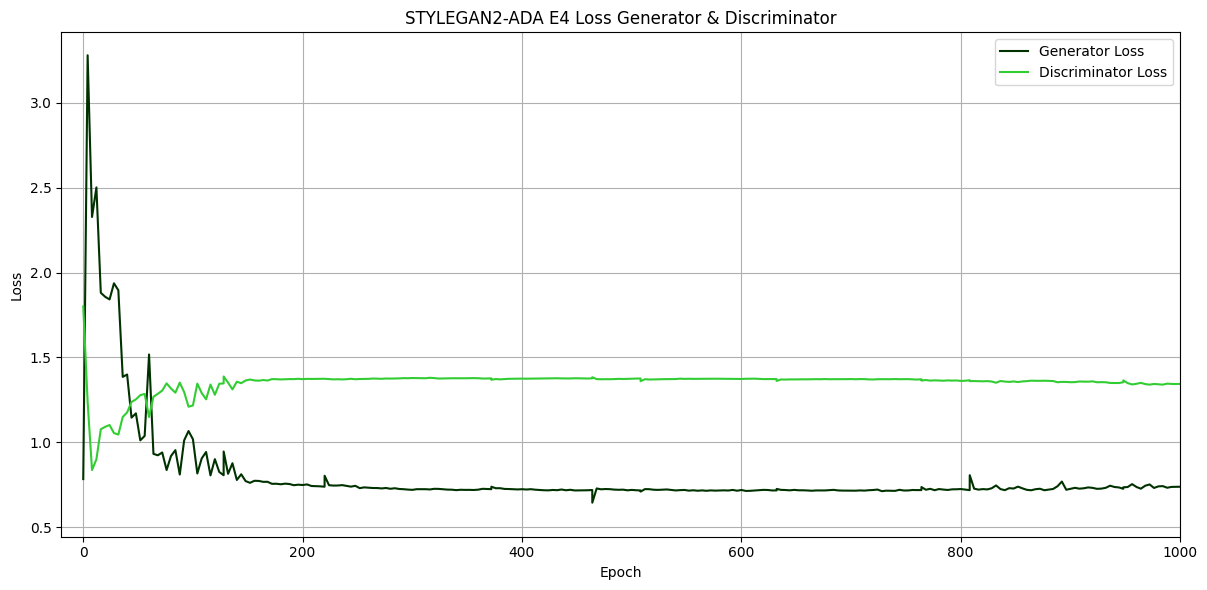

In [ ]:
df = pd.read_csv(csv_loss_StyleE4)

# === Heurísticas de colapso y sobreajuste ===
collapse_indices = []
overfit_indices = []

# Parámetros ajustables
G_LOW = 0.25       # G_loss bajo persistente
D_HIGH = 3.5       # D_loss alto persistente
WINDOW = 3         # número de pasos consecutivos para confirmar

for i in range(len(df) - WINDOW):
    g_window = df.loc[i:i+WINDOW, 'G_loss'].values
    d_window = df.loc[i:i+WINDOW, 'D_loss'].values

    # --- Posible colapso ---
    if np.all(g_window < G_LOW) and np.all(d_window > D_HIGH):
        collapse_indices.append(i)

    # --- Posible sobreajuste ---
    if df.loc[i, 'D_loss'] < 0.3 and df.loc[i+1, 'G_loss'] > df.loc[i, 'G_loss']:
        overfit_indices.append(i)

# === Agrupar índices consecutivos ===
def agrupar_rangos(indices):
    if not indices:
        return []
    rangos = []
    inicio = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            rangos.append((inicio, indices[i - 1]))
            inicio = indices[i]
    rangos.append((inicio, indices[-1]))
    return rangos

collapse_ranges = agrupar_rangos(collapse_indices)
overfit_ranges = agrupar_rangos(overfit_indices)

# === Imprimir los rangos detectados en consola ===
if collapse_ranges:
    print("Posibles colapsos detectados en los siguientes rangos de epochs:")
    for start, end in collapse_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']:.2f} a {df.loc[end, 'epoch']:.2f}")
else:
    print("No se detectaron colapsos.")

if overfit_ranges:
    print("Posibles sobreajustes detectados en los siguientes rangos de epochs:")
    for start, end in overfit_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']:.2f} a {df.loc[end, 'epoch']:.2f}")
else:
    print("No se detectaron sobreajustes.")

# === GRAFICA FINAL ===
plt.figure(figsize=(12, 6))
plt.plot(df['kimg_acu'], df['G_loss'], label='Generator Loss', color='#003200')
plt.plot(df['kimg_acu'], df['D_loss'], label='Discriminator Loss', color='limegreen')

# Resaltar colapso en rojo
for idx, (start, end) in enumerate(collapse_ranges):
    plt.axvspan(df.loc[start, 'kimg_acu'], df.loc[end, 'kimg_acu'], color='red', alpha=0.2,
                label='Collapse Region' if idx == 0 else "")

# Resaltar sobreajuste en naranja
for idx, (start, end) in enumerate(overfit_ranges):
    plt.axvspan(df.loc[start, 'kimg_acu'], df.loc[end, 'kimg_acu'], color='orange', alpha=0.2,
                label='Overfitting Region' if idx == 0 else "")

plt.title('STYLEGAN2-ADA E4 Loss Generator & Discriminator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(-20, 1000)
plt.savefig(csv_imgloss_StyleE4, dpi=300, bbox_inches='tight')

plt.show()

### Loss Generator

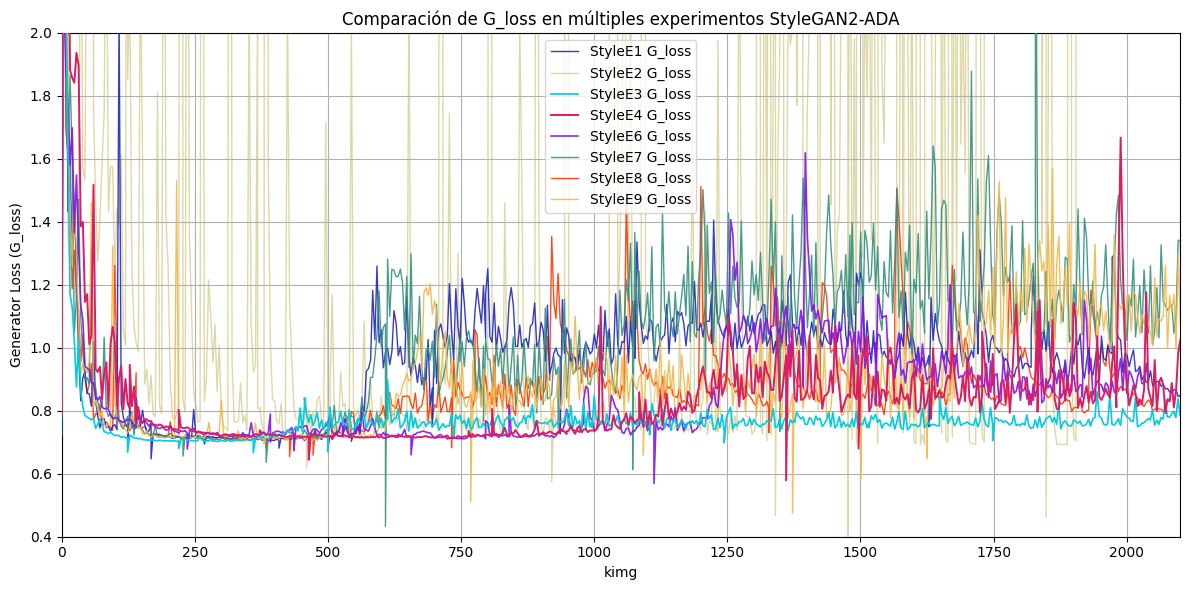

In [ ]:
# === GRAFICA DE TODAS LAS G_loss ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    kimgs = df["kimg_acu"] if "kimg_acu" in df.columns else df.index
    if "G_loss" not in df.columns:
        continue

    # Estilos personalizados
    if label == "StyleE1":  # más claro/transparente
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.0, alpha=0.9, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.0, alpha=1.0, zorder=1, color="#DED8A8")   #8
    elif label == "StyleE3":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.2, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.2, alpha=0.9, zorder=8, color="#8211EB")  #3
    elif label == "StyleE7":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.0, alpha=0.9, zorder=4, color="#34917F")  #5
    elif label == "StyleE8":  # más grueso y encima de todos
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.0, alpha=0.9, zorder=2, color="#FF3800")  #7
    else:  # estilo normal para el resto
        plt.plot(kimgs, df["G_loss"], label=f"{label} G_loss", linewidth=1.0, alpha=0.9, zorder=7, color="#F2B749")   #4

plt.title("Comparación de G_loss en múltiples experimentos StyleGAN2-ADA")
plt.xlabel("kimg")
plt.ylabel("Generator Loss (G_loss)")
plt.legend()
plt.grid(True)
plt.xlim(0, 2100)
plt.ylim(0.4, 2)
plt.savefig(csv_imgloss_StyleGENERADOR, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

### Loss Discriminador

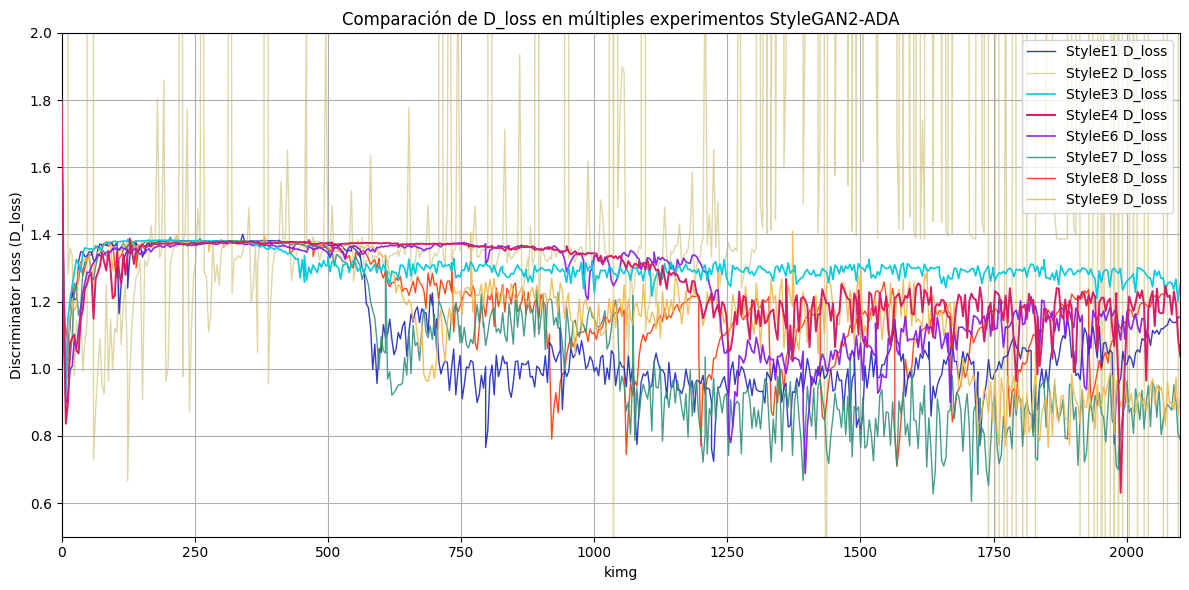

In [ ]:
# === GRAFICA DE TODAS LAS D_loss ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    # Verificamos columnas disponibles
    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "D_loss" not in df.columns:
        print(f"El archivo {label} no tiene columna 'D_loss'.")
        continue

    # Estilos personalizados (mismos colores que en G_loss)
    if label == "StyleE1":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.0, alpha=0.9, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.0, alpha=1.0, zorder=1, color="#DED8A8")   #8
    elif label == "StyleE3":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.2, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.2, alpha=0.9, zorder=8, color="#8211EB")  #3
    elif label == "StyleE7":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.0, alpha=0.9, zorder=4, color="#34917F")  #5
    elif label == "StyleE8":
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.0, alpha=0.9, zorder=2, color="#FF3800")  #7
    else:
        plt.plot(kimgs, df["D_loss"], label=f"{label} D_loss", linewidth=1.0, alpha=0.9, zorder=7, color="#F2B749")   #4

# === Configuración de la gráfica ===
plt.title("Comparación de D_loss en múltiples experimentos StyleGAN2-ADA")
plt.xlabel("kimg")
plt.ylabel("Discriminator Loss (D_loss)")
plt.legend()
plt.grid(True)
plt.xlim(0, 2100)
plt.ylim(0.5, 2)
plt.savefig(csv_imgloss_StyleDISCRIMINADOR, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Metricas


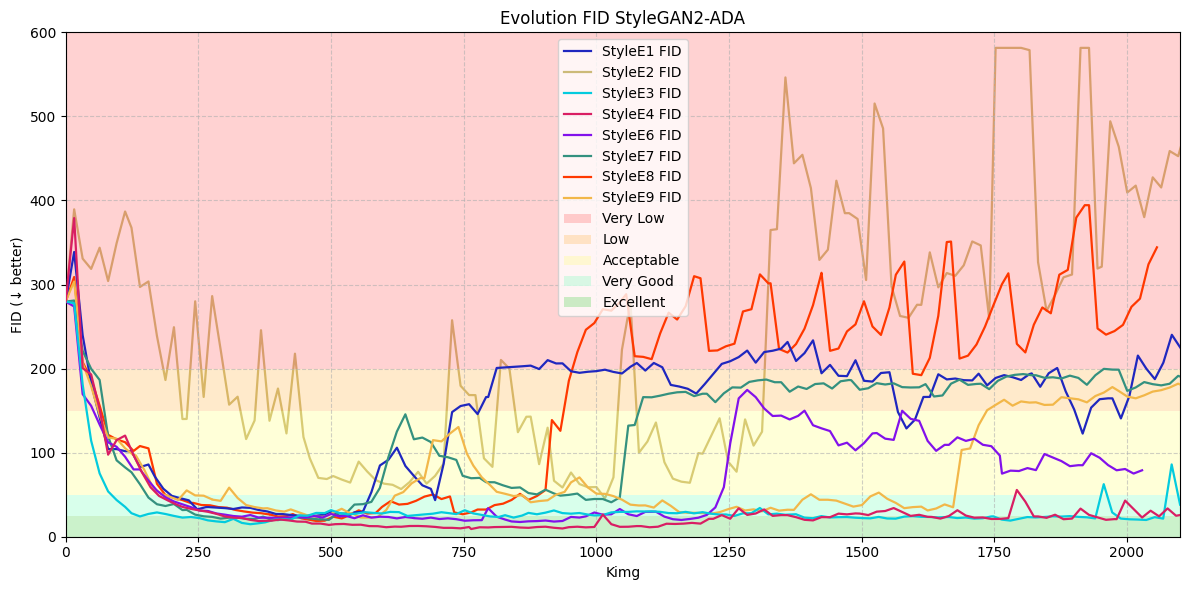

In [ ]:
# === Grafica de FID para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "FID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'FID'.")
        continue

    # Filtrar filas válidas
    mask = ~df["FID"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD FID (contornos visuales) ===
plt.axhspan(600, 200, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(200, 150, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(150, 50,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(50, 25,   facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(25, 0,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution FID StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("FID (↓ better)")
plt.xlim(0, 2100)
plt.ylim(0, 600)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(fid_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

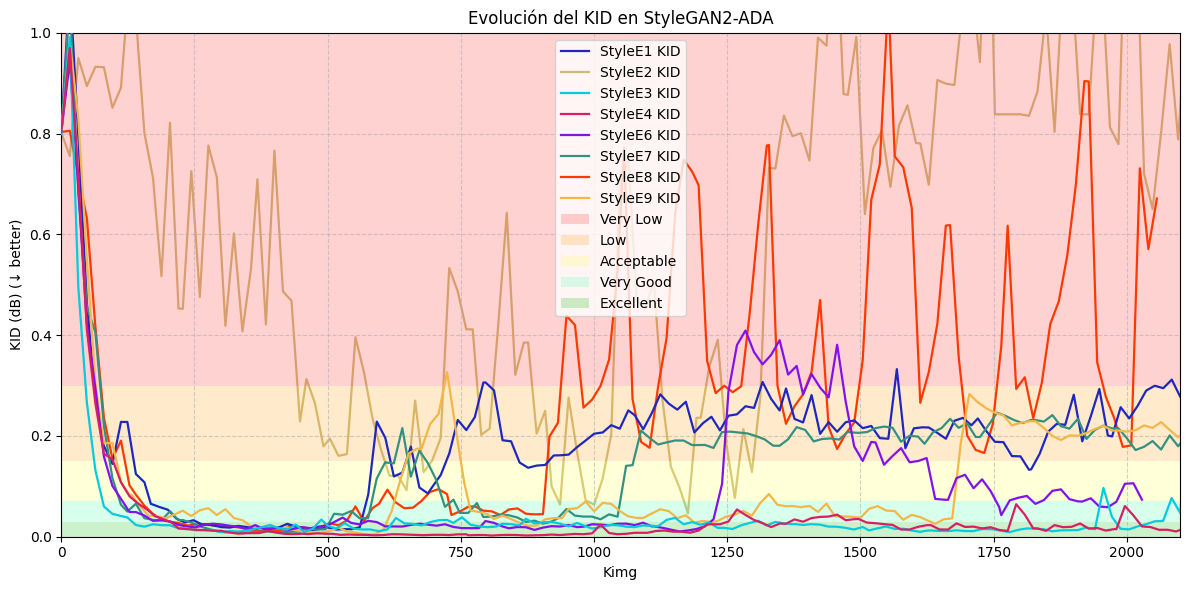

In [ ]:
# === Grafica de KID para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "KID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'KID'.")
        continue

    # Filtrar filas válidas
    mask = ~df["KID"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD KID (contornos visuales) ===
plt.axhspan(0.30, 1.00, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.15, 0.30, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.07, 0.15, facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.03, 0.07, facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.03,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del KID en StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("KID (dB) (↓ better)")
plt.xlim(0, 2100)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(kid_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

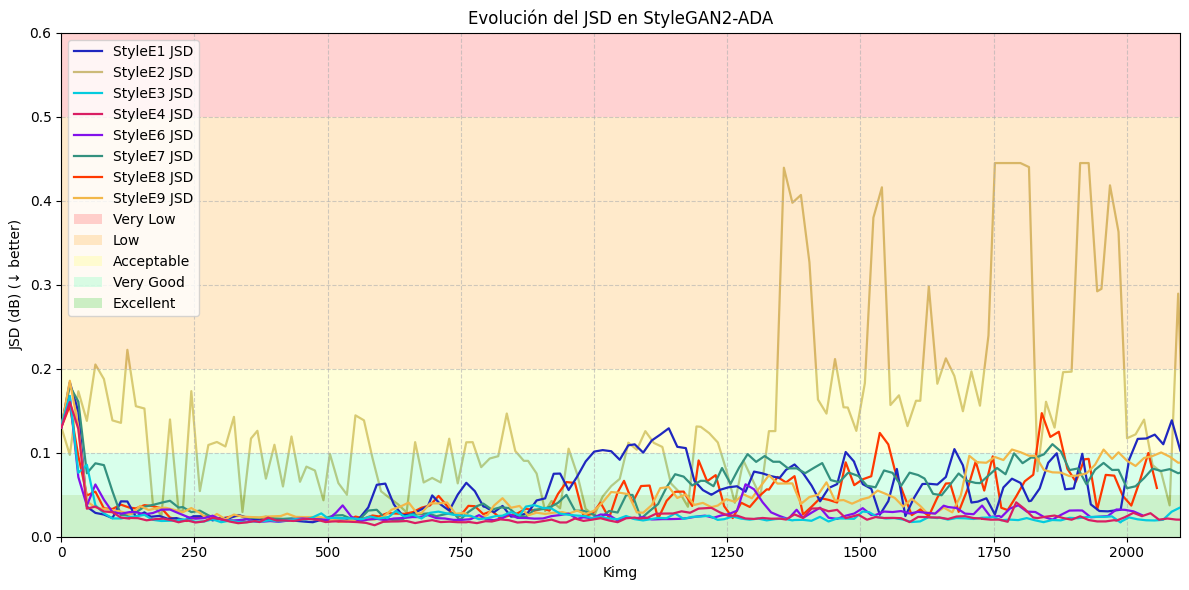

In [ ]:
# === Grafica de JSD para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "JSD" not in df.columns:
        print(f"El archivo {label} no tiene columna 'JSD'.")
        continue

    # Filtrar filas válidas
    mask = ~df["JSD"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD JSD (contornos visuales) ===
plt.axhspan(0.5, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.2, 0.5,   facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.1, 0.2,   facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.05, 0.1,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.05,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del JSD en StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("JSD (dB) (↓ better)")
plt.xlim(0, 2100)
plt.ylim(0, 0.6)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(jsd_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

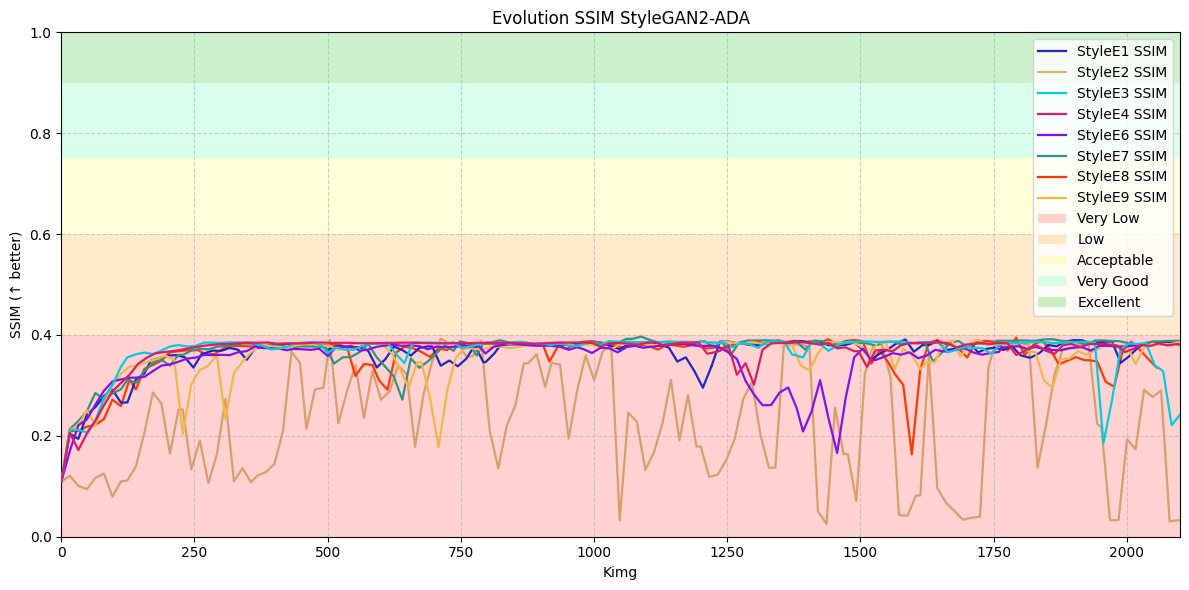

In [ ]:
# === Grafica de SSIM para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "SSIM" not in df.columns:
        print(f"El archivo {label} no tiene columna 'SSIM'.")
        continue

    # Filtrar filas válidas
    mask = ~df["SSIM"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD PSNR (contornos visuales) ===
plt.axhspan(0, 0.40,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.60, 0.75,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.75, 0.90,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.90, 1,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution SSIM StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("SSIM (↑ better)")
plt.xlim(0, 2100)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(ssim_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

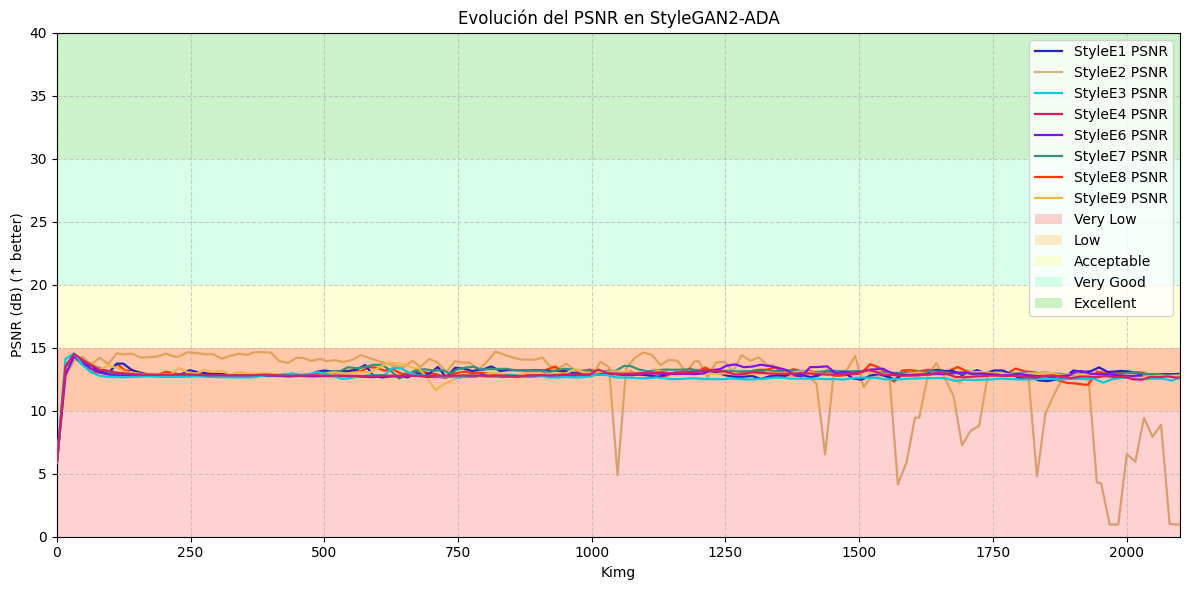

In [ ]:
# === Grafica de PSNR para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "PSNR" not in df.columns:
        print(f"El archivo {label} no tiene columna 'PSNR'.")
        continue

    # Filtrar filas válidas
    mask = ~df["PSNR"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD PSNR (contornos visuales) ===
plt.axhspan(0, 15,   facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(10, 15,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(15, 20,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(20, 30,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(30, 60,  facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del PSNR en StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("PSNR (dB) (↑ better)")
plt.xlim(0, 2100)
plt.ylim(0, 40)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(psnr_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

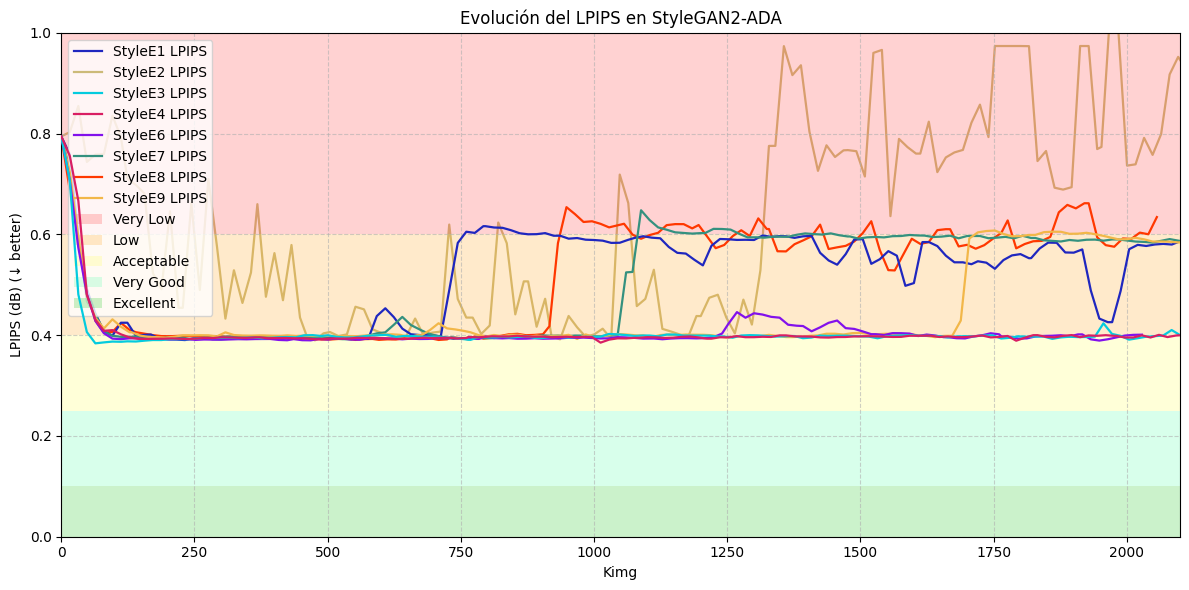

In [ ]:
# === Grafica de LPIPS para diferentes configuraciones StyleGAN2-ADA ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_loss_files.items():
    df = pd.read_csv(filepath)

    if "kimg_acu" not in df.columns:
        print(f"El archivo {label} no tiene columna 'kimg'. Se usará índice.")
        kimgs = df.index
    else:
        kimgs = df["kimg_acu"]

    if "LPIPS" not in df.columns:
        print(f"El archivo {label} no tiene columna 'LPIPS'.")
        continue

    # Filtrar filas válidas
    mask = ~df["LPIPS"].isna()

    # Estilos personalizados
    if label == "StyleE1":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "StyleE2":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "StyleE3":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "StyleE4":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "StyleE6":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "StyleE7":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "StyleE8":
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(kimgs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD LPIPS (contornos visuales) ===
plt.axhspan(0.60, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.25, 0.40,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.10, 0.25,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.10, 0,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del LPIPS en StyleGAN2-ADA")
plt.xlabel("Kimg")
plt.ylabel("LPIPS (dB) (↓ better)")
plt.xlim(0, 2100)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(lpips_Style, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Violin PLOT

/tmp/ipython-input-378372999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="FID", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-378372999.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


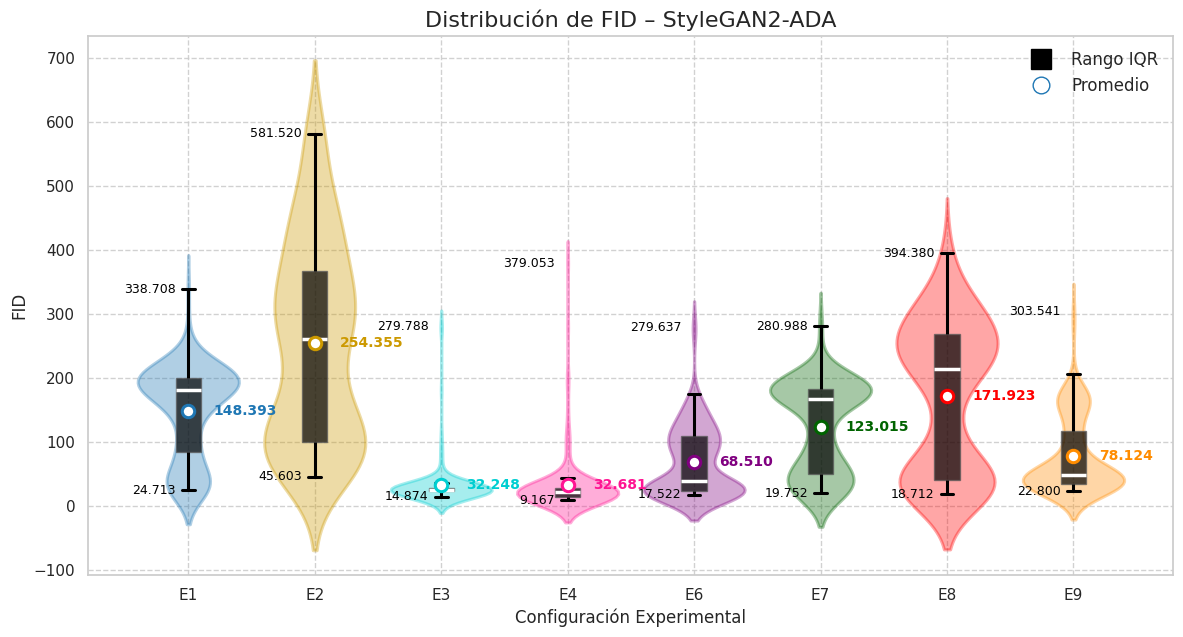

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Violin/FID_Violin.png


In [ ]:
# === COLORES ===
palette_colors = {"StyleE1": "#1f77b4", "StyleE2": "#CC9900", "StyleE3": "#00CED1", "StyleE4": "#FF1493", "StyleE6": "#800080", "StyleE7": "#006400", "StyleE8": "#FF0000", "StyleE9": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_loss_files.items():
    df_tmp = pd.read_csv(path)
    if "FID" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'FID'.")
    df_tmp = df_tmp[["FID"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="FID", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="FID",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["FID"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["FID"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de FID – StyleGAN2-ADA", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("FID")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["StyleE1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Violin/FID_Violin_Style.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

/tmp/ipython-input-4287273966.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="PSNR", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-4287273966.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


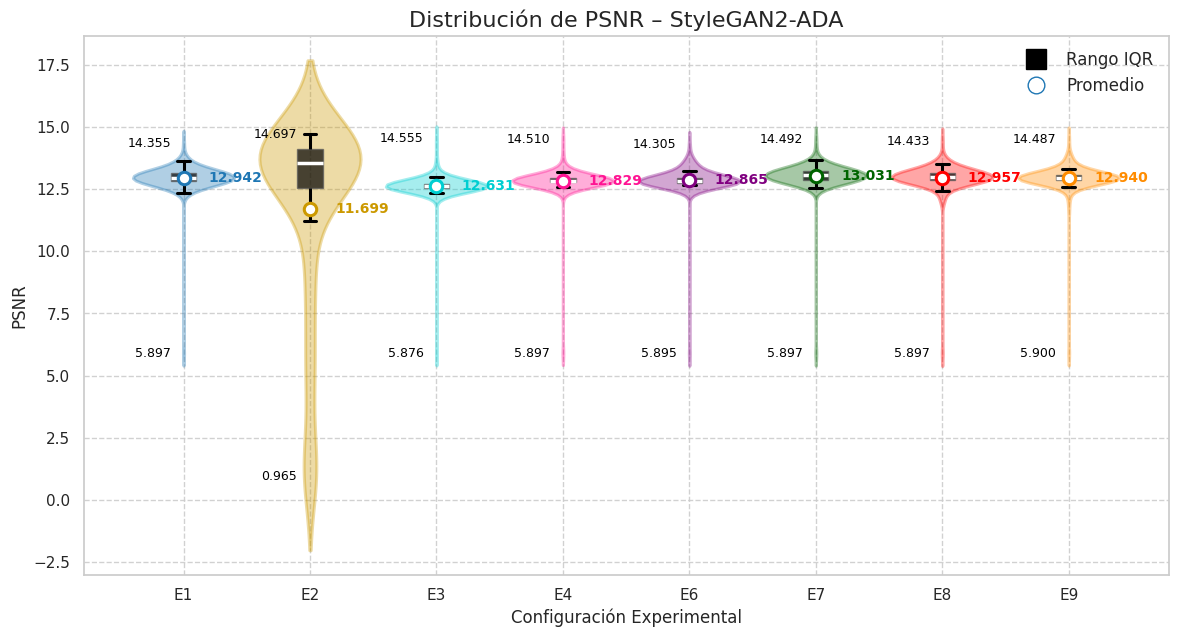

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Violin/PSNR_Violin.png


In [ ]:
# === COLORES ===
palette_colors = {"StyleE1": "#1f77b4", "StyleE2": "#CC9900", "StyleE3": "#00CED1", "StyleE4": "#FF1493", "StyleE6": "#800080", "StyleE7": "#006400", "StyleE8": "#FF0000", "StyleE9": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_loss_files.items():
    df_tmp = pd.read_csv(path)
    if "PSNR" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'PSNR'.")
    df_tmp = df_tmp[["PSNR"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="PSNR", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="PSNR",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["PSNR"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["PSNR"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de PSNR – StyleGAN2-ADA", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("PSNR")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["StyleE1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Violin/PSNR_Violin_Style.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

## Radar Chart

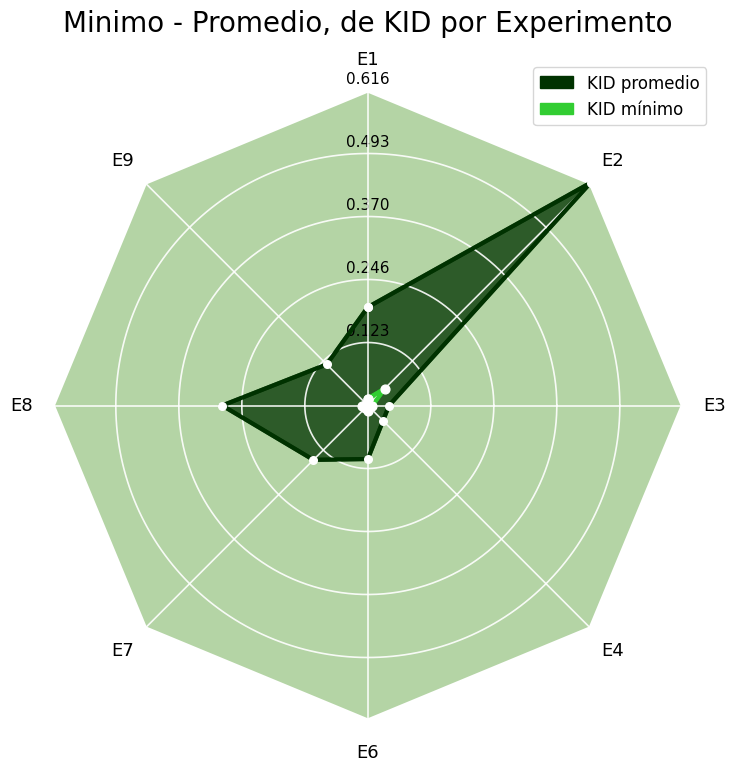

Radar guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Radar/LPIPS_Radar_Style.png


In [ ]:
# === CONFIGURACIÓN ===
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Radar/LPIPS_Radar_Style.png"

# === Obtener KID mínimo y promedio de cada CSV ===
labels = []
LPIPS_min = []
LPIPS_mean = []

for name, path in csv_loss_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("Style", ""))

    LPIPS_min.append(df["KID"].min())
    LPIPS_mean.append(df["KID"].mean())

LPIPS_min = np.array(LPIPS_min)
LPIPS_mean = np.array(LPIPS_mean)

# Número de variables (8)
N = len(labels)

# === Ángulos en sentido horario iniciando en la parte superior ===
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, N, endpoint=False)

# === Tipo de métrica a graficar: "KID", "KID" o "KID" ===
metric_type = "KID"   # <-- Cambia esto según la métrica que estés graficando
if metric_type.upper() == "SSIM":
    min_val, max_val = 0.0, 1.0
elif metric_type.upper() == "PSNR":
    min_val, max_val = 0.0, 40.0
elif metric_type.upper() == "LPIPS":
    min_val, max_val = 0.0, 1.0
else:
    # fallback en caso de métrica desconocida
    min_val = 0.0
    max_val = max(LPIPS_min.max(), LPIPS_mean.max())

# Normalizar radios
r_min = LPIPS_min / max_val
r_mean = LPIPS_mean / max_val

# Cerrar polígonos
r_min = np.append(r_min, r_min[0])
r_mean = np.append(r_mean, r_mean[0])
angles_closed = np.append(angles, angles[0])

# Conversión a XY
def to_xy(r):
    return np.column_stack([r * np.cos(angles_closed), r * np.sin(angles_closed)])

xy_min = to_xy(r_min)
xy_mean = to_xy(r_mean)

# === Crear figura ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect("equal")

# === Fondo verde recortado en el octágono ===
theta = angles
octagon = np.column_stack([np.cos(theta), np.sin(theta)])

bg_polygon = Polygon(octagon,closed=True,alpha=0.5, facecolor="#6bab4d",edgecolor="none",zorder=0,)
ax.add_patch(bg_polygon)
bg_polygon.set_clip_on(True)

ax.set_facecolor("none")

# === GRILLA INTERNA CIRCULAR ===
levels = 5
for k in range(1, levels+1):
    rr = k / levels
    theta_fine = np.linspace(0, 2*np.pi, 500)
    ax.plot(rr*np.cos(theta_fine),rr*np.sin(theta_fine),color="white",linewidth=1.2,alpha=0.9,zorder=3)

# === ETIQUETAS PARA CADA NIVEL EN LA DIRECCIÓN DE LAS 12 EN PUNTO ===
angle_top = angles[0]                            # dirección de E1 (12 horas)
offset = 0.015
for k in range(1, levels+1):
    rr = k / levels
    LPIPS_value = rr * max_val
    # Formato: 3 decimales si < 1, de lo contrario entero
    if LPIPS_value < 1:
        label_text = f"{LPIPS_value:.3f}"
    else:
        label_text = f"{LPIPS_value:.0f}"

    x = rr * np.cos(angle_top)                   # Coordenadas sobre la misma línea de las 12
    y = rr * np.sin(angle_top)
    # Pequeño desplazamiento hacia afuera
    x_label = rr*np.cos(angle_top)
    y_label = rr*np.sin(angle_top) + offset   # <- más pegado a la grilla
    ax.text(x_label, y_label, label_text, ha="center", va="bottom", fontsize=11, color="black")

# === Líneas radiales ===
for ang in angles:
    ax.plot([0, np.cos(ang)], [0, np.sin(ang)],
            color="white", linewidth=1.2, alpha=0.9, zorder=3)

# === Borde exterior (octágono real) ===
outer = to_xy(np.ones(N+1))
ax.plot(outer[:,0], outer[:,1], color="white", linewidth=3, zorder=4)

# === KID promedio ===
ax.add_patch(Polygon(xy_mean, closed=True,
                     facecolor="#003200", alpha=0.75, edgecolor="#003200", linewidth=3))
ax.plot(xy_mean[:,0], xy_mean[:,1], color="#003200", linewidth=3, zorder=10)
ax.scatter(xy_mean[:,0], xy_mean[:,1], color="white", s=30, zorder=11)

# === KID mínimo ===
ax.add_patch(Polygon(xy_min, closed=True,
                     facecolor="limegreen", alpha=0.75, edgecolor="limegreen", linewidth=3))
ax.plot(xy_min[:,0], xy_min[:,1], color="limegreen", linewidth=3, zorder=12)
ax.scatter(xy_min[:,0], xy_min[:,1], color="white", s=40, zorder=13)

# === Etiquetas (E1…E8 en orden horario) ===
label_radius = 1.10  # Antes 1.18
for ang, lab in zip(angles, labels):
    ax.text(label_radius*np.cos(ang), label_radius*np.sin(ang), lab,
            ha="center", va="center", fontsize=13)

# === Título ===
plt.title("Minimo - Promedio, de KID por Experimento",
          fontsize=20, pad=20, color="black")

# === LEYENDA CORREGIDA ===
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#003200", edgecolor="#003200", label="KID promedio"),
    Patch(facecolor="limegreen", edgecolor="limegreen", label="KID mínimo"),
]

ax.legend(handles=legend_elements, loc="upper right", fontsize=12)

ax.axis("off")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Radar guardado en:", output_path)


## Heatmap


/tmp/ipython-input-1296841342.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 1])


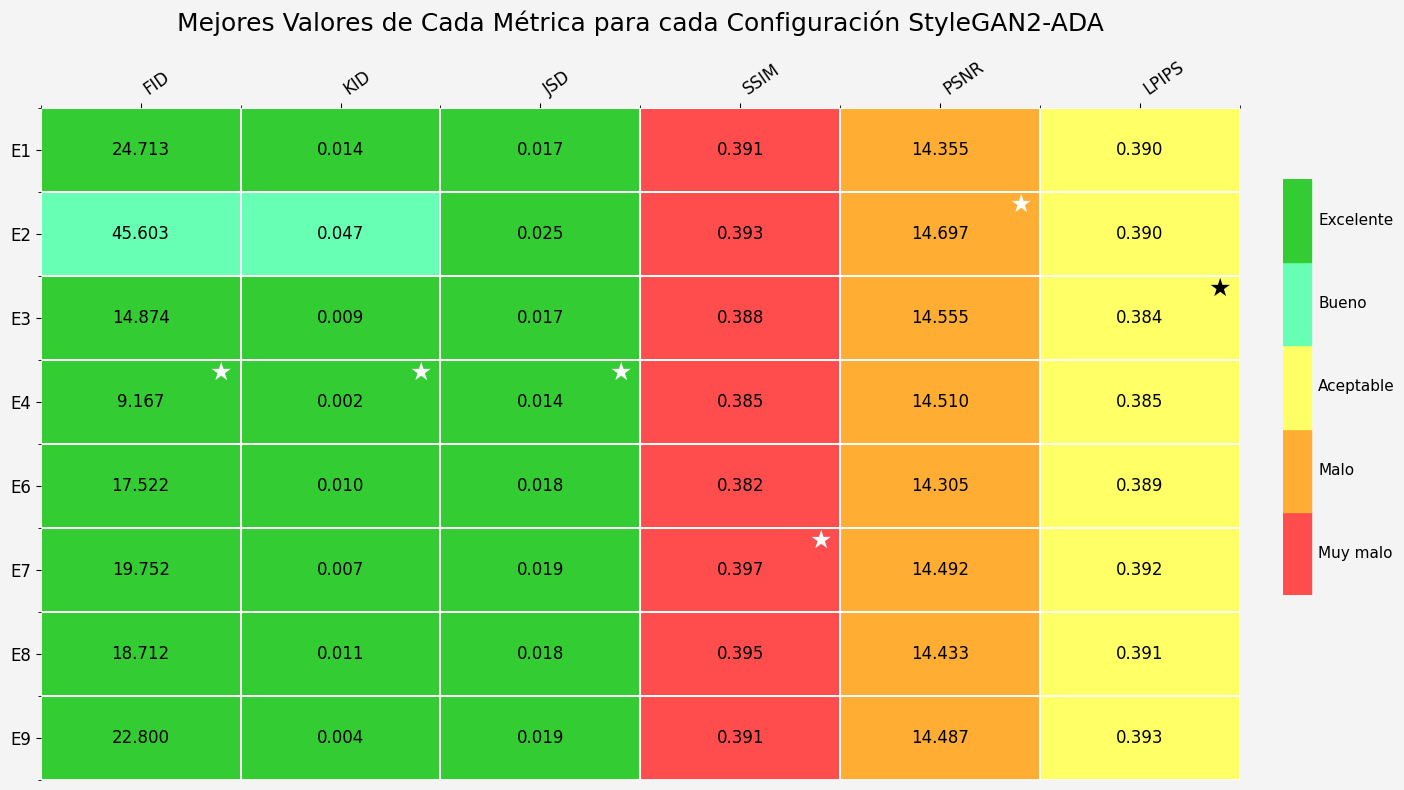

✔ Heatmap guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Heatmap/heatmap_Style.png


In [ ]:
# === MÉTRICAS ===
metrics = ["FID", "KID", "JSD", "SSIM", "PSNR", "LPIPS"]

# === COLORES (verde = peor, rojo = mejor) ===
colors = {"lvl1": "#ff4d4d", "lvl2": "#ffad33", "lvl3": "#ffff66", "lvl4": "#66ffb3", "lvl5": "#33cc33"}

# === RANGOS PERSONALIZADOS POR MÉTRICA ===
ranges = {
    "FID":   [(600,200,"lvl1"), (200,150,"lvl2"), (150,50,"lvl3"), (50,25,"lvl4"), (25,0,"lvl5")],
    "KID":   [(1.0,0.3,"lvl1"), (0.3,0.15,"lvl2"), (0.15,0.07,"lvl3"), (0.07,0.03,"lvl4"), (0.03,0,"lvl5")],
    "JSD":   [(1.0,0.5,"lvl1"), (0.5,0.2,"lvl2"), (0.2,0.1,"lvl3"), (0.1,0.05,"lvl4"), (0.05,0,"lvl5")],
    "SSIM":  [(1.0,0.9,"lvl5"), (0.9,0.75,"lvl4"), (0.75,0.6,"lvl3"), (0.6,0.4,"lvl2"), (0.4,0,"lvl1")],
    "PSNR":  [(60,30,"lvl5"), (30,20,"lvl4"), (20,15,"lvl3"), (15,10,"lvl2"), (10,0,"lvl1")],
    "LPIPS": [(1.0,0.6,"lvl1"), (0.6,0.4,"lvl2"), (0.4,0.25,"lvl3"), (0.25,0.10,"lvl4"), (0.10,0,"lvl5")]
}

# === FUNCIÓN PARA ASIGNAR COLOR ===
def get_color(metric, value):
    for low, high, level in ranges[metric]:
        if low >= value >= high:
            return colors[level]
    return "#000000"


# === EXTRAER MÍNIMOS ===
rows, labels, color_matrix = [], [], []

for name, path in csv_loss_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("Style", ""))

    row, crow = [], []
    for m in metrics:
        # --- elegir mínimo o máximo según métrica ---
        if m in ["FID", "KID", "JSD", "LPIPS"]:
            v = df[m].min()      # menor es mejor
        else:  # SSIM y PSNR
            v = df[m].max()      # mayor es mejor
        row.append(v)
        crow.append(get_color(m, v))

    rows.append(row)
    color_matrix.append(crow)
data = np.array(rows)
colors_array = np.array(color_matrix)


# === FIGURA ===
plt.style.use("default")
fig, ax = plt.subplots(figsize=(14, 8))

fig.patch.set_facecolor("#f4f4f4")
ax.set_facecolor("#f0f0f0")


# === IDENTIFICAR GANADORES POR MÉTRICA ===
best_positions = {}  # {col_index: row_index}

for j, m in enumerate(metrics):
    col_values = data[:, j]
    if m in ["FID", "KID", "JSD", "LPIPS"]:   # métricas donde menor es mejor
        best_positions[j] = np.argmin(col_values)
    else:                                     # métricas donde mayor es mejor
        best_positions[j] = np.argmax(col_values)

# === HEATMAP ===
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        # --- fondo de la celda ---
        ax.add_patch(Rectangle(
            (j, i), 1, 1,
            facecolor=colors_array[i, j],
            edgecolor="white",
            linewidth=1.3
        ))

        # --- valor numérico ---
        ax.text(
            j + 0.50, i + 0.50,
            f"{data[i, j]:.3f}",
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

        # === ★ AGREGAR ESTRELLA A LA CELDA GANADORA ===
        if best_positions[j] == i:

            # --- cambiar color si el fondo es amarillo (lvl3) ---
            cell_color = colors_array[i, j]
            star_color = "black" if cell_color == "#ffff66" else "white"

            ax.text(
                j + 0.90,
                i + 0.15,
                "★",
                ha="center", va="center",
                fontsize=18,
                fontweight="bold",
                color=star_color
            )

# === EJES ===
ax.set_xlim(0, len(metrics))
ax.set_ylim(0, len(labels))

ax.set_xticks(np.arange(len(metrics)) + 0.5)
ax.set_yticks(np.arange(len(labels)) + 0.5)

# MÉTRICAS ARRIBA
ax.xaxis.tick_top()

ax.set_xticklabels(metrics, rotation=35, ha="left", fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

ax.invert_yaxis()

ax.set_xticks(np.arange(len(metrics)+1), minor=True)
ax.set_yticks(np.arange(len(labels)+1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.8, alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(False)


# === TÍTULO ===
plt.title("Mejores Valores de Cada Métrica para cada Configuración StyleGAN2-ADA", fontsize=18, pad=20)


# === LEYENDA ===
legend_ax = fig.add_axes([0.92, 0.25, 0.04, 0.52])
legend_ax.set_facecolor("#f4f4f4")

legend_labels = ["Muy malo", "Malo", "Aceptable", "Bueno", "Excelente"]

for i, lvl in enumerate(["lvl1","lvl2","lvl3","lvl4","lvl5"]):
    legend_ax.add_patch(Rectangle((0, i), 1, 1, color=colors[lvl]))
    legend_ax.text(1.25, i + 0.5, legend_labels[i], va="center", fontsize=11)

legend_ax.set_xlim(0, 2)
legend_ax.set_ylim(0, 5)
legend_ax.axis("off")

plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()

# === GUARDAR EN RUTA ===
save_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/stylegan/Heatmap/heatmap_Style.png"

fig.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"✔ Heatmap guardado en: {save_path}")

#MEDGAN


In [ ]:
# CSV losses y metrics MEDGAN
csv_medgan_files = {
    "medganM1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM1.csv",
    "medganM2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM2.csv",
    "medganM3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM3.csv",
    "medganM4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM4.csv",
    "medganM5": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM5.csv",
    "medganM6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM6.csv",
    "medganM7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM7.csv",
    "medganM8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/medgan/metrics_medganM8.csv",
}

output_lossmedgan_images = {
    "medganM1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM1.png",
    "medganM2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM2.png",
    "medganM3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM3.png",
    "medganM4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM4.png",
    "medganM5": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM5.png",
    "medganM6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM6.png",
    "medganM7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM7.png",
    "medganM8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/loss_medganM8.png",
}
output_metricsmedgan_images = {
    "fid_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/FID_medgan.png",
    "kid_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/KID_medgan.png",
    "jsd_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/JSD_medgan.png",
    "ssim_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/SSIM_medgan.png",
    "psnr_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/PSNR_medgan.png",
    "lpips_medgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/LPIPS_medgan.png"
}

##Losses

No se detectaron colapsos en medganM8.
No se detectaron sobreajustes en medganM8.


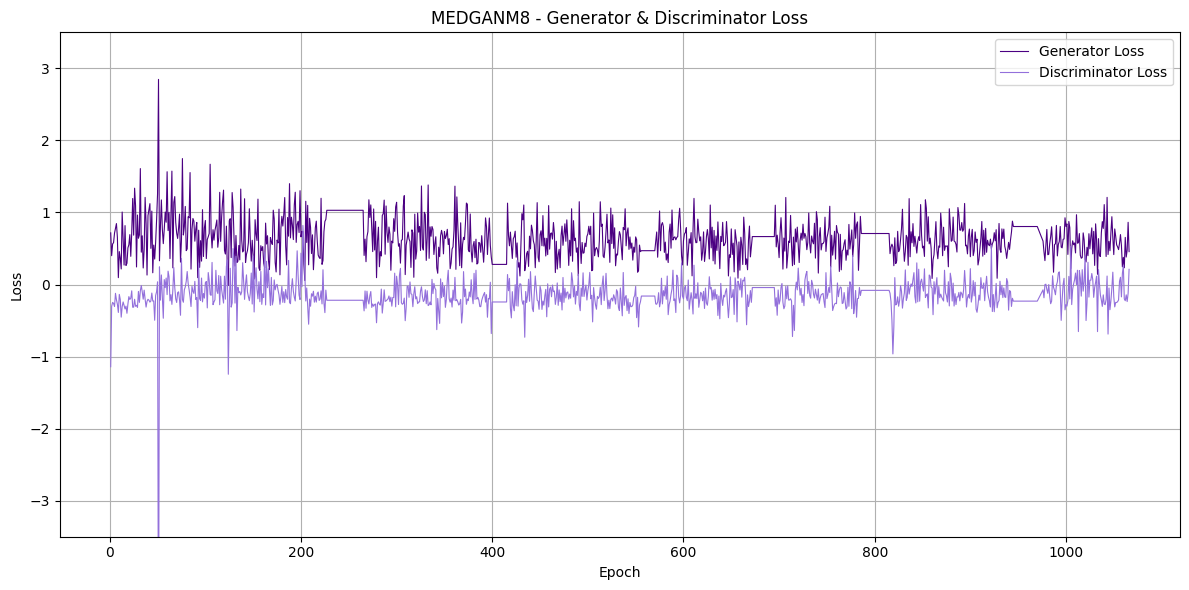

In [ ]:
os.makedirs("/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan", exist_ok=True)

# === Selección del experimento ===
exp = "medganM8"   # <<-- Cambia aquí el experimento que quieras graficar (E1, E2, E3 o E4)

# === Cargar CSV ===
csv_path = csv_medgan_files[exp]
df = pd.read_csv(csv_path)

# === Heurísticas de colapso y sobreajuste ===
collapse_indices = []
overfit_indices = []

# Parámetros ajustables
G_LOW = 0.25       # loss_G bajo persistente (colapso posible)
D_HIGH = 3.5       # loss_D alto persistente (colapso posible)
D_LOW = -0.5       # loss_D demasiado bajo (critic memoriza → sobreajuste)
WINDOW = 3         # número de pasos consecutivos para confirmar

for i in range(len(df) - WINDOW):
    g_window = df.loc[i:i+WINDOW, 'loss_G'].values
    d_window = df.loc[i:i+WINDOW, 'loss_D'].values

    # --- Posible colapso ---
    if np.all(g_window < G_LOW) and np.all(d_window > D_HIGH):
        collapse_indices.append(i)

    # --- Posible sobreajuste ---
    # Critic muy bajo y generador empeorando
    if np.all(d_window < D_LOW) and np.all(np.diff(g_window) > 0):
        overfit_indices.append(i)

# === Agrupar índices consecutivos ===
def agrupar_rangos(indices):
    if not indices:
        return []
    rangos = []
    inicio = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            rangos.append((inicio, indices[i - 1]))
            inicio = indices[i]
    rangos.append((inicio, indices[-1]))
    return rangos

collapse_ranges = agrupar_rangos(collapse_indices)
overfit_ranges = agrupar_rangos(overfit_indices)

# === Imprimir los rangos detectados en consola ===
if collapse_ranges:
    print(f"Posibles colapsos detectados en {exp}:")
    for start, end in collapse_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']} a {df.loc[end, 'epoch']}")
else:
    print(f"No se detectaron colapsos en {exp}.")

if overfit_ranges:
    print(f"Posibles sobreajustes detectados en {exp}:")
    for start, end in overfit_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']} a {df.loc[end, 'epoch']}")
else:
    print(f"No se detectaron sobreajustes en {exp}.")

# === Gráfica ===
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['loss_G'], label='Generator Loss', color='#4B0082', linewidth=0.8)   # Morado oscuro
plt.plot(df['epoch'], df['loss_D'], label='Discriminator Loss', color='#9370DB', linewidth=0.8)   # Morado claro

# Resaltar colapso en rojo
for idx, (start, end) in enumerate(collapse_ranges):
    plt.axvspan(df.loc[start, 'epoch'], df.loc[end, 'epoch'],
                color='red', alpha=0.2,
                label='Collapse Region' if idx == 0 else "")

# Resaltar sobreajuste en naranja
for idx, (start, end) in enumerate(overfit_ranges):
    plt.axvspan(df.loc[start, 'epoch'], df.loc[end, 'epoch'],
                color='orange', alpha=0.2,
                label='Overfitting Region' if idx == 0 else "")

plt.title(f'{exp.upper()} - Generator & Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(-3.5, 3.5)  # Ajuste para WGAN: pérdidas pueden ser negativas
# plt.xlim(0, 1000)  # Ajuste para WGAN: pérdidas pueden ser negativas
plt.legend()
plt.grid(True)
plt.tight_layout()

# Guardar imagen
plt.savefig(output_lossmedgan_images[exp], dpi=300, bbox_inches='tight')
plt.show()

##Metrics

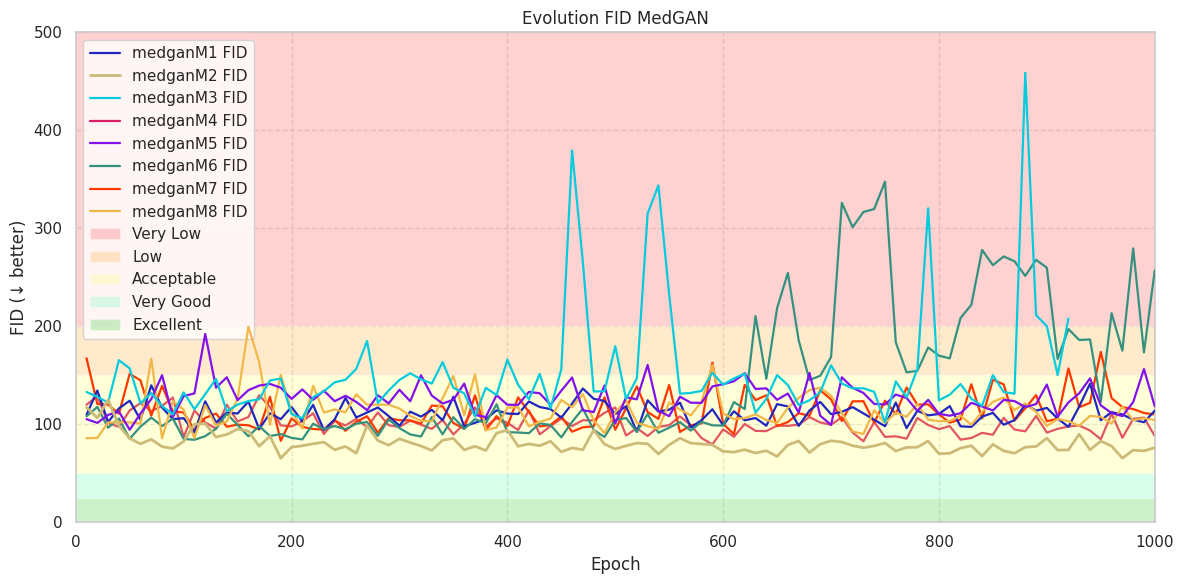

In [ ]:
# === Factor de rescale para FID ===
FID_SCALE = 1  # Ajusta este valor según necesites

# === Gráfica de FID para diferentes configuraciones MedGAN ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]
        df = df[df["epoch"] % 10 == 0]
        epochs = df["epoch"]

    if "FID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'FID'.")
        continue

    # Filtrar filas válidas
    mask = ~df["FID"].isna()

    # Reescalar valores de FID
    df.loc[mask, "FID"] = df.loc[mask, "FID"] * FID_SCALE

    if label == "medganM1":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=2.0, alpha=1.0, zorder=10, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=1, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD FID (contornos visuales) ===
plt.axhspan(600, 200, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(200, 150, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(150, 50,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(50, 25,   facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(25, 0,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution FID MedGAN")
plt.xlabel("Epoch")
plt.ylabel(f"FID (↓ better)")
# plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_medgan_files.values()]))
plt.ylim(0, 500)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar imagen en la ruta dinámica
plt.savefig(output_metricsmedgan_images["fid_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

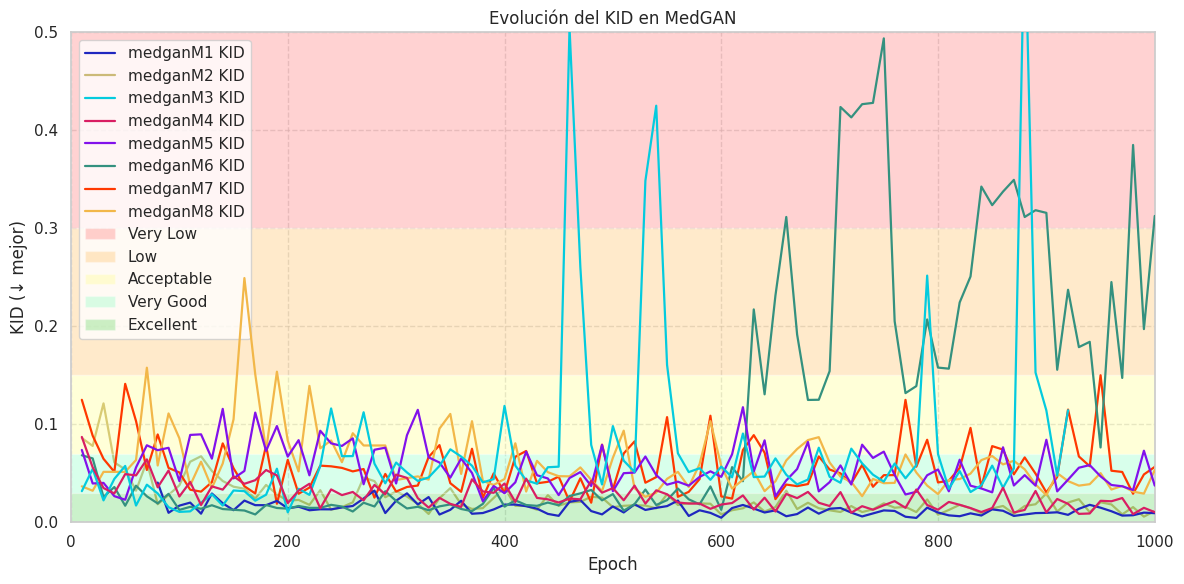

In [ ]:
# === Gráfica de KID para diferentes configuraciones MedGAN (con reescala ×10) ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]
        df = df[df["epoch"] % 10 == 0]
        epochs = df["epoch"]

    if "KID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'KID'.")
        continue

    # Reescala ×10 los valores de KID
    df["KID_rescaled"] = df["KID"] * 1

    # Filtrar filas válidas
    mask = ~df["KID_rescaled"].isna()

    if label == "medganM1":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=2.0, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD KID (contornos visuales) ===
plt.axhspan(0.30, 1.00, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.15, 0.30, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.07, 0.15, facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.03, 0.07, facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.03,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del KID en MedGAN")
plt.xlabel("Epoch")
plt.ylabel("KID (↓ mejor)")
plt.ylim(0, 0.5)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando ruta dinámica
plt.savefig(output_metricsmedgan_images["kid_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

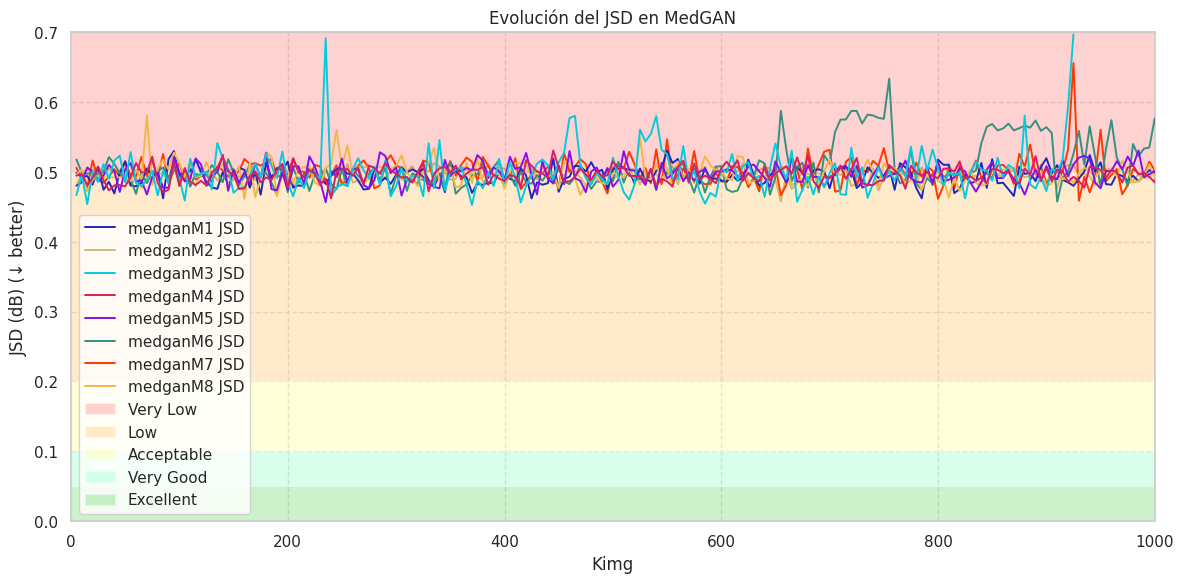

In [ ]:
# === Grafica de JSD para diferentes configuraciones MedGAN ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "JSD" not in df.columns:
        print(f"El archivo {label} no tiene columna 'JSD'.")
        continue

    # Filtrar filas válidas
    mask = ~df["JSD"].isna()

    # Estilos personalizados
    if label == "medganM1":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD JSD (contornos visuales) ===
plt.axhspan(0.5, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.2, 0.5,   facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.1, 0.2,   facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.05, 0.1,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.05,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del JSD en MedGAN")
plt.xlabel("Kimg")
plt.ylabel("JSD (dB) (↓ better)")
plt.xlim(0, 1000)
plt.ylim(0, 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(output_metricsmedgan_images["jsd_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

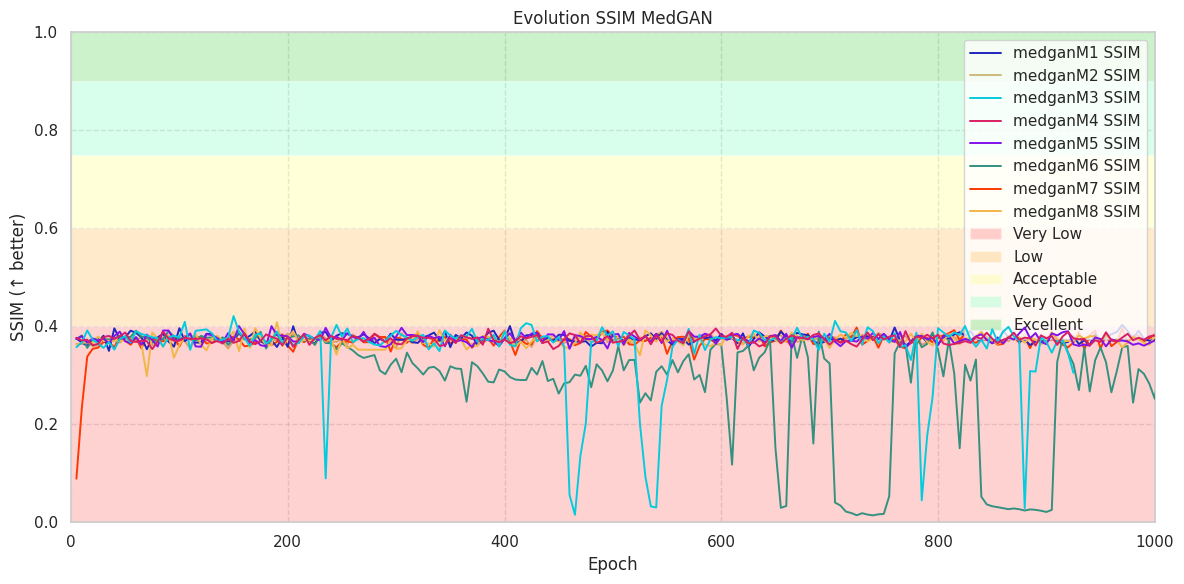

In [ ]:
# === Gráfica de SSIM para diferentes configuraciones MedGAN ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "SSIM" not in df.columns:
        print(f"El archivo {label} no tiene columna 'SSIM'.")
        continue

    # Filtrar filas válidas
    mask = ~df["SSIM"].isna()

    # Estilos personalizados
    if label == "medganM1":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD SSIM (contornos visuales) ===
plt.axhspan(0, 0.40,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.60, 0.75,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.75, 0.90,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.90, 1,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution SSIM MedGAN")
plt.xlabel("Epoch")
plt.ylabel("SSIM (↑ better)")
plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_medgan_files.values()]))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando la ruta del diccionario dinámicamente
plt.savefig(output_metricsmedgan_images["ssim_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

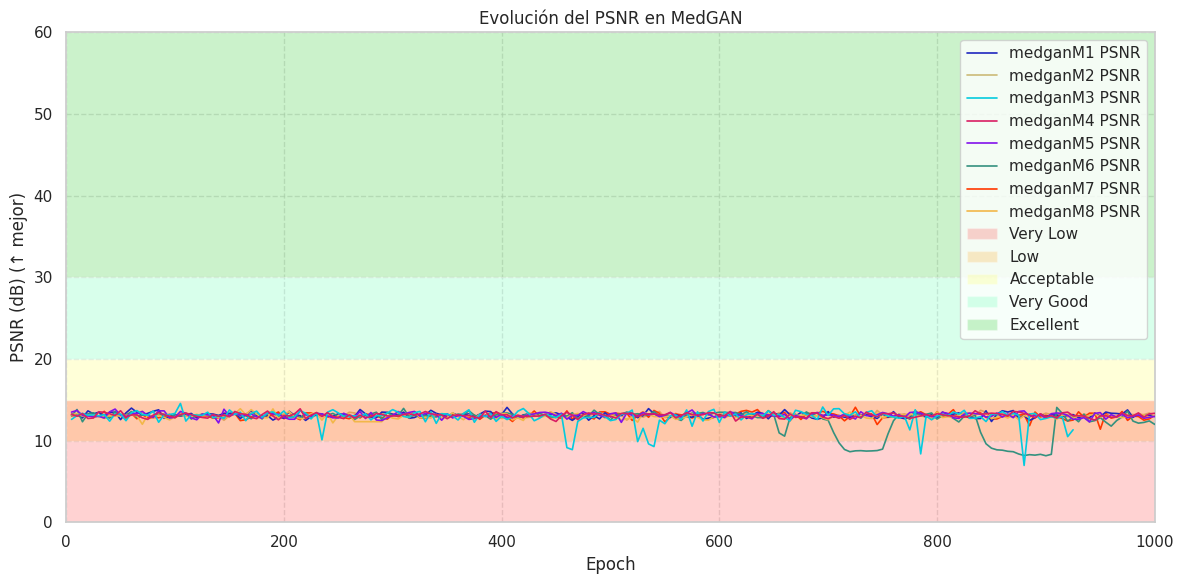

In [ ]:
# === Gráfica de PSNR para diferentes configuraciones MedGAN ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "PSNR" not in df.columns:
        print(f"El archivo {label} no tiene columna 'PSNR'.")
        continue

    # Filtrar filas válidas
    mask = ~df["PSNR"].isna()

    # Estilos personalizados
    if label == "medganM1":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD PSNR (contornos visuales) ===
plt.axhspan(0, 15,   facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(10, 15,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(15, 20,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(20, 30,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(30, 60,  facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del PSNR en MedGAN")
plt.xlabel("Epoch")
plt.ylabel("PSNR (dB) (↑ mejor)")
plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_medgan_files.values()]))
plt.ylim(0, 60)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando la ruta del diccionario dinámico
plt.savefig(output_metricsmedgan_images["psnr_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

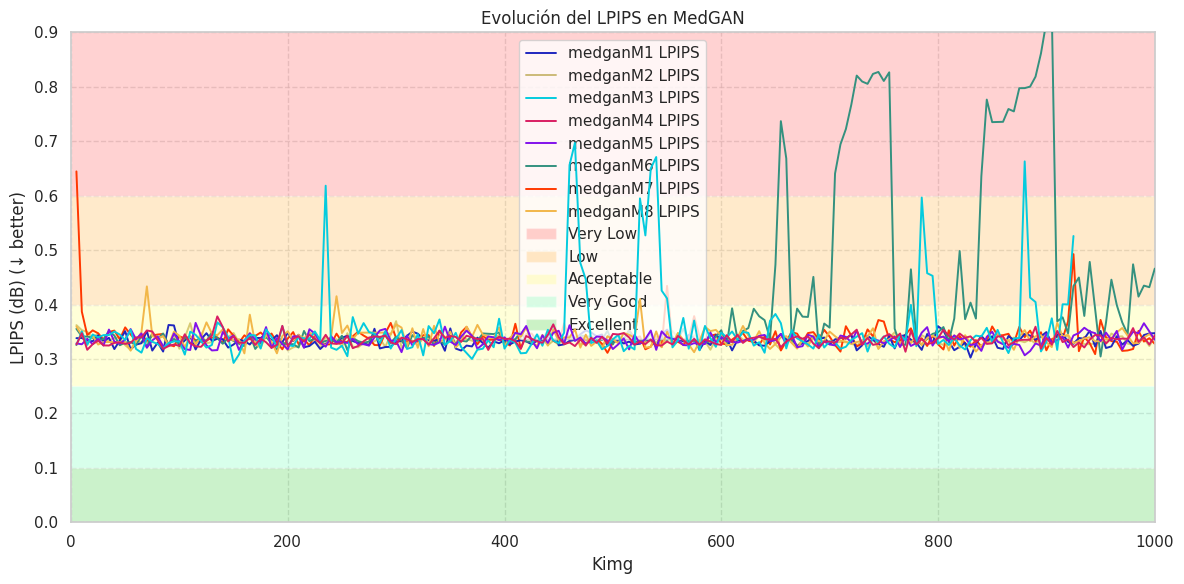

In [ ]:
# === Grafica de LPIPS para diferentes configuraciones MedGAN ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_medgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "LPIPS" not in df.columns:
        print(f"El archivo {label} no tiene columna 'LPIPS'.")
        continue

    # Filtrar filas válidas
    mask = ~df["LPIPS"].isna()

    # Estilos personalizados
    if label == "medganM1":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "medganM2":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "medganM3":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "medganM4":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "medganM5":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "medganM6":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "medganM7":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD LPIPS (contornos visuales) ===
plt.axhspan(0.60, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.25, 0.40,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.10, 0.25,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.10, 0,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del LPIPS en MedGAN")
plt.xlabel("Kimg")
plt.ylabel("LPIPS (dB) (↓ better)")
plt.xlim(0, 1000)
plt.ylim(0, 0.9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(output_metricsmedgan_images["lpips_medgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Violin PLOT

/tmp/ipython-input-3950657394.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="JSD", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-3950657394.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


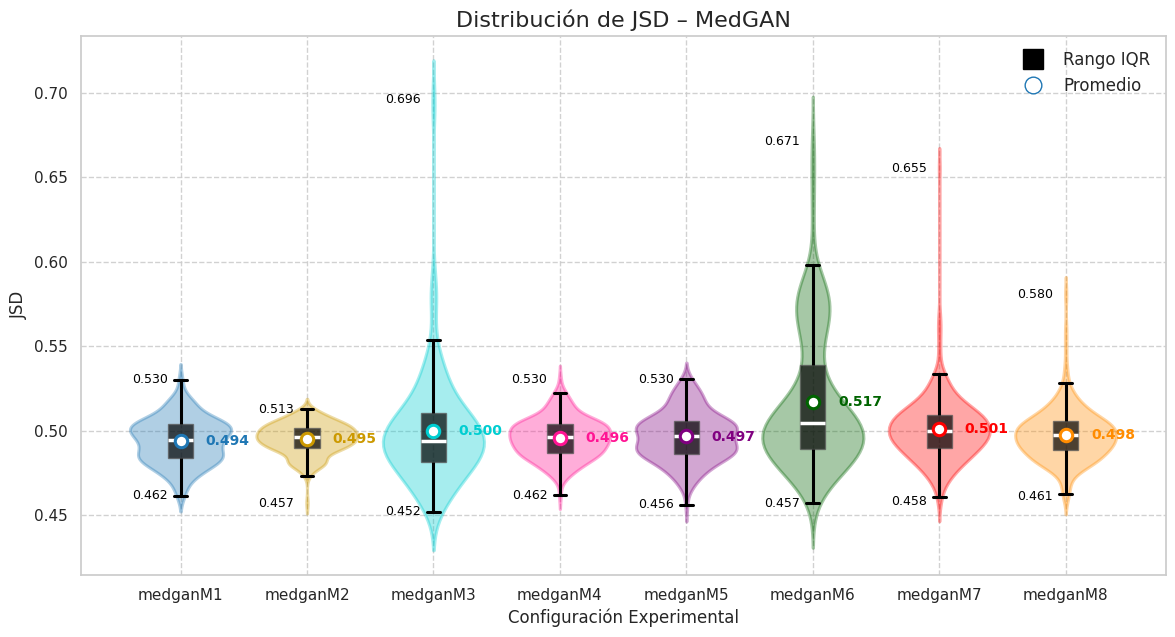

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Violin/JSD_Violin_MedGAN.png


In [ ]:
# === COLORES ===
palette_colors = {"medganM1": "#1f77b4", "medganM2": "#CC9900", "medganM3": "#00CED1", "medganM4": "#FF1493", "medganM5": "#800080", "medganM6": "#006400", "medganM7": "#FF0000", "medganM8": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_medgan_files.items():
    df_tmp = pd.read_csv(path)
    if "JSD" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'JSD'.")
    df_tmp = df_tmp[["JSD"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="JSD", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="JSD",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["JSD"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["JSD"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de JSD – MedGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("JSD")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["medganM1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Violin/JSD_Violin_MedGAN.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

/tmp/ipython-input-4082472709.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="LPIPS", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-4082472709.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


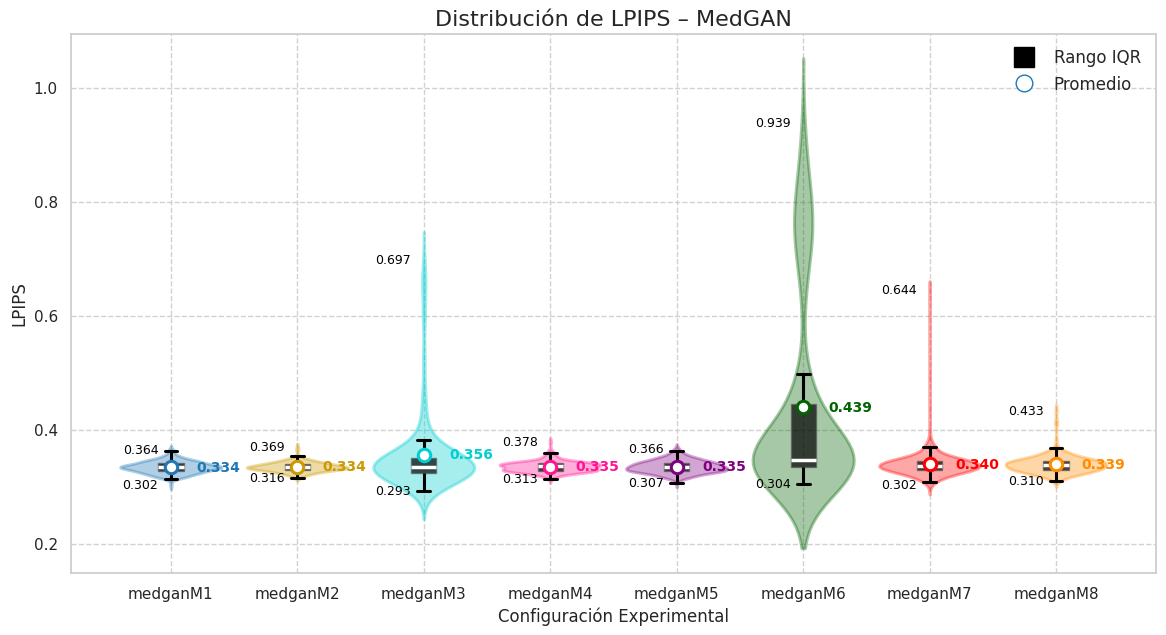

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Violin/LPIPS_Violin_MedGAN.png


In [ ]:
# === COLORES ===
palette_colors = {"medganM1": "#1f77b4", "medganM2": "#CC9900", "medganM3": "#00CED1", "medganM4": "#FF1493", "medganM5": "#800080", "medganM6": "#006400", "medganM7": "#FF0000", "medganM8": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_medgan_files.items():
    df_tmp = pd.read_csv(path)
    if "LPIPS" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'LPIPS'.")
    df_tmp = df_tmp[["LPIPS"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="LPIPS", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="LPIPS",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["LPIPS"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["LPIPS"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de LPIPS – MedGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("LPIPS")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["medganM1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Violin/LPIPS_Violin_MedGAN.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

## Radar Plot


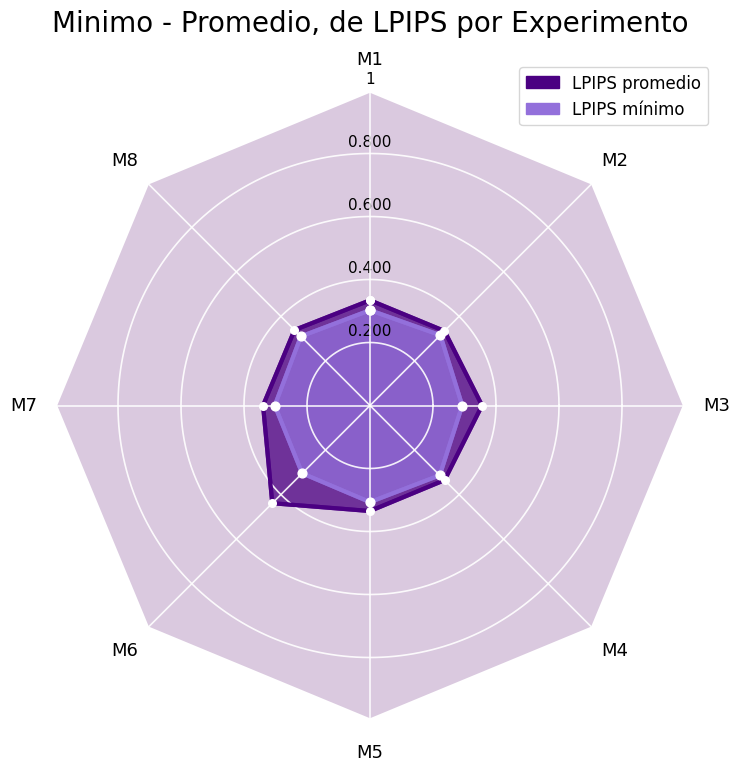

Radar guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Radar/LPIPS_Radar_MEDGAN.png


In [ ]:
# === CONFIGURACIÓN ===
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Radar/LPIPS_Radar_MEDGAN.png"

# === Obtener LPIPS mínimo y promedio de cada CSV ===
labels = []
LPIPS_min = []
LPIPS_mean = []

for name, path in csv_medgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("medgan", ""))

    LPIPS_min.append(df["LPIPS"].min())
    LPIPS_mean.append(df["LPIPS"].mean())

LPIPS_min = np.array(LPIPS_min)
LPIPS_mean = np.array(LPIPS_mean)

# Número de variables (8)
N = len(labels)

# === Ángulos en sentido horario iniciando en la parte superior ===
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, N, endpoint=False)

# === Tipo de métrica a graficar: "LPIPS", "LPIPS" o "LPIPS" ===
metric_type = "LPIPS"   # <-- Cambia esto según la métrica que estés graficando
if metric_type.upper() == "SSIM":
    min_val, max_val = 0.0, 1.0
elif metric_type.upper() == "PSNR":
    min_val, max_val = 0.0, 40.0
elif metric_type.upper() == "LPIPS":
    min_val, max_val = 0.0, 1.0
else:
    # fallback en caso de métrica desconocida
    min_val = 0.0
    max_val = max(LPIPS_min.max(), LPIPS_mean.max())

# Normalizar radios
r_min = LPIPS_min / max_val
r_mean = LPIPS_mean / max_val

# Cerrar polígonos
r_min = np.append(r_min, r_min[0])
r_mean = np.append(r_mean, r_mean[0])
angles_closed = np.append(angles, angles[0])

# Conversión a XY
def to_xy(r):
    return np.column_stack([r * np.cos(angles_closed), r * np.sin(angles_closed)])

xy_min = to_xy(r_min)
xy_mean = to_xy(r_mean)

# === Crear figura ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect("equal")

# === Fondo verde recortado en el octágono ===
theta = angles
octagon = np.column_stack([np.cos(theta), np.sin(theta)])

bg_polygon = Polygon(octagon,closed=True,alpha=0.5, facecolor="#b695c0",edgecolor="none",zorder=0,)
ax.add_patch(bg_polygon)
bg_polygon.set_clip_on(True)

ax.set_facecolor("none")

# === GRILLA INTERNA CIRCULAR ===
levels = 5
for k in range(1, levels+1):
    rr = k / levels
    theta_fine = np.linspace(0, 2*np.pi, 500)
    ax.plot(rr*np.cos(theta_fine),rr*np.sin(theta_fine),color="white",linewidth=1.2,alpha=0.9,zorder=3)

# === ETIQUETAS PARA CADA NIVEL EN LA DIRECCIÓN DE LAS 12 EN PUNTO ===
angle_top = angles[0]                            # dirección de E1 (12 horas)
offset = 0.015
for k in range(1, levels+1):
    rr = k / levels
    LPIPS_value = rr * max_val
    # Formato: 3 decimales si < 1, de lo contrario entero
    if LPIPS_value < 1:
        label_text = f"{LPIPS_value:.3f}"
    else:
        label_text = f"{LPIPS_value:.0f}"

    x = rr * np.cos(angle_top)                   # Coordenadas sobre la misma línea de las 12
    y = rr * np.sin(angle_top)
    # Pequeño desplazamiento hacia afuera
    x_label = rr*np.cos(angle_top)
    y_label = rr*np.sin(angle_top) + offset   # <- más pegado a la grilla
    ax.text(x_label, y_label, label_text, ha="center", va="bottom", fontsize=11, color="black")

# === Líneas radiales ===
for ang in angles:
    ax.plot([0, np.cos(ang)], [0, np.sin(ang)],
            color="white", linewidth=1.2, alpha=0.9, zorder=3)

# === Borde exterior (octágono real) ===
outer = to_xy(np.ones(N+1))
ax.plot(outer[:,0], outer[:,1], color="white", linewidth=3, zorder=4)

# === LPIPS promedio ===
ax.add_patch(Polygon(xy_mean, closed=True,
                     facecolor="#4B0082", alpha=0.75, edgecolor="#4B0082", linewidth=3))
ax.plot(xy_mean[:,0], xy_mean[:,1], color="#4B0082", linewidth=3, zorder=10)
ax.scatter(xy_mean[:,0], xy_mean[:,1], color="white", s=30, zorder=11)

# === LPIPS mínimo ===
ax.add_patch(Polygon(xy_min, closed=True,
                     facecolor="#9370DB", alpha=0.75, edgecolor="#9370DB", linewidth=3))
ax.plot(xy_min[:,0], xy_min[:,1], color="#9370DB", linewidth=3, zorder=12)
ax.scatter(xy_min[:,0], xy_min[:,1], color="white", s=40, zorder=13)

# === Etiquetas (E1…E8 en orden horario) ===
label_radius = 1.10  # Antes 1.18
for ang, lab in zip(angles, labels):
    ax.text(label_radius*np.cos(ang), label_radius*np.sin(ang), lab,
            ha="center", va="center", fontsize=13)

# === Título ===
plt.title("Minimo - Promedio, de LPIPS por Experimento",
          fontsize=20, pad=20, color="black")

# === LEYENDA CORREGIDA ===
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#4B0082", edgecolor="#4B0082", label="LPIPS promedio"),
    Patch(facecolor="#9370DB", edgecolor="#9370DB", label="LPIPS mínimo"),
]

ax.legend(handles=legend_elements, loc="upper right", fontsize=12)

ax.axis("off")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Radar guardado en:", output_path)


## Heatmap


/tmp/ipython-input-1565247385.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 1])


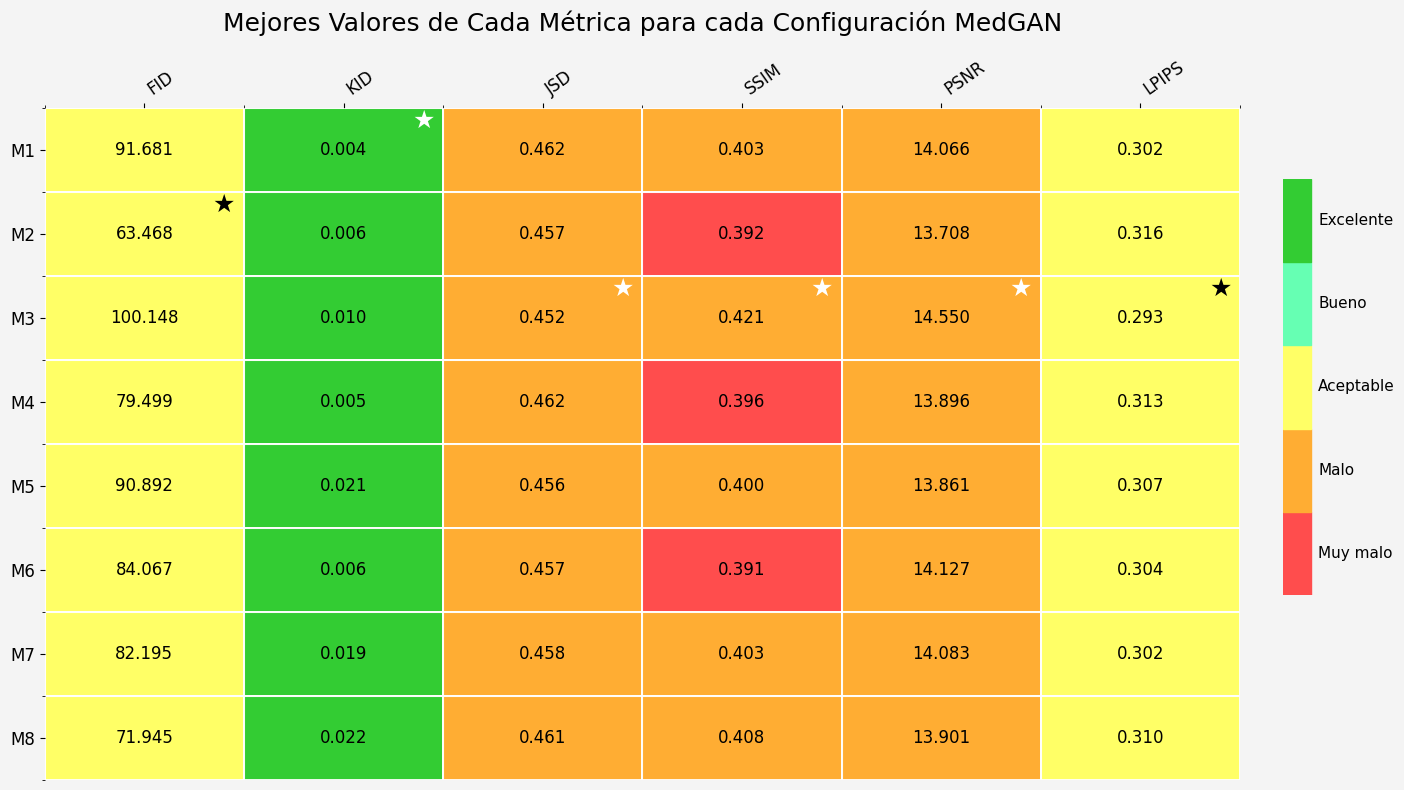

✔ Heatmap guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Heatmap/heatmap_MedGAN.png


In [ ]:
# === MÉTRICAS ===
metrics = ["FID", "KID", "JSD", "SSIM", "PSNR", "LPIPS"]

# === COLORES (verde = peor, rojo = mejor) ===
colors = {"lvl1": "#ff4d4d", "lvl2": "#ffad33", "lvl3": "#ffff66", "lvl4": "#66ffb3", "lvl5": "#33cc33"}

# === RANGOS PERSONALIZADOS POR MÉTRICA ===
ranges = {
    "FID":   [(600,200,"lvl1"), (200,150,"lvl2"), (150,50,"lvl3"), (50,25,"lvl4"), (25,0,"lvl5")],
    "KID":   [(1.0,0.3,"lvl1"), (0.3,0.15,"lvl2"), (0.15,0.07,"lvl3"), (0.07,0.03,"lvl4"), (0.03,0,"lvl5")],
    "JSD":   [(1.0,0.5,"lvl1"), (0.5,0.2,"lvl2"), (0.2,0.1,"lvl3"), (0.1,0.05,"lvl4"), (0.05,0,"lvl5")],
    "SSIM":  [(1.0,0.9,"lvl5"), (0.9,0.75,"lvl4"), (0.75,0.6,"lvl3"), (0.6,0.4,"lvl2"), (0.4,0,"lvl1")],
    "PSNR":  [(60,30,"lvl5"), (30,20,"lvl4"), (20,15,"lvl3"), (15,10,"lvl2"), (10,0,"lvl1")],
    "LPIPS": [(1.0,0.6,"lvl1"), (0.6,0.4,"lvl2"), (0.4,0.25,"lvl3"), (0.25,0.10,"lvl4"), (0.10,0,"lvl5")]
}

# === FUNCIÓN PARA ASIGNAR COLOR ===
def get_color(metric, value):
    for low, high, level in ranges[metric]:
        if low >= value >= high:
            return colors[level]
    return "#000000"


# === EXTRAER MÍNIMOS ===
rows, labels, color_matrix = [], [], []

for name, path in csv_medgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("medgan", ""))

    row, crow = [], []
    for m in metrics:
        # --- elegir mínimo o máximo según métrica ---
        if m in ["FID", "KID", "JSD", "LPIPS"]:
            v = df[m].min()      # menor es mejor
        else:  # SSIM y PSNR
            v = df[m].max()      # mayor es mejor
        row.append(v)
        crow.append(get_color(m, v))

    rows.append(row)
    color_matrix.append(crow)
data = np.array(rows)
colors_array = np.array(color_matrix)

# === FIGURA ===
plt.style.use("default")
fig, ax = plt.subplots(figsize=(14, 8))

fig.patch.set_facecolor("#f4f4f4")
ax.set_facecolor("#f0f0f0")


# === IDENTIFICAR GANADORES POR MÉTRICA ===
best_positions = {}  # {col_index: row_index}

for j, m in enumerate(metrics):
    col_values = data[:, j]
    if m in ["FID", "KID", "JSD", "LPIPS"]:   # métricas donde menor es mejor
        best_positions[j] = np.argmin(col_values)
    else:                                     # métricas donde mayor es mejor
        best_positions[j] = np.argmax(col_values)

# === HEATMAP ===
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        # --- fondo de la celda ---
        ax.add_patch(Rectangle(
            (j, i), 1, 1,
            facecolor=colors_array[i, j],
            edgecolor="white",
            linewidth=1.3
        ))

        # --- valor numérico ---
        ax.text(
            j + 0.50, i + 0.50,
            f"{data[i, j]:.3f}",
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

        # === ★ AGREGAR ESTRELLA A LA CELDA GANADORA ===
        if best_positions[j] == i:

            # --- cambiar color si el fondo es amarillo (lvl3) ---
            cell_color = colors_array[i, j]
            star_color = "black" if cell_color == "#ffff66" else "white"

            ax.text(
                j + 0.90,
                i + 0.15,
                "★",
                ha="center", va="center",
                fontsize=18,
                fontweight="bold",
                color=star_color
            )

# === EJES ===
ax.set_xlim(0, len(metrics))
ax.set_ylim(0, len(labels))

ax.set_xticks(np.arange(len(metrics)) + 0.5)
ax.set_yticks(np.arange(len(labels)) + 0.5)

# MÉTRICAS ARRIBA
ax.xaxis.tick_top()

ax.set_xticklabels(metrics, rotation=35, ha="left", fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

ax.invert_yaxis()

ax.set_xticks(np.arange(len(metrics)+1), minor=True)
ax.set_yticks(np.arange(len(labels)+1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.8, alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(False)


# === TÍTULO ===
plt.title("Mejores Valores de Cada Métrica para cada Configuración MedGAN", fontsize=18, pad=20)


# === LEYENDA ===
legend_ax = fig.add_axes([0.92, 0.25, 0.04, 0.52])
legend_ax.set_facecolor("#f4f4f4")

legend_labels = ["Muy malo", "Malo", "Aceptable", "Bueno", "Excelente"]

for i, lvl in enumerate(["lvl1","lvl2","lvl3","lvl4","lvl5"]):
    legend_ax.add_patch(Rectangle((0, i), 1, 1, color=colors[lvl]))
    legend_ax.text(1.25, i + 0.5, legend_labels[i], va="center", fontsize=11)

legend_ax.set_xlim(0, 2)
legend_ax.set_ylim(0, 5)
legend_ax.axis("off")

plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()

# === GUARDAR EN RUTA ===
save_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/medgan/Heatmap/heatmap_MedGAN.png"

fig.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"✔ Heatmap guardado en: {save_path}")


# WGAN


In [ ]:
# CSV losses y metrics WGAN
csv_wgan_files = {
    "wganW1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW1.csv",
    "wganW2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW2.csv",
    "wganW3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW3.csv",
    "wganW4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW4.csv",
    "wganW5": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW5.csv",
    "wganW6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW6.csv",
    "wganW7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW7.csv",
    "wganW8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/wgan/metrics_wganW8.csv",
}

output_losswgan_images = {
    "wganW1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW1.png",
    "wganW2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW2.png",
    "wganW3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW3.png",
    "wganW4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW4.png",
    "wganW5": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW5.png",
    "wganW6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW6.png",
    "wganW7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW7.png",
    "wganW8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/loss_wganW8.png",
}
output_metricswgan_images = {
    "fid_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/FID_wgan.png",
    "kid_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/KID_wgan.png",
    "jsd_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/JSD_wgan.png",
    "ssim_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/SSIM_wgan.png",
    "psnr_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/PSNR_wgan.png",
    "lpips_wgan": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/LPIPS_wgan.png",
}

## Losses

No se detectaron colapsos en wganW1.
Posibles sobreajustes detectados en wganW1:
  - Epochs 13 a 13
  - Epochs 25 a 26
  - Epochs 57 a 57
  - Epochs 73 a 73
  - Epochs 84 a 84
  - Epochs 96 a 97
  - Epochs 121 a 121
  - Epochs 131 a 131
  - Epochs 147 a 148
  - Epochs 221 a 222
  - Epochs 228 a 228
  - Epochs 252 a 252
  - Epochs 261 a 261
  - Epochs 402 a 402
  - Epochs 416 a 416
  - Epochs 453 a 453
  - Epochs 474 a 474
  - Epochs 499 a 499
  - Epochs 559 a 559
  - Epochs 582 a 584
  - Epochs 605 a 605
  - Epochs 649 a 649
  - Epochs 716 a 717
  - Epochs 754 a 754
  - Epochs 759 a 759
  - Epochs 780 a 780
  - Epochs 790 a 790
  - Epochs 802 a 802
  - Epochs 814 a 815
  - Epochs 845 a 845
  - Epochs 872 a 872
  - Epochs 884 a 885
  - Epochs 904 a 904
  - Epochs 919 a 919
  - Epochs 930 a 932
  - Epochs 980 a 981
  - Epochs 1046 a 1046


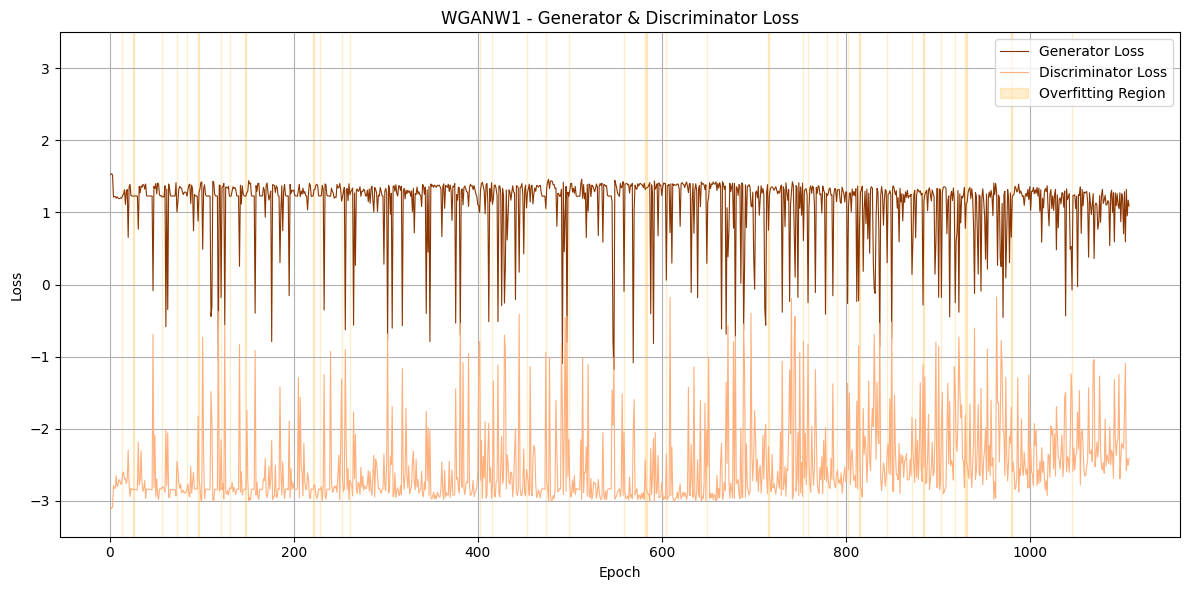

In [ ]:
os.makedirs("/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan", exist_ok=True)

# === Selección del experimento ===
exp = "wganW1"   # <<-- Cambia aquí el experimento que quieras graficar (E1, E2, E3 o E4)

# === Cargar CSV ===
csv_path = csv_wgan_files[exp]
df = pd.read_csv(csv_path)

# === Heurísticas de colapso y sobreajuste ===
collapse_indices = []
overfit_indices = []

# Parámetros ajustables
G_LOW = 0.25       # loss_G bajo persistente (colapso posible)
D_HIGH = 3.5       # loss_D alto persistente (colapso posible)
D_LOW = -0.5       # loss_D demasiado bajo (critic memoriza → sobreajuste)
WINDOW = 3         # número de pasos consecutivos para confirmar

for i in range(len(df) - WINDOW):
    g_window = df.loc[i:i+WINDOW, 'loss_G'].values
    d_window = df.loc[i:i+WINDOW, 'loss_D'].values

    # --- Posible colapso ---
    if np.all(g_window < G_LOW) and np.all(d_window > D_HIGH):
        collapse_indices.append(i)

    # --- Posible sobreajuste ---
    # Critic muy bajo y generador empeorando
    if np.all(d_window < D_LOW) and np.all(np.diff(g_window) > 0):
        overfit_indices.append(i)

# === Agrupar índices consecutivos ===
def agrupar_rangos(indices):
    if not indices:
        return []
    rangos = []
    inicio = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            rangos.append((inicio, indices[i - 1]))
            inicio = indices[i]
    rangos.append((inicio, indices[-1]))
    return rangos

collapse_ranges = agrupar_rangos(collapse_indices)
overfit_ranges = agrupar_rangos(overfit_indices)

# === Imprimir los rangos detectados en consola ===
if collapse_ranges:
    print(f"Posibles colapsos detectados en {exp}:")
    for start, end in collapse_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']} a {df.loc[end, 'epoch']}")
else:
    print(f"No se detectaron colapsos en {exp}.")

if overfit_ranges:
    print(f"Posibles sobreajustes detectados en {exp}:")
    for start, end in overfit_ranges:
        print(f"  - Epochs {df.loc[start, 'epoch']} a {df.loc[end, 'epoch']}")
else:
    print(f"No se detectaron sobreajustes en {exp}.")

# === Gráfica ===
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['loss_G'], label='Generator Loss', color='#8B3600', linewidth=0.8)   # Naranja oscuro
plt.plot(df['epoch'], df['loss_D'], label='Discriminator Loss', color='#FFB07C', linewidth=0.8)   # Naranja claro

# Resaltar colapso en rojo
for idx, (start, end) in enumerate(collapse_ranges):
    plt.axvspan(df.loc[start, 'epoch'], df.loc[end, 'epoch'],
                color='red', alpha=0.2,
                label='Collapse Region' if idx == 0 else "")

# Resaltar sobreajuste en naranja
for idx, (start, end) in enumerate(overfit_ranges):
    plt.axvspan(df.loc[start, 'epoch'], df.loc[end, 'epoch'],
                color='orange', alpha=0.2,
                label='Overfitting Region' if idx == 0 else "")

plt.title(f'{exp.upper()} - Generator & Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(-3.5, 3.5)  # Ajuste para WGAN: pérdidas pueden ser negativas
# plt.xlim(0, 1000)  # Ajuste para WGAN: pérdidas pueden ser negativas
plt.legend()
plt.grid(True)
plt.tight_layout()

# Guardar imagen
plt.savefig(output_losswgan_images[exp], dpi=300, bbox_inches='tight')
plt.show()

## Metricas


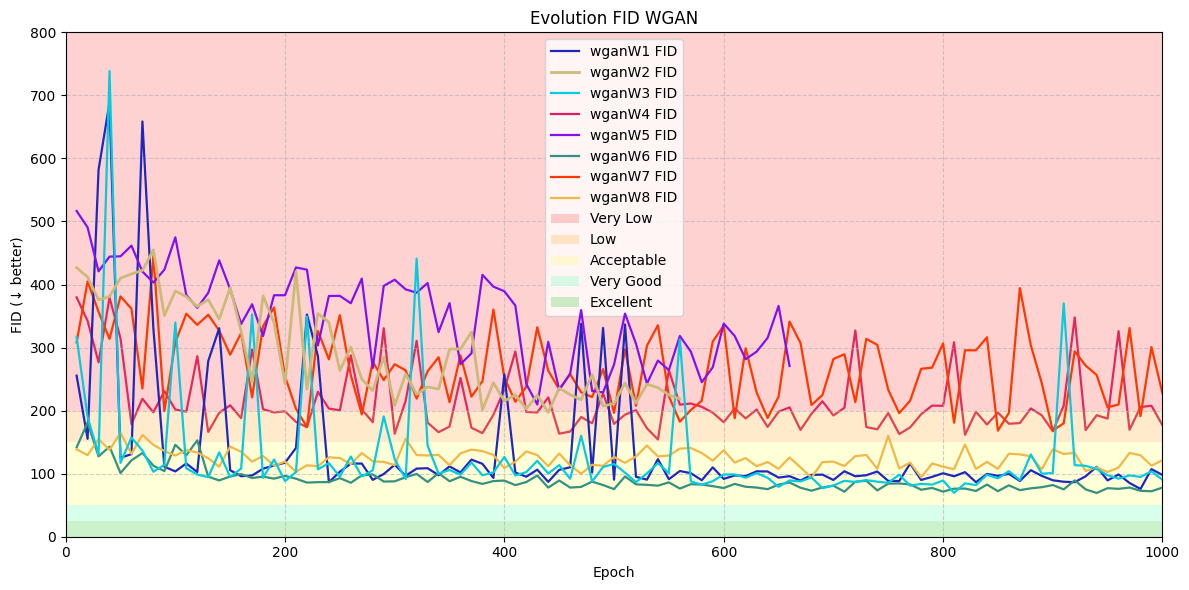

In [ ]:
# === Factor de rescale para FID ===
FID_SCALE = 1  # Ajusta este valor según necesites

# === Gráfica de FID para diferentes configuraciones wgan ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]
        df = df[df["epoch"] % 10 == 0]
        epochs = df["epoch"]

    if "FID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'FID'.")
        continue

    # Filtrar filas válidas
    mask = ~df["FID"].isna()

    # Reescalar valores de FID
    df.loc[mask, "FID"] = df.loc[mask, "FID"] * FID_SCALE

    if label == "wganW1":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=2.0, alpha=1.0, zorder=10, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=1, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["FID"][mask], label=f"{label} FID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD FID (contornos visuales) ===
plt.axhspan(800, 200, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(200, 150, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(150, 50,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(50, 25,   facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(25, 0,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution FID WGAN")
plt.xlabel("Epoch")
plt.ylabel(f"FID (↓ better)")
# plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_wgan_files.values()]))
plt.ylim(0, 800)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar imagen en la ruta dinámica
plt.savefig(output_metricswgan_images["fid_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

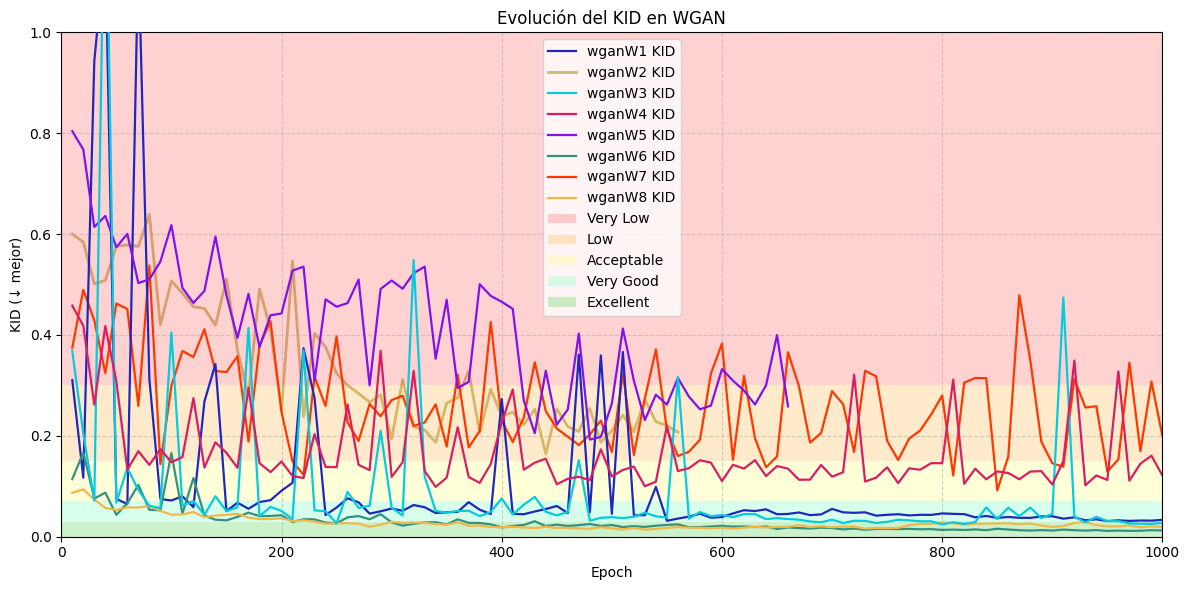

In [ ]:
# === Gráfica de KID para diferentes configuraciones wgan (con reescala ×10) ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]
        df = df[df["epoch"] % 10 == 0]
        epochs = df["epoch"]

    if "KID" not in df.columns:
        print(f"El archivo {label} no tiene columna 'KID'.")
        continue

    # Reescala ×10 los valores de KID
    df["KID_rescaled"] = df["KID"] * 1

    # Filtrar filas válidas
    mask = ~df["KID_rescaled"].isna()

    if label == "wganW1":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=2.0, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["KID"][mask], label=f"{label} KID", linewidth=1.6, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD KID (contornos visuales) ===
plt.axhspan(0.30, 1.00, facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.15, 0.30, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.07, 0.15, facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.03, 0.07, facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.03,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del KID en WGAN")
plt.xlabel("Epoch")
plt.ylabel("KID (↓ mejor)")
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando ruta dinámica
plt.savefig(output_metricswgan_images["kid_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

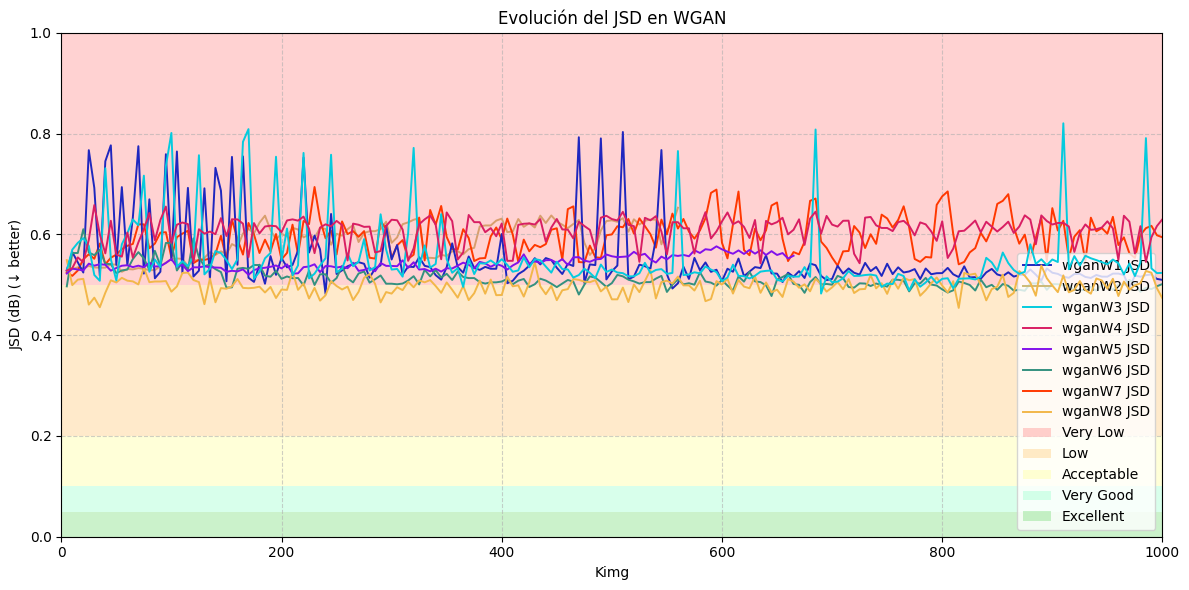

In [ ]:
# === Grafica de JSD para diferentes configuraciones wgan ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "JSD" not in df.columns:
        print(f"El archivo {label} no tiene columna 'JSD'.")
        continue

    # Filtrar filas válidas
    mask = ~df["JSD"].isna()

    # Estilos personalizados
    if label == "wganW1":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["JSD"][mask], label=f"{label} JSD", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD JSD (contornos visuales) ===
plt.axhspan(0.5, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.2, 0.5,   facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.1, 0.2,   facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.05, 0.1,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0, 0.05,    facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del JSD en WGAN")
plt.xlabel("Kimg")
plt.ylabel("JSD (dB) (↓ better)")
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(output_metricswgan_images["jsd_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

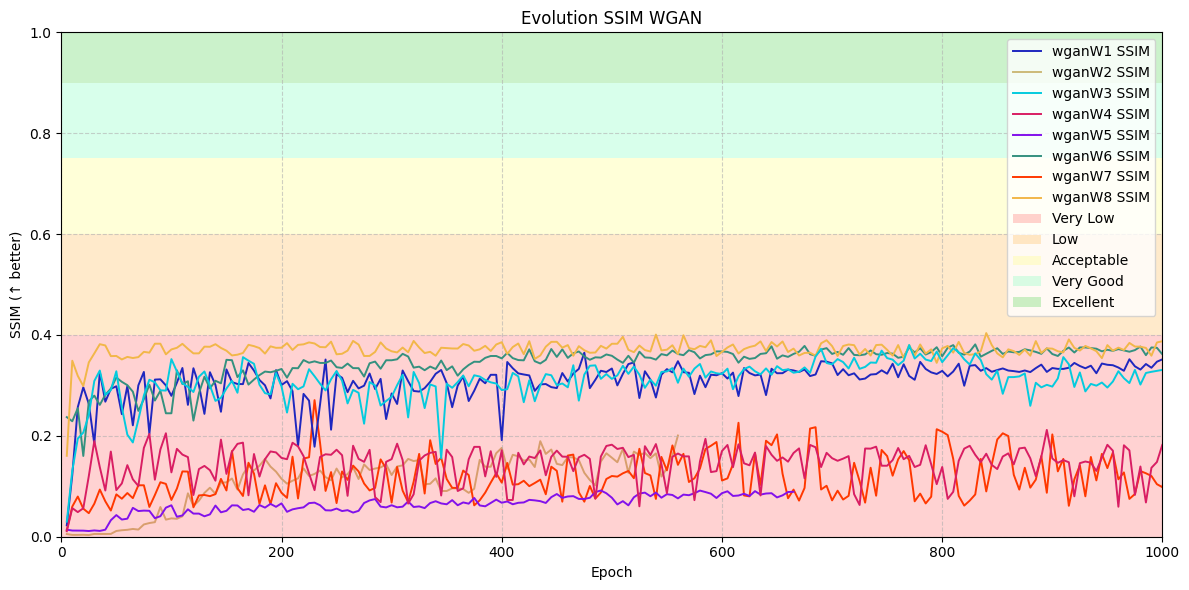

In [ ]:
# === Gráfica de SSIM para diferentes configuraciones wgan ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "SSIM" not in df.columns:
        print(f"El archivo {label} no tiene columna 'SSIM'.")
        continue

    # Filtrar filas válidas
    mask = ~df["SSIM"].isna()

    # Estilos personalizados
    if label == "wganW1":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["SSIM"][mask], label=f"{label} SSIM", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD SSIM (contornos visuales) ===
plt.axhspan(0, 0.40,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.60, 0.75,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.75, 0.90,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.90, 1,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolution SSIM WGAN")
plt.xlabel("Epoch")
plt.ylabel("SSIM (↑ better)")
plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_wgan_files.values()]))
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando la ruta del diccionario dinámicamente
plt.savefig(output_metricswgan_images["ssim_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

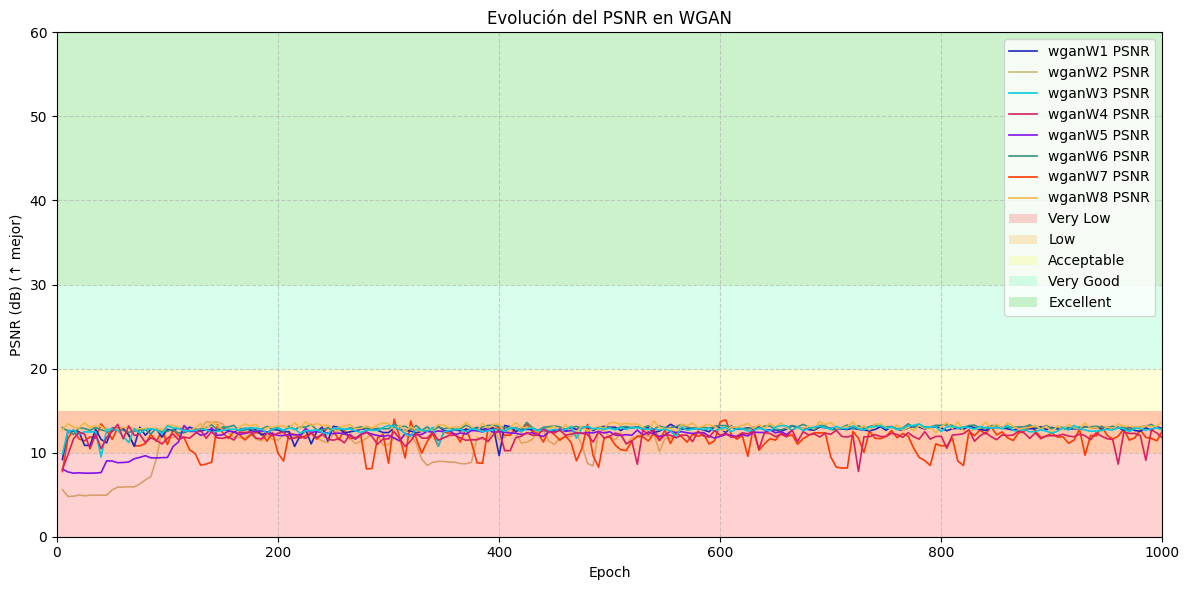

In [ ]:
# === Gráfica de PSNR para diferentes configuraciones wgan ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "PSNR" not in df.columns:
        print(f"El archivo {label} no tiene columna 'PSNR'.")
        continue

    # Filtrar filas válidas
    mask = ~df["PSNR"].isna()

    # Estilos personalizados
    if label == "wganW1":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["PSNR"][mask], label=f"{label} PSNR", linewidth=1.2, alpha=1.0, zorder=7, color="#F2B749")   #4

# === ZONAS DE CALIDAD PSNR (contornos visuales) ===
plt.axhspan(0, 15,   facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(10, 15,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(15, 20,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(20, 30,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(30, 60,  facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del PSNR en WGAN")
plt.xlabel("Epoch")
plt.ylabel("PSNR (dB) (↑ mejor)")
plt.xlim(0, max(df["epoch"].max() for df in [pd.read_csv(f) for f in csv_wgan_files.values()]))
plt.ylim(0, 60)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Guardar usando la ruta del diccionario dinámico
plt.savefig(output_metricswgan_images["psnr_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

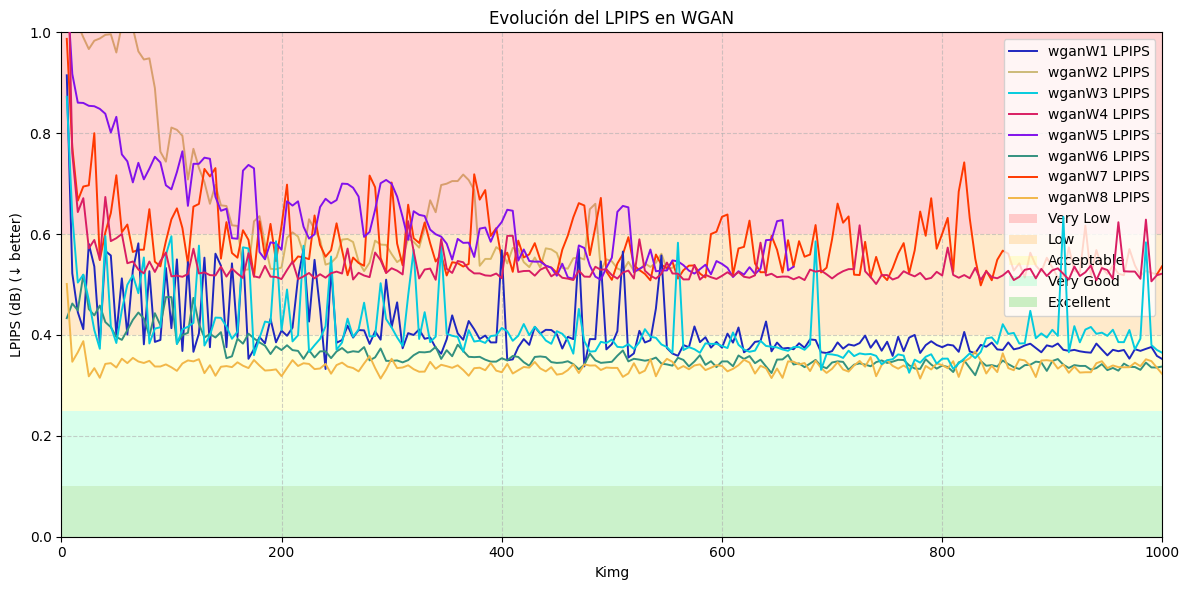

In [ ]:
# === Grafica de LPIPS para diferentes configuraciones wgan ===
plt.figure(figsize=(12, 6))

for label, filepath in csv_wgan_files.items():
    df = pd.read_csv(filepath)

    if "epoch" not in df.columns:
        print(f"El archivo {label} no tiene columna 'epoch'. Se usará índice.")
        epochs = df.index
    else:
        epochs = df["epoch"]

    if "LPIPS" not in df.columns:
        print(f"El archivo {label} no tiene columna 'LPIPS'.")
        continue

    # Filtrar filas válidas
    mask = ~df["LPIPS"].isna()

    # Estilos personalizados
    if label == "wganW1":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=3, color="#1F27BF")   #6
    elif label == "wganW2":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=1, color="#CCBA78")   #8
    elif label == "wganW3":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=9, color="#04CBDE")   #2
    elif label == "wganW4":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=10, color="#D91E63")  #1
    elif label == "wganW5":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=8, color="#8211EB")   #3
    elif label == "wganW6":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=4, color="#34917F")   #5
    elif label == "wganW7":
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=2, color="#FF3800")   #7
    else:
        plt.plot(epochs[mask], df["LPIPS"][mask], label=f"{label} LPIPS", linewidth=1.4, alpha=1.0, zorder=7, color="#F2B749")   #4


# === ZONAS DE CALIDAD LPIPS (contornos visuales) ===
plt.axhspan(0.60, 1,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.25, 0.40,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.10, 0.25,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.10, 0,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# Configuración de la gráfica
plt.title("Evolución del LPIPS en WGAN")
plt.xlabel("Kimg")
plt.ylabel("LPIPS (dB) (↓ better)")
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.savefig(output_metricswgan_images["lpips_wgan"], dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## Violin Plot

/tmp/ipython-input-3457108814.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="JSD", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-3457108814.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


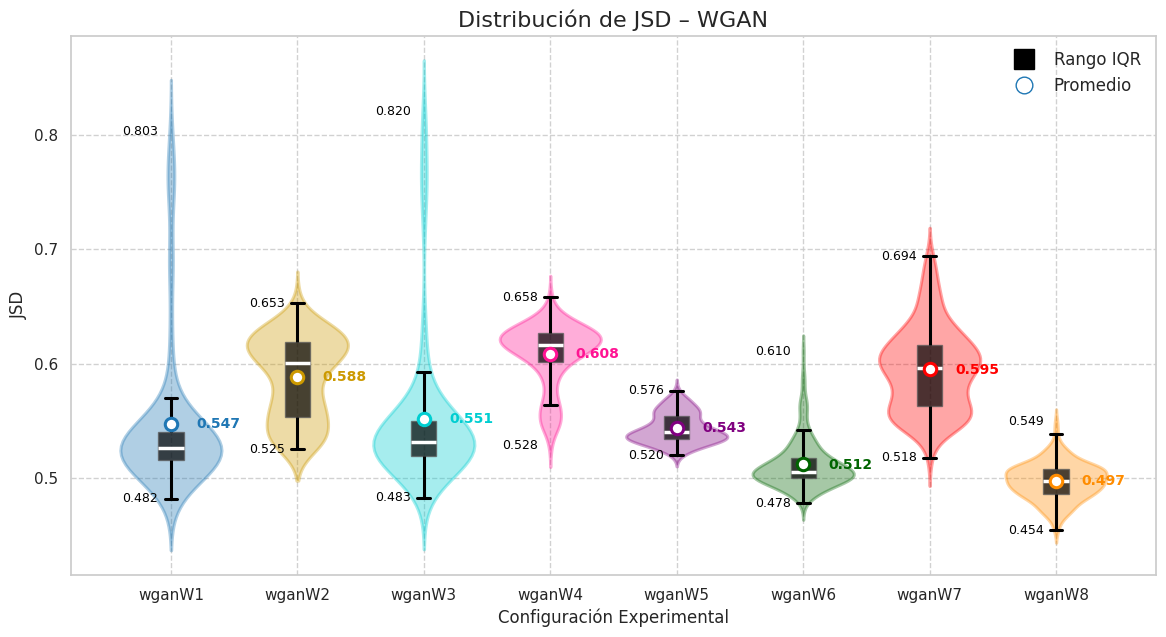

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Violin/JSD_Violin_wgan.png


In [ ]:
# === COLORES ===
palette_colors = {"wganW1": "#1f77b4", "wganW2": "#CC9900", "wganW3": "#00CED1", "wganW4": "#FF1493", "wganW5": "#800080", "wganW6": "#006400", "wganW7": "#FF0000", "wganW8": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_wgan_files.items():
    df_tmp = pd.read_csv(path)
    if "JSD" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'JSD'.")
    df_tmp = df_tmp[["JSD"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="JSD", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="JSD",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["JSD"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["JSD"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de JSD – WGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("JSD")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["wganW1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Violin/JSD_Violin_wgan.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

/tmp/ipython-input-4294019707.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="LPIPS", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-4294019707.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


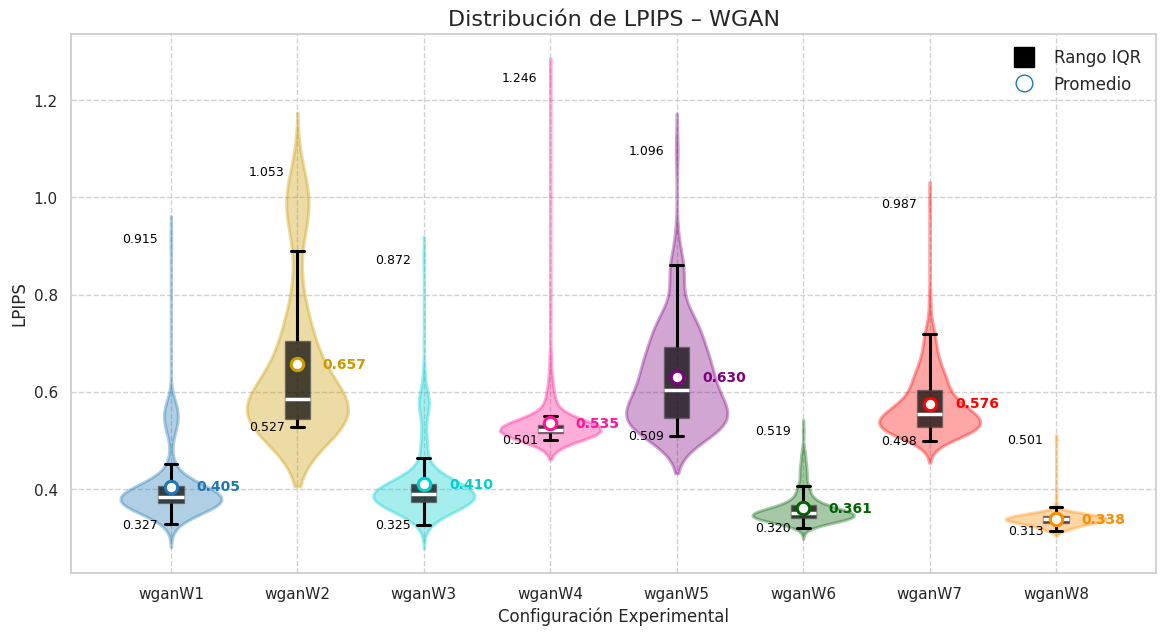

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Violin/LPIPS_Violin_wgan.png


In [ ]:
# === COLORES ===
palette_colors = {"wganW1": "#1f77b4", "wganW2": "#CC9900", "wganW3": "#00CED1", "wganW4": "#FF1493", "wganW5": "#800080", "wganW6": "#006400", "wganW7": "#FF0000", "wganW8": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_wgan_files.items():
    df_tmp = pd.read_csv(path)
    if "LPIPS" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'LPIPS'.")
    df_tmp = df_tmp[["LPIPS"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="LPIPS", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="LPIPS",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["LPIPS"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["LPIPS"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de LPIPS – WGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("LPIPS")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["wganW1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Violin/LPIPS_Violin_wgan.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

## RadioPlot

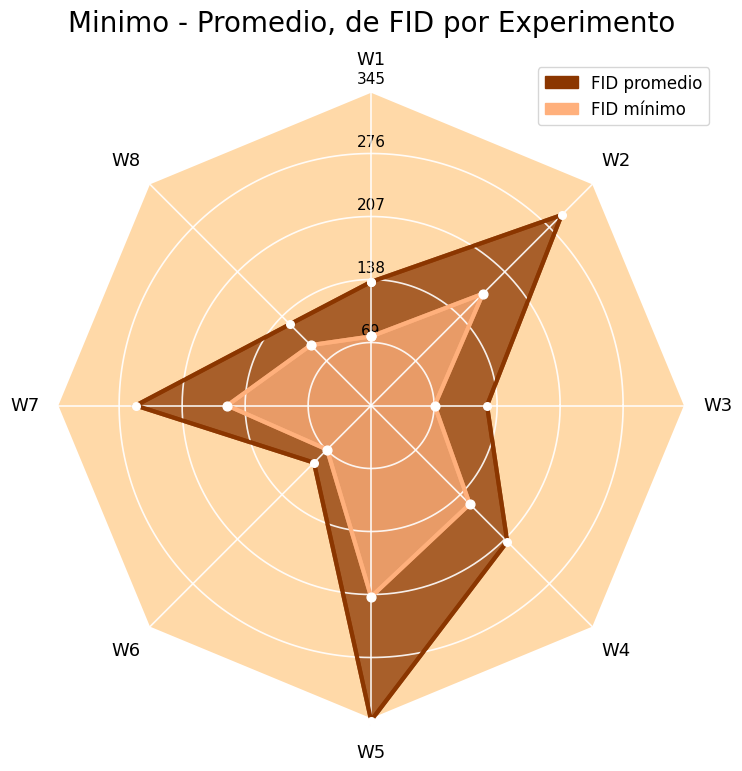

Radar guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Radar/FID_Radar_wgan.png


In [ ]:
# === CONFIGURACIÓN ===
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Radar/FID_Radar_wgan.png"

# === Obtener FID mínimo y promedio de cada CSV ===
labels = []
FID_min = []
FID_mean = []

for name, path in csv_wgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("wgan", ""))

    FID_min.append(df["FID"].min())
    FID_mean.append(df["FID"].mean())

FID_min = np.array(FID_min)
FID_mean = np.array(FID_mean)

# Número de variables (8)
N = len(labels)

# === Ángulos en sentido horario iniciando en la parte superior ===
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, N, endpoint=False)

# === Tipo de métrica a graficar: "FID", "FID" o "FID" ===
metric_type = "FID"   # <-- Cambia esto según la métrica que estés graficando
if metric_type.upper() == "SSIM":
    min_val, max_val = 0.0, 1.0
elif metric_type.upper() == "PSNR":
    min_val, max_val = 0.0, 40.0
elif metric_type.upper() == "JSD":
    min_val, max_val = 0.0, 1.0
elif metric_type.upper() == "LPIPS":
    min_val, max_val = 0.0, 1.0
else:
    # fallback en caso de métrica desconocida
    min_val = 0.0
    max_val = max(FID_min.max(), FID_mean.max())

# Normalizar radios
r_min = FID_min / max_val
r_mean = FID_mean / max_val

# Cerrar polígonos
r_min = np.append(r_min, r_min[0])
r_mean = np.append(r_mean, r_mean[0])
angles_closed = np.append(angles, angles[0])

# Conversión a XY
def to_xy(r):
    return np.column_stack([r * np.cos(angles_closed), r * np.sin(angles_closed)])

xy_min = to_xy(r_min)
xy_mean = to_xy(r_mean)

# === Crear figura ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect("equal")

# === Fondo verde recortado en el octágono ===
theta = angles
octagon = np.column_stack([np.cos(theta), np.sin(theta)])

bg_polygon = Polygon(octagon,closed=True,alpha=0.5, facecolor="#FFB552",edgecolor="none",zorder=0,)
ax.add_patch(bg_polygon)
bg_polygon.set_clip_on(True)

ax.set_facecolor("none")

# === GRILLA INTERNA CIRCULAR ===
levels = 5
for k in range(1, levels+1):
    rr = k / levels
    theta_fine = np.linspace(0, 2*np.pi, 500)
    ax.plot(rr*np.cos(theta_fine),rr*np.sin(theta_fine),color="white",linewidth=1.2,alpha=0.9,zorder=3)

# === ETIQUETAS PARA CADA NIVEL EN LA DIRECCIÓN DE LAS 12 EN PUNTO ===
angle_top = angles[0]                            # dirección de E1 (12 horas)
offset = 0.015
for k in range(1, levels+1):
    rr = k / levels
    FID_value = rr * max_val
    # Formato: 3 decimales si < 1, de lo contrario entero
    if FID_value < 1:
        label_text = f"{FID_value:.3f}"
    else:
        label_text = f"{FID_value:.0f}"

    x = rr * np.cos(angle_top)                   # Coordenadas sobre la misma línea de las 12
    y = rr * np.sin(angle_top)
    # Pequeño desplazamiento hacia afuera
    x_label = rr*np.cos(angle_top)
    y_label = rr*np.sin(angle_top) + offset   # <- más pegado a la grilla
    ax.text(x_label, y_label, label_text, ha="center", va="bottom", fontsize=11, color="black")

# === Líneas radiales ===
for ang in angles:
    ax.plot([0, np.cos(ang)], [0, np.sin(ang)],
            color="white", linewidth=1.2, alpha=0.9, zorder=3)

# === Borde exterior (octágono real) ===
outer = to_xy(np.ones(N+1))
ax.plot(outer[:,0], outer[:,1], color="white", linewidth=3, zorder=4)

# === FID promedio ===
ax.add_patch(Polygon(xy_mean, closed=True,
                     facecolor="#8B3600", alpha=0.75, edgecolor="#8B3600", linewidth=3))
ax.plot(xy_mean[:,0], xy_mean[:,1], color="#8B3600", linewidth=3, zorder=10)
ax.scatter(xy_mean[:,0], xy_mean[:,1], color="white", s=30, zorder=11)

# === FID mínimo ===
ax.add_patch(Polygon(xy_min, closed=True,
                     facecolor="#FFB07C", alpha=0.75, edgecolor="#FFB07C", linewidth=3))
ax.plot(xy_min[:,0], xy_min[:,1], color="#FFB07C", linewidth=3, zorder=12)
ax.scatter(xy_min[:,0], xy_min[:,1], color="white", s=40, zorder=13)

# === Etiquetas (E1…E8 en orden horario) ===
label_radius = 1.10  # Antes 1.18
for ang, lab in zip(angles, labels):
    ax.text(label_radius*np.cos(ang), label_radius*np.sin(ang), lab,
            ha="center", va="center", fontsize=13)

# === Título ===
plt.title("Minimo - Promedio, de FID por Experimento",
          fontsize=20, pad=20, color="black")

# === LEYENDA CORREGIDA ===
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#8B3600", edgecolor="#8B3600", label="FID promedio"),
    Patch(facecolor="#FFB07C", edgecolor="#FFB07C", label="FID mínimo"),
]

ax.legend(handles=legend_elements, loc="upper right", fontsize=12)

ax.axis("off")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Radar guardado en:", output_path)


## Heatmap


/tmp/ipython-input-2043066607.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 1])


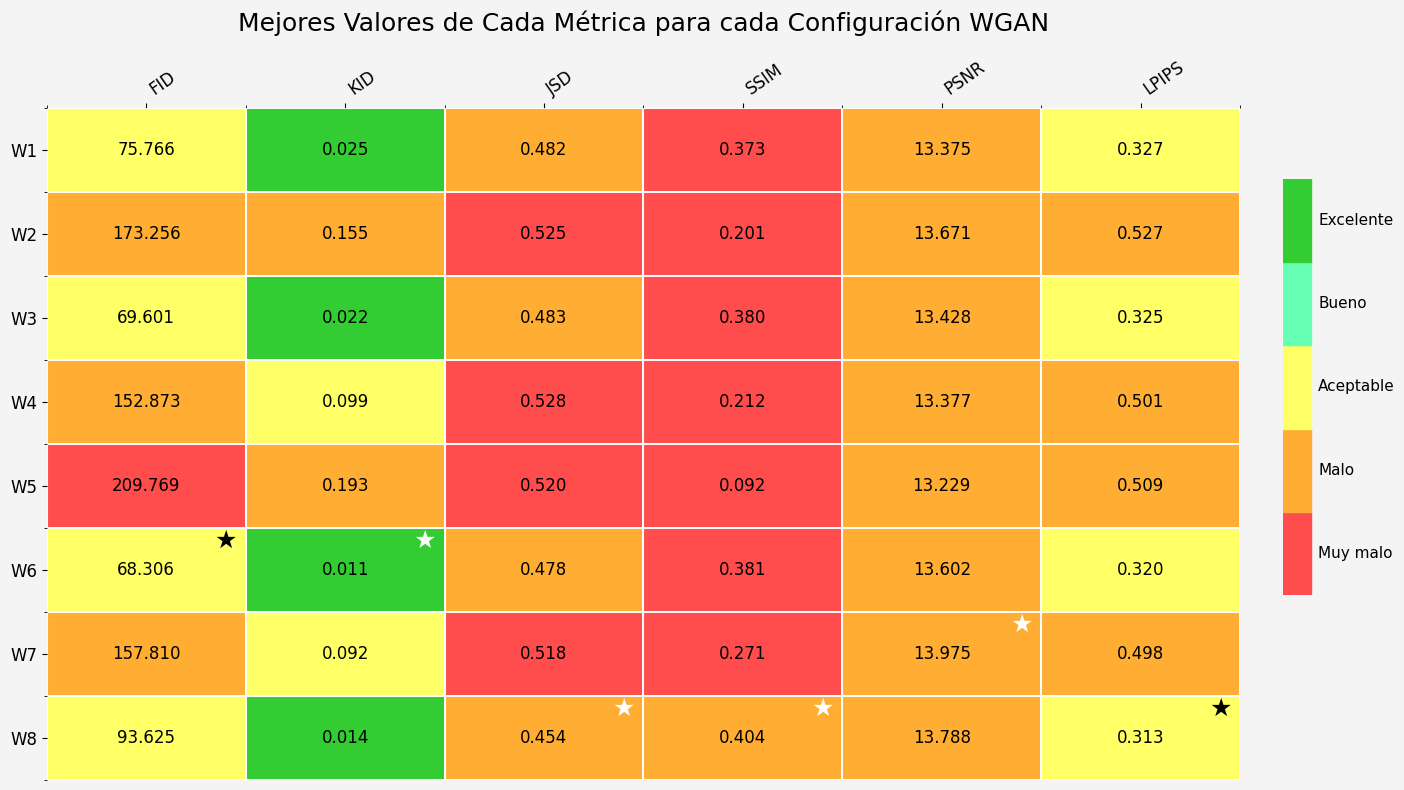

✔ Heatmap guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Heatmap/heatmap_WGAN.png


In [ ]:
# === MÉTRICAS ===
metrics = ["FID", "KID", "JSD", "SSIM", "PSNR", "LPIPS"]

# === COLORES (verde = peor, rojo = mejor) ===
colors = {"lvl1": "#ff4d4d", "lvl2": "#ffad33", "lvl3": "#ffff66", "lvl4": "#66ffb3", "lvl5": "#33cc33"}

# === RANGOS PERSONALIZADOS POR MÉTRICA ===
ranges = {
    "FID":   [(600,200,"lvl1"), (200,150,"lvl2"), (150,50,"lvl3"), (50,25,"lvl4"), (25,0,"lvl5")],
    "KID":   [(1.0,0.3,"lvl1"), (0.3,0.15,"lvl2"), (0.15,0.07,"lvl3"), (0.07,0.03,"lvl4"), (0.03,0,"lvl5")],
    "JSD":   [(1.0,0.5,"lvl1"), (0.5,0.2,"lvl2"), (0.2,0.1,"lvl3"), (0.1,0.05,"lvl4"), (0.05,0,"lvl5")],
    "SSIM":  [(1.0,0.9,"lvl5"), (0.9,0.75,"lvl4"), (0.75,0.6,"lvl3"), (0.6,0.4,"lvl2"), (0.4,0,"lvl1")],
    "PSNR":  [(60,30,"lvl5"), (30,20,"lvl4"), (20,15,"lvl3"), (15,10,"lvl2"), (10,0,"lvl1")],
    "LPIPS": [(1.0,0.6,"lvl1"), (0.6,0.4,"lvl2"), (0.4,0.25,"lvl3"), (0.25,0.10,"lvl4"), (0.10,0,"lvl5")]
}

# === FUNCIÓN PARA ASIGNAR COLOR ===
def get_color(metric, value):
    for low, high, level in ranges[metric]:
        if low >= value >= high:
            return colors[level]
    return "#000000"


# === EXTRAER MÍNIMOS ===
rows, labels, color_matrix = [], [], []

for name, path in csv_wgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("wgan", ""))

    row, crow = [], []
    for m in metrics:
        # --- elegir mínimo o máximo según métrica ---
        if m in ["FID", "KID", "JSD", "LPIPS"]:
            v = df[m].min()      # menor es mejor
        else:  # SSIM y PSNR
            v = df[m].max()      # mayor es mejor
        row.append(v)
        crow.append(get_color(m, v))

    rows.append(row)
    color_matrix.append(crow)
data = np.array(rows)
colors_array = np.array(color_matrix)


# === FIGURA ===
plt.style.use("default")
fig, ax = plt.subplots(figsize=(14, 8))

fig.patch.set_facecolor("#f4f4f4")
ax.set_facecolor("#f0f0f0")

# === IDENTIFICAR GANADORES POR MÉTRICA ===
best_positions = {}  # {col_index: row_index}

for j, m in enumerate(metrics):
    col_values = data[:, j]
    if m in ["FID", "KID", "JSD", "LPIPS"]:   # métricas donde menor es mejor
        best_positions[j] = np.argmin(col_values)
    else:                                     # métricas donde mayor es mejor
        best_positions[j] = np.argmax(col_values)

# === HEATMAP ===
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        # --- fondo de la celda ---
        ax.add_patch(Rectangle(
            (j, i), 1, 1,
            facecolor=colors_array[i, j],
            edgecolor="white",
            linewidth=1.3
        ))

        # --- valor numérico ---
        ax.text(
            j + 0.50, i + 0.50,
            f"{data[i, j]:.3f}",
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

        # === ★ AGREGAR ESTRELLA A LA CELDA GANADORA ===
        if best_positions[j] == i:

            # --- cambiar color si el fondo es amarillo (lvl3) ---
            cell_color = colors_array[i, j]
            star_color = "black" if cell_color == "#ffff66" else "white"

            ax.text(
                j + 0.90,
                i + 0.15,
                "★",
                ha="center", va="center",
                fontsize=18,
                fontweight="bold",
                color=star_color
            )

# === EJES ===
ax.set_xlim(0, len(metrics))
ax.set_ylim(0, len(labels))

ax.set_xticks(np.arange(len(metrics)) + 0.5)
ax.set_yticks(np.arange(len(labels)) + 0.5)

# MÉTRICAS ARRIBA
ax.xaxis.tick_top()

ax.set_xticklabels(metrics, rotation=35, ha="left", fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

ax.invert_yaxis()

ax.set_xticks(np.arange(len(metrics)+1), minor=True)
ax.set_yticks(np.arange(len(labels)+1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.8, alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(False)


# === TÍTULO ===
plt.title("Mejores Valores de Cada Métrica para cada Configuración WGAN", fontsize=18, pad=20)


# === LEYENDA ===
legend_ax = fig.add_axes([0.92, 0.25, 0.04, 0.52])
legend_ax.set_facecolor("#f4f4f4")

legend_labels = ["Muy malo", "Malo", "Aceptable", "Bueno", "Excelente"]

for i, lvl in enumerate(["lvl1","lvl2","lvl3","lvl4","lvl5"]):
    legend_ax.add_patch(Rectangle((0, i), 1, 1, color=colors[lvl]))
    legend_ax.text(1.25, i + 0.5, legend_labels[i], va="center", fontsize=11)

legend_ax.set_xlim(0, 2)
legend_ax.set_ylim(0, 5)
legend_ax.axis("off")

plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()

# === GUARDAR EN RUTA ===
save_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/wgan/Heatmap/heatmap_WGAN.png"

fig.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"✔ Heatmap guardado en: {save_path}")

#VQ-GAN


In [ ]:
csv_vqgan_files = {
    "vqganVQ1": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ1.csv",
    "vqganVQ2": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ2.csv",
    "vqganVQ3": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ3.csv",
    "vqganVQ4": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ4.csv",
    "vqganVQ5": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ5.csv",
    "vqganVQ6": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ6.csv",
    "vqganVQ7": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ7.csv",
    "vqganVQ8": "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/metrics_history_VQ8.csv",
}

## EXTRAER EXCEL TEMPORAL


In [ ]:
# Ruta al archivo JSON en tu Google Drive
json_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/JSON (TEMPORAL)/loss_history_vq3.json"

# Ruta donde guardar el CSV
csv_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV//vq-gan/loss_history_vq3.csv"

# Leer el JSON
with open(json_path, "r") as f:
    data = json.load(f)

# Convertir a DataFrame con las columnas en el orden solicitado
df = pd.DataFrame(data, columns=[
    "epoch", "rec_loss", "perceptual_loss", "q_loss", "g_loss", "gen_loss", "disc_loss"
])

# Guardar a CSV
df.to_csv(csv_path, index=False)

print("✅ CSV generado en:", csv_path)
print(df.head())  # Mostrar las primeras filas para verificar

✅ CSV generado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV//vq-gan/loss_history_vq3.csv
   epoch  rec_loss  perceptual_loss    q_loss    g_loss  gen_loss  disc_loss
0      1  0.048780         0.015581  2.070043 -1.001853  2.134404   0.000000
1      2  0.030005         0.005750  0.049513 -0.995146  0.082889   0.006324
2      3  0.044170         0.009161  0.058849 -0.068071 -0.292021   1.001733
3      4  0.031579         0.005715  0.018776  1.067024 -0.048687   0.441408
4      5  0.025820         0.004000  0.011682  1.984838  0.107101   0.029067


In [ ]:
# Ruta al archivo JSON en tu Google Drive
json_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/JSON (TEMPORAL)/metrics_history_disvq8.json"

# Ruta donde guardar el CSV
csv_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV//vq-gan/metrics_history_disvq8.csv"

# Leer el JSON
with open(json_path, "r") as f:
    data = json.load(f)

# Convertir a DataFrame con las columnas en el orden solicitado
df = pd.DataFrame(data, columns=[
    "epoch", "fid"
])

# Guardar a CSV
df.to_csv(csv_path, index=False)

print("✅ CSV generado en:", csv_path)
print(df.head())  # Mostrar las primeras filas para verificar

✅ CSV generado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV//vq-gan/metrics_history_disvq8.csv
   epoch         fid
0      1  200.598393
1      2  164.128229
2      3  160.394275
3     15  172.754373
4     16  159.739068


## Losses


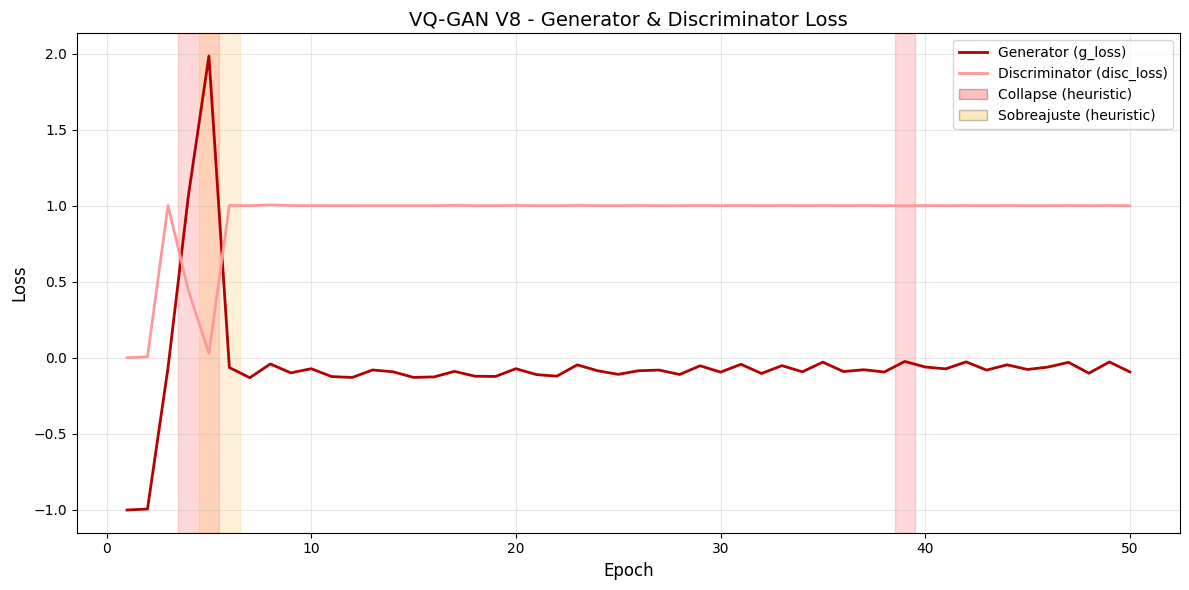

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# === Leer CSV ===
csv_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan/loss_history_vq3.csv"
csv_pathend = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/loss_vqganV3.png"
df = pd.read_csv(csv_path)

epochs = df["epoch"].values
g_loss = df["g_loss"].values
d_loss = df["disc_loss"].values

# === Heurísticas de detección ===
collapse_mask = (d_loss < np.percentile(d_loss, 10)) & (g_loss > np.percentile(g_loss, 90))
grad_g = np.gradient(g_loss)
grad_d = np.gradient(d_loss)
overfit_mask = (grad_g < -0.01) & (grad_d > 0.01)

# --- Función auxiliar para agrupar índices contiguos en intervalos ---
def group_contiguous(indices):
    if len(indices) == 0:
        return []
    groups = []
    start = indices[0]
    prev = indices[0]
    for idx in indices[1:]:
        if idx == prev + 1:
            prev = idx
            continue
        else:
            groups.append((start, prev))
            start = idx
            prev = idx
    groups.append((start, prev))
    return groups

# Convertir máscaras a índices
collapse_idx = np.where(collapse_mask)[0].tolist()
overfit_idx = np.where(overfit_mask)[0].tolist()

collapse_ranges = group_contiguous(collapse_idx)
overfit_ranges = group_contiguous(overfit_idx)

# === Gráfica ===
fig, ax = plt.subplots(figsize=(12, 6))

# Primero dibujamos las franjas para que queden detrás (zorder bajo)
for (s, e) in collapse_ranges:
    # epoch values: usamos epochs[s] ... epochs[e]
    ax.axvspan(epochs[s] - 0.5, epochs[e] + 0.5, color="red", alpha=0.15, zorder=0)

for (s, e) in overfit_ranges:
    ax.axvspan(epochs[s] - 0.5, epochs[e] + 0.5, color="orange", alpha=0.15, zorder=0)

# Ahora las curvas por encima (zorder alto)
ax.plot(epochs, g_loss, color="#b30000", linewidth=2, label="Generator (g_loss)", zorder=3)
ax.plot(epochs, d_loss, color="#ff9999", linewidth=2, label="Discriminator (disc_loss)", zorder=3)

# --- Leyenda para las franjas ---
legend_handles = []
# Añadimos las leyendas de las curvas (automático)
curve_handles, curve_labels = ax.get_legend_handles_labels()
legend_handles.extend(curve_handles)

# Añadir patches solo si existen rangos detectados
if len(collapse_ranges) > 0:
    collapse_patch = mpatches.Patch(facecolor="red", edgecolor="k", alpha=0.25,
                                   label="Collapse (heuristic)")
    legend_handles.append(collapse_patch)

if len(overfit_ranges) > 0:
    overfit_patch = mpatches.Patch(facecolor="orange", edgecolor="k", alpha=0.25,
                                   label="Sobreajuste (heuristic)")
    legend_handles.append(overfit_patch)

# Mostrar leyenda (orden: curvas primero, luego patches)
ax.legend(handles=legend_handles, fontsize=10)

# Estética
ax.set_title("VQ-GAN V8 - Generator & Discriminator Loss", fontsize=14)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(csv_pathend, dpi=300, bbox_inches='tight')
plt.show()


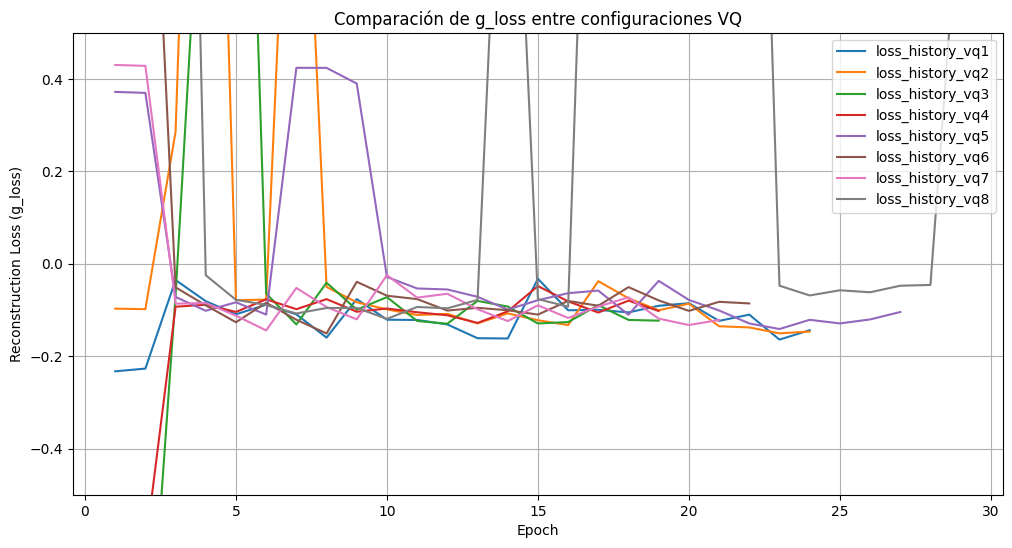

In [ ]:
# Carpeta donde guardaste tus CSV
csv_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan"
configs = ["loss_history_vq1", "loss_history_vq2", "loss_history_vq3", "loss_history_vq4", "loss_history_vq5", "loss_history_vq6", "loss_history_vq7", "loss_history_vq8"]
plt.figure(figsize=(12, 6))

for config in configs:
    csv_path = os.path.join(csv_dir, f"{config}.csv")
    df = pd.read_csv(csv_path)
    plt.plot(df["epoch"], df["g_loss"], label=config)

plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (g_loss)")
plt.title("Comparación de g_loss entre configuraciones VQ")
plt.legend()
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.show()

## Metricas

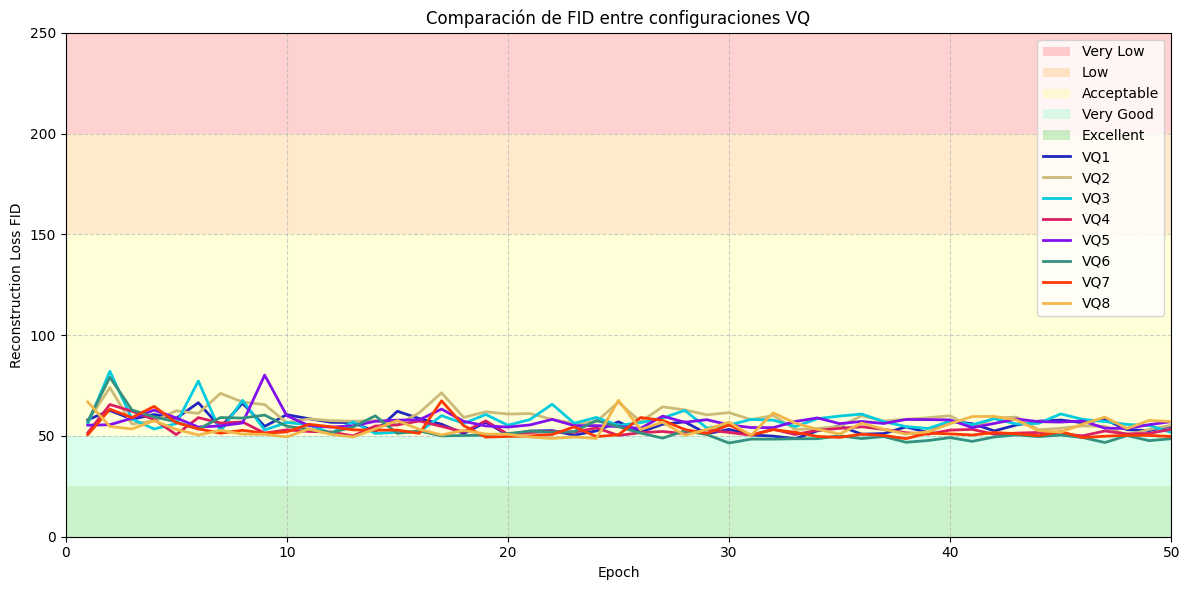

In [ ]:
# Carpeta donde guardaste tus CSV
csv_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan"
configs = ["metrics_history_VQ1", "metrics_history_VQ2", "metrics_history_VQ3", "metrics_history_VQ4", "metrics_history_VQ5", "metrics_history_VQ6", "metrics_history_VQ7", "metrics_history_VQ8"]
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/FID_vqgan.png"

# === Colores asignados (mapeo desde WGAN) ===
vq_colors = {
    "metrics_history_VQ1": "#1F27BF",  # wganW1
    "metrics_history_VQ2":    "#CCBA78",  # wganW2
    "metrics_history_VQ3":    "#04CBDE",  # wganW3
    "metrics_history_VQ4":    "#D91E63",  # wganW4
    "metrics_history_VQ5":    "#8211EB",  # wganW5
    "metrics_history_VQ6":    "#34917F",  # wganW6
    "metrics_history_VQ7":    "#FF3800",  # wganW7
    "metrics_history_VQ8":    "#F2B749",  # default wgan
}

# === Figura ===
plt.figure(figsize=(12, 6))

# === ZONAS DE CALIDAD FID ===
plt.axhspan(800, 200, facecolor='#ff4d4d', alpha=0.25, label='Very Low')
plt.axhspan(200, 150, facecolor='#ffad33', alpha=0.25, label='Low')
plt.axhspan(150, 50,  facecolor='#ffff66', alpha=0.25, label='Acceptable')
plt.axhspan(50, 25,   facecolor='#66ffb3', alpha=0.25, label='Very Good')
plt.axhspan(25, 0,    facecolor='#33cc33', alpha=0.25, label='Excellent')

# === Graficar cada configuración ===
for config in configs:
    csv_path = os.path.join(csv_dir, f"{config}.csv")
    df = pd.read_csv(csv_path)

    if "epoch" not in df.columns or "fid" not in df.columns:
        print(f"Archivo {config} inválido (faltan columnas).")
        continue

    # === Filtrar solo hasta epoch 50 ===
    df = df[df["epoch"] <= 50]

    if df.empty:
        print(f"Archivo {config} no tiene datos hasta epoch 50.")
        continue

    # === 🔥 Dividir el FID entre 3 antes de graficar ===
    df["fid_half"] = df["fid"] / 3.0

    plt.plot(df["epoch"], df["fid_half"],
             label=config.replace("metrics_history_", ""),
             linewidth=2.0,
             alpha=1.0,
             zorder=3,
             color=vq_colors[config])

# === Etiquetas y estilo ===
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss FID")
plt.title("Comparación de FID entre configuraciones VQ")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 250)
plt.xlim(0, 50)
plt.legend()
plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

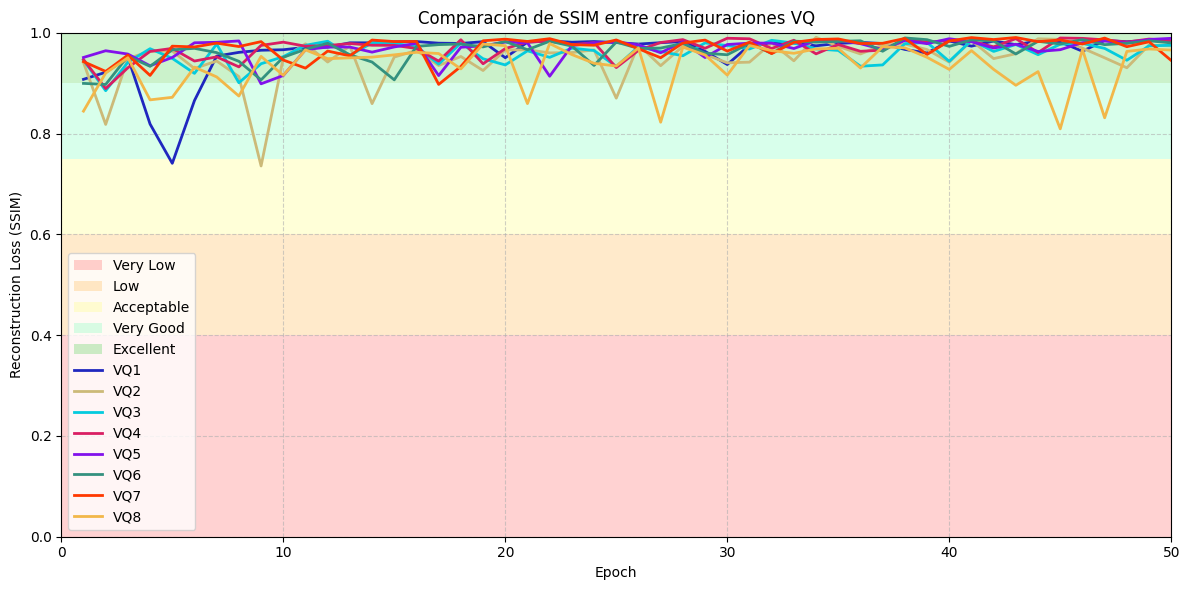

In [ ]:
# Carpeta donde guardaste tus CSV
csv_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan"
configs = ["metrics_history_VQ1", "metrics_history_VQ2", "metrics_history_VQ3", "metrics_history_VQ4", "metrics_history_VQ5", "metrics_history_VQ6", "metrics_history_VQ7", "metrics_history_VQ8"]
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/SSIM_VQgan.png"

# === Colores asignados (mapeo desde WGAN) ===
vq_colors = {
    "metrics_history_VQ1": "#1F27BF",  # wganW1
    "metrics_history_VQ2":    "#CCBA78",  # wganW2
    "metrics_history_VQ3":    "#04CBDE",  # wganW3
    "metrics_history_VQ4":    "#D91E63",  # wganW4
    "metrics_history_VQ5":    "#8211EB",  # wganW5
    "metrics_history_VQ6":    "#34917F",  # wganW6
    "metrics_history_VQ7":    "#FF3800",  # wganW7
    "metrics_history_VQ8":    "#F2B749",  # default wgan
}

# === Figura ===
plt.figure(figsize=(12, 6))

# === ZONAS DE CALIDAD SSIM (contornos visuales) ===
plt.axhspan(0, 0.40,     facecolor='#ff4d4d', alpha=0.25, label='Very Low')     # rojo
plt.axhspan(0.40, 0.60,  facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(0.60, 0.75,  facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo brillante
plt.axhspan(0.75, 0.90,  facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde-menta
plt.axhspan(0.90, 1,     facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde oscuro

# === Graficar cada configuración ===
for config in configs:
    csv_path = os.path.join(csv_dir, f"{config}.csv")
    df = pd.read_csv(csv_path)

    if "epoch" not in df.columns or "ssim" not in df.columns:
        print(f"Archivo {config} inválido (faltan columnas).")
        continue

    plt.plot(df["epoch"], df["ssim"],
             label=config.replace("metrics_history_", ""),
             linewidth=2.0,
             alpha=1.0,
             zorder=3,
             color=vq_colors[config])

# === Etiquetas y estilo ===
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (SSIM)")
plt.title("Comparación de SSIM entre configuraciones VQ")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1)
plt.xlim(0, 50)
plt.legend()
plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

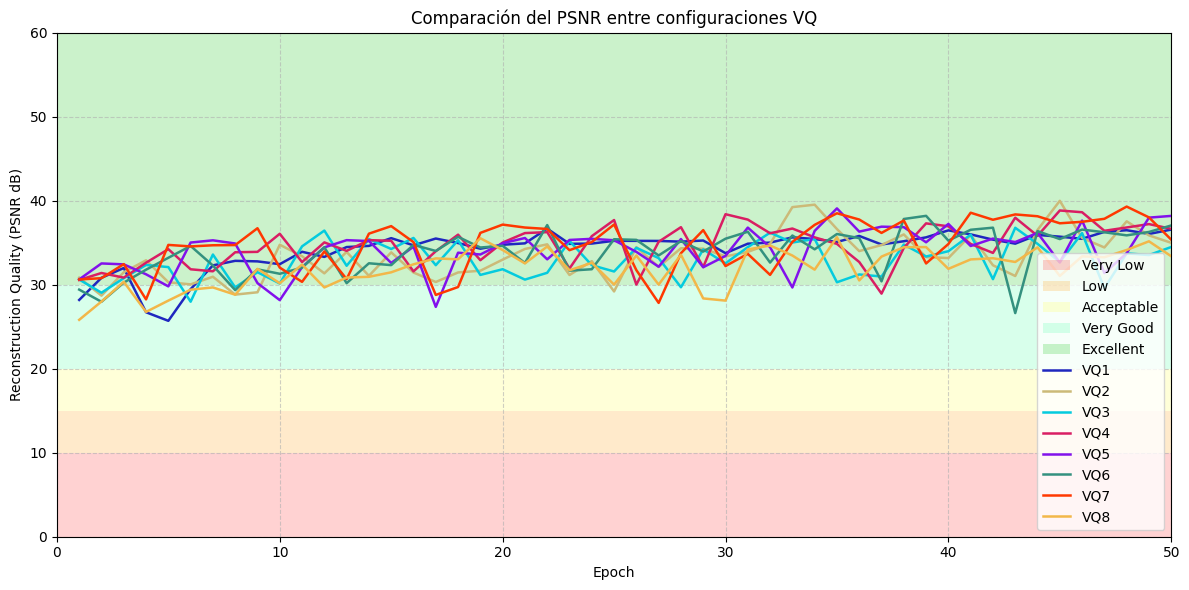

In [ ]:
# Carpeta donde guardaste tus CSV
csv_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan"
configs = ["metrics_history_VQ1", "metrics_history_VQ2", "metrics_history_VQ3", "metrics_history_VQ4", "metrics_history_VQ5", "metrics_history_VQ6", "metrics_history_VQ7", "metrics_history_VQ8"]
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/PSNR_vqgan.png"

# === Colores asignados (mismo estilo que WGAN) ===
vq_colors = {
    "metrics_history_VQ1": "#1F27BF",  # wganW1
    "metrics_history_VQ2": "#CCBA78",  # wganW2
    "metrics_history_VQ3": "#04CBDE",  # wganW3
    "metrics_history_VQ4": "#D91E63",  # wganW4
    "metrics_history_VQ5": "#8211EB",  # wganW5
    "metrics_history_VQ6": "#34917F",  # wganW6
    "metrics_history_VQ7": "#FF3800",  # wganW7
    "metrics_history_VQ8": "#F2B749",  # default
}

# === Gráfica base ===
plt.figure(figsize=(12, 6))

# === ZONAS DE CALIDAD PARA PSNR ===
plt.axhspan(0, 10, facecolor='#ff4d4d', alpha=0.25, label='Very Low')      # rojo
plt.axhspan(10, 15, facecolor='#ffad33', alpha=0.25, label='Low')          # naranja
plt.axhspan(15, 20, facecolor='#ffff66', alpha=0.25, label='Acceptable')   # amarillo
plt.axhspan(20, 30, facecolor='#66ffb3', alpha=0.25, label='Very Good')    # verde menta
plt.axhspan(30, 60, facecolor='#33cc33', alpha=0.25, label='Excellent')    # verde fuerte

# === Graficar cada configuración ===
for config in configs:
    csv_path = os.path.join(csv_dir, f"{config}.csv")
    df = pd.read_csv(csv_path)

    if "epoch" not in df.columns or "psnr" not in df.columns:
        print(f"Archivo {config} inválido (faltan columnas).")
        continue

    plt.plot(df["epoch"], df["psnr"],
             label=config.replace("metrics_history_", ""),
             linewidth=1.8,
             alpha=1.0,
             zorder=3,
             color=vq_colors[config])

# === Etiquetas y estilo ===
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Quality (PSNR dB)")
plt.title("Comparación del PSNR entre configuraciones VQ")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 60)
plt.xlim(0, max(df["epoch"]))
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.legend()
plt.tight_layout()
plt.show()

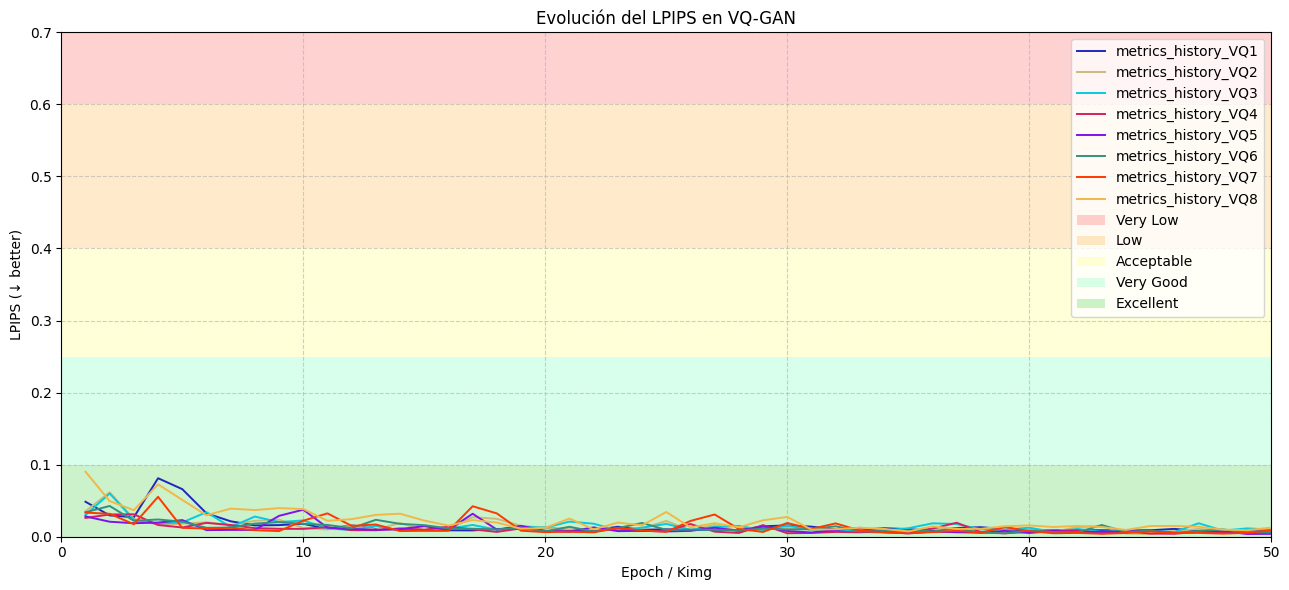

In [ ]:
# Carpeta donde guardaste tus CSV
csv_dir = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/CSV/vq-gan"
configs = ["metrics_history_VQ1", "metrics_history_VQ2", "metrics_history_VQ3", "metrics_history_VQ4", "metrics_history_VQ5", "metrics_history_VQ6", "metrics_history_VQ7", "metrics_history_VQ8"]
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/LPIPS_vqgan.png"

# Paleta personalizada igual que tu estilo WGAN
color_map = {
    "metrics_history_VQ1": "#1F27BF",  # azul
    "metrics_history_VQ2": "#CCBA78",  # beige
    "metrics_history_VQ3": "#04CBDE",  # cyan
    "metrics_history_VQ4": "#D91E63",  # rosado
    "metrics_history_VQ5": "#8211EB",  # morado
    "metrics_history_VQ6": "#34917F",  # verde
    "metrics_history_VQ7": "#FF3800",  # naranja-rojo
    "metrics_history_VQ8": "#F2B749"   # amarillo
}

plt.figure(figsize=(13, 6))

for config in configs:
    csv_path = os.path.join(csv_dir, f"{config}.csv")
    df = pd.read_csv(csv_path)

    # Por si el CSV trae epoch o kimg como index raro
    if "epoch" in df.columns:
        x = df["epoch"]
    elif "kimg" in df.columns:
        x = df["kimg"]
    else:
        x = range(len(df))

    plt.plot(
        x,
        df["lpips"],
        label=config,
        linewidth=1.4,
        alpha=1.0,
        zorder=5,
        color=color_map[config]
    )

# === ZONAS DE CALIDAD LPIPS ===
plt.axhspan(0.60, 1.0,  facecolor='#ff4d4d', alpha=0.25, label='Very Low')      # rojo
plt.axhspan(0.40, 0.60, facecolor='#ffad33', alpha=0.25, label='Low')           # naranja
plt.axhspan(0.25, 0.40, facecolor='#ffff66', alpha=0.25, label='Acceptable')    # amarillo
plt.axhspan(0.10, 0.25, facecolor='#66ffb3', alpha=0.25, label='Very Good')     # verde menta
plt.axhspan(0.00, 0.10, facecolor='#33cc33', alpha=0.25, label='Excellent')     # verde oscuro

plt.title("Evolución del LPIPS en VQ-GAN")
plt.xlabel("Epoch / Kimg")
plt.ylabel("LPIPS (↓ better)")
plt.ylim(0, 0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 50)
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.legend()
plt.tight_layout()
plt.show()

## Violin Plot

/tmp/ipython-input-3591185223.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="lpips", palette=palette_colors, inner=None, linewidth=2)
/tmp/ipython-input-3591185223.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


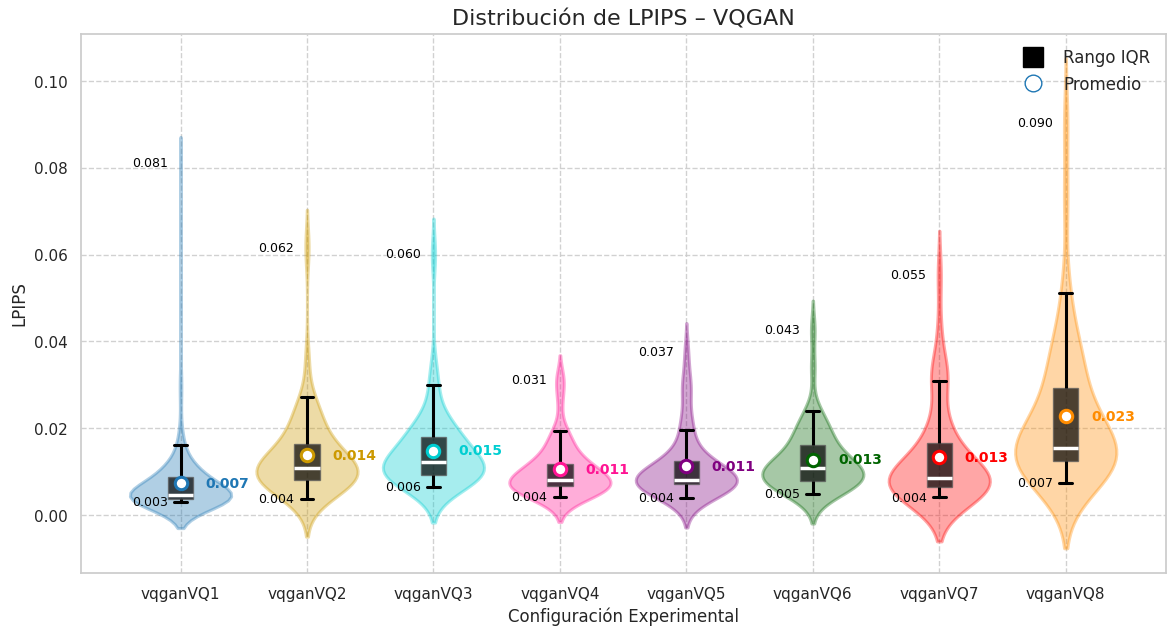

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Violin/lpips_Violin_vqgan.png


In [ ]:
# === COLORES ===
palette_colors = {"vqganVQ1": "#1f77b4", "vqganVQ2": "#CC9900", "vqganVQ3": "#00CED1", "vqganVQ4": "#FF1493", "vqganVQ5": "#800080", "vqganVQ6": "#006400", "vqganVQ7": "#FF0000", "vqganVQ8": "#FF8C00",}

# === CARGAR CSVs ===
data = []
for label, path in csv_vqgan_files.items():
    df_tmp = pd.read_csv(path)
    if "lpips" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'lpips'.")
    df_tmp = df_tmp[["lpips"]].dropna()
    df_tmp["Modelo"] = label
    data.append(df_tmp)
df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="lpips", palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="lpips",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["lpips"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]  # color del violín
    # Punto del promedio
    plt.scatter(
        i,
        mean_value,
        color="white",
        s=80,
        edgecolor=color,   # borde con color del violín
        linewidth=2.2,
        zorder=10,
    )
    # Texto del valor del promedio
    plt.text(
        i + 0.2, mean_value,        # pequeño desplazamiento hacia la derecha
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,                  # mismo color que el borde
        va="center",
        ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX PARA CADA MODELO ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["lpips"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del mínimo
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}", ha='right', va='center', fontsize=9, color='black')  # Etiqueta del máximo

# === CAMBIAR ETIQUETAS DEL EJE X A SOLO "E1", "E2", ... ===
ax = plt.gca()
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de LPIPS – VQGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("LPIPS")

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA PERSONALIZADA CORREGIDA ===

legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black", markeredgecolor="black", linewidth=0, label="Rango IQR"),
    # Line2D([0], [0], color="black", linewidth=3, marker='|', markersize=18, label="Whiskers"),
    Line2D([0], [0], marker='o', color=palette_colors["vqganVQ1"], markerfacecolor="white", markersize=12, linewidth=0, label="Promedio" ),
]

plt.legend(
    handles=legend_elements,
    loc="upper right",
    frameon=False,
    fontsize=12
)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Violin/lpips_Violin_vqgan.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()
print(f"✔️ Gráfica guardada en: {output}")

/tmp/ipython-input-3595752594.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=df_all, x="Modelo", y="fid",
/tmp/ipython-input-3595752594.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])


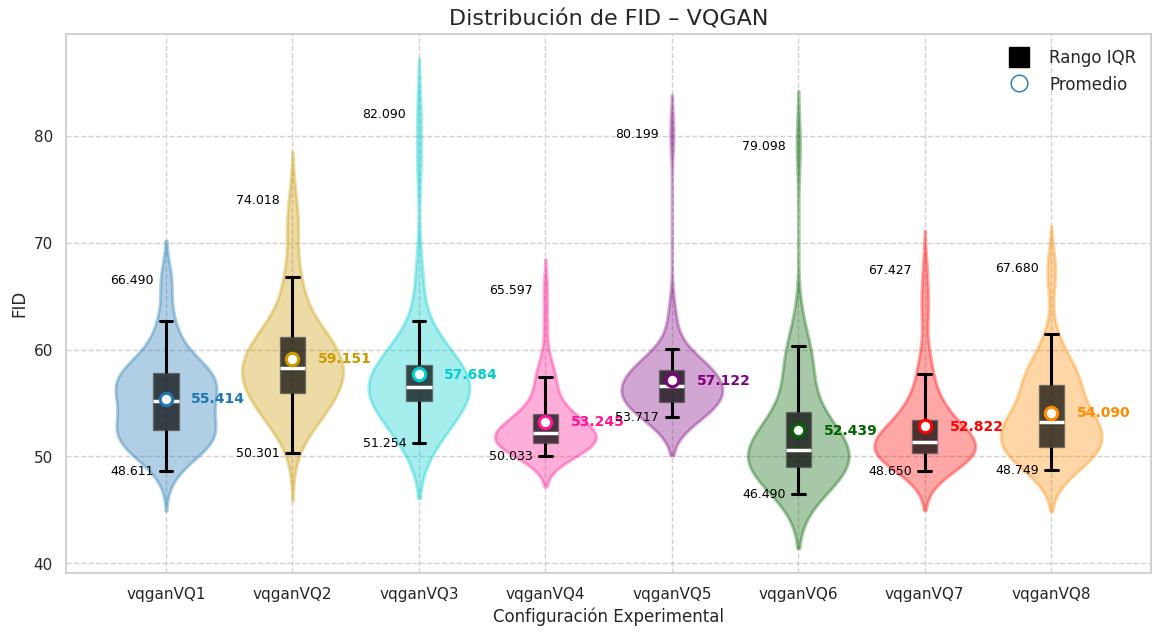

✔️ Gráfica guardada en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Violin/fid_Violin_vqgan.png


In [ ]:
# === COLORES ===
palette_colors = {
    "vqganVQ1": "#1f77b4", "vqganVQ2": "#CC9900", "vqganVQ3": "#00CED1",
    "vqganVQ4": "#FF1493", "vqganVQ5": "#800080", "vqganVQ6": "#006400",
    "vqganVQ7": "#FF0000", "vqganVQ8": "#FF8C00",
}

# === CARGAR CSVs ===
data = []
for label, path in csv_vqgan_files.items():
    df_tmp = pd.read_csv(path)

    if "fid" not in df_tmp.columns:
        raise ValueError(f"❌ El CSV {label} no contiene la columna 'fid'.")

    df_tmp = df_tmp[["fid"]].dropna()

    # 🔥🔥🔥 DIVIDIR TODAS LAS FID ENTRE 3 🔥🔥🔥
    df_tmp["fid"] = df_tmp["fid"] / 3.0

    df_tmp["Modelo"] = label
    data.append(df_tmp)

df_all = pd.concat(data, ignore_index=True)

# === ESTILO ===
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# === VIOLINPLOT BASE ===
vp = sns.violinplot(data=df_all, x="Modelo", y="fid",
                    palette=palette_colors, inner=None, linewidth=2)

# === HACER INTERIOR PASTEL ===
for i, artist in enumerate(vp.collections):
    model = list(palette_colors.keys())[i]
    color = palette_colors[model]
    artist.set_edgecolor(color)
    artist.set_facecolor(color)
    artist.set_alpha(0.35)
    artist.set_linewidth(2.2)

# === BOXPLOT NEGRO PERSONALIZADO ===
sns.boxplot(
    data=df_all,
    x="Modelo",
    y="fid",
    width=0.2,
    boxprops=dict(facecolor="black", alpha=0.7),
    whiskerprops=dict(color="black", linewidth=2.2),
    capprops=dict(color="black", linewidth=2.2),
    medianprops=dict(color="white", linewidth=2.5),
    showcaps=True,
    showfliers=False,
)

# === PUNTO DEL PROMEDIO (mean) ===
group_means = df_all.groupby("Modelo")["fid"].mean()
for i, (model, mean_value) in enumerate(group_means.items()):
    color = palette_colors[model]
    plt.scatter(i, mean_value,
                color="white", s=80,
                edgecolor=color, linewidth=2.2, zorder=10)
    plt.text(
        i + 0.2, mean_value,
        f"{mean_value:.3f}",
        fontsize=10,
        color=color,
        va="center", ha="left",
        fontweight="bold"
    )

# === ETIQUETAS DE MIN Y MAX ===
ax = plt.gca()
for i, model in enumerate(df_all["Modelo"].unique()):
    vals = df_all[df_all["Modelo"] == model]["fid"]
    y_min_val = vals.min()
    y_max_val = vals.max()
    ax.text(i - 0.1, y_min_val, f"{y_min_val:.3f}",
            ha='right', va='center', fontsize=9, color='black')
    ax.text(i - 0.1, y_max_val, f"{y_max_val:.3f}",
            ha='right', va='center', fontsize=9, color='black')

# === RENOMBRAR EJE X ===
ax.set_xticklabels([label.replace("Style", "") for label in df_all["Modelo"].unique()])

# === TÍTULOS ===
plt.title("Distribución de FID – VQGAN", fontsize=16)
plt.xlabel("Configuración Experimental")
plt.ylabel("FID")  # ← actualizado

plt.grid(True, linestyle="--", alpha=0.9)

# === LEYENDA ===
legend_elements = [
    Line2D([0], [0], marker='s', markersize=14, markerfacecolor="black",
           markeredgecolor="black", linewidth=0, label="Rango IQR"),
    Line2D([0], [0], marker='o', color=palette_colors["vqganVQ1"],
           markerfacecolor="white", markersize=12, linewidth=0, label="Promedio"),
]

plt.legend(handles=legend_elements, loc="upper right", frameon=False, fontsize=12)

# === GUARDAR ===
output = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Violin/fid_Violin_vqgan.png"
plt.savefig(output, dpi=300, bbox_inches="tight")
plt.show()

print(f"✔️ Gráfica guardada en: {output}")

## Radar Plot

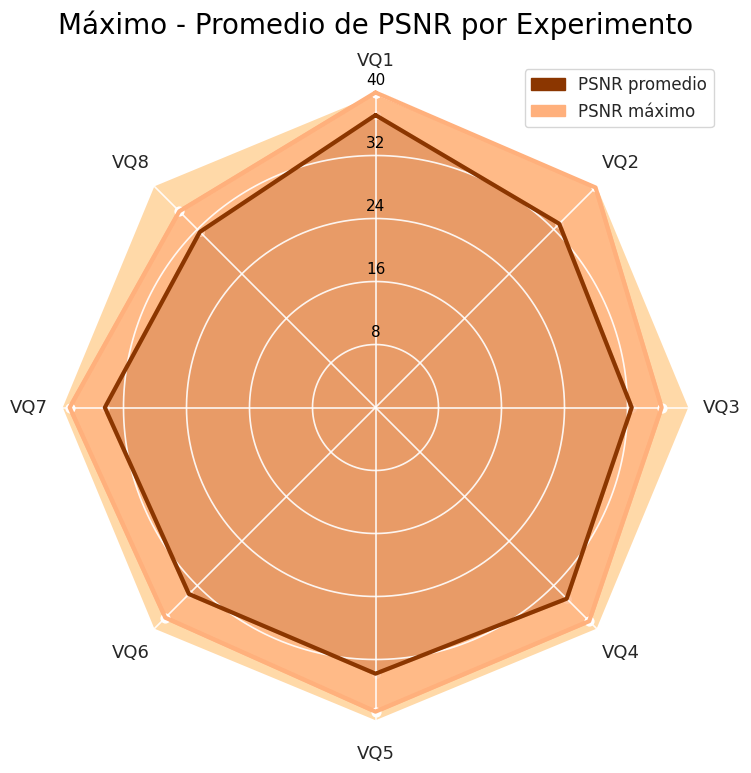

Radar guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Radar/psnr_Radar_vqgan.png


In [ ]:
# === CONFIGURACIÓN ===
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Radar/lpips_Radar_vqgan.png"

# === Obtener lpips mínimo y promedio de cada CSV ===
labels = []
lpips_min = []
lpips_mean = []

for name, path in csv_vqgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("vqgan", ""))

    lpips_min.append(df["lpips"].min())
    lpips_mean.append(df["lpips"].mean())

lpips_min = np.array(lpips_min)
lpips_mean = np.array(lpips_mean)

# Número de variables (8)
N = len(labels)

# === Ángulos en sentido horario iniciando en la parte superior ===
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, N, endpoint=False)

# === Tipo de métrica a graficar: "lpips", "lpips" o "lpips" ===
metric_type = "lpips"   # <-- Cambia esto según la métrica que estés graficando
if metric_type.upper() == "ssim":
    min_val, max_val = 0.0, 1.0
elif metric_type.upper() == "psnr":
    min_val, max_val = 0.0, 40.0
elif metric_type.upper() == "lpips":
    min_val, max_val = 0.0, 1.0
else:
    # fallback en caso de métrica desconocida
    min_val = 0.0
    max_val = max(lpips_min.max(), lpips_mean.max())

# Normalizar radios
r_min = lpips_min / max_val
r_mean = lpips_mean / max_val

# Cerrar polígonos
r_min = np.append(r_min, r_min[0])
r_mean = np.append(r_mean, r_mean[0])
angles_closed = np.append(angles, angles[0])

# Conversión a XY
def to_xy(r):
    return np.column_stack([r * np.cos(angles_closed), r * np.sin(angles_closed)])

xy_min = to_xy(r_min)
xy_mean = to_xy(r_mean)

# === Crear figura ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect("equal")

# === Fondo verde recortado en el octágono ===
theta = angles
octagon = np.column_stack([np.cos(theta), np.sin(theta)])

bg_polygon = Polygon(octagon,closed=True,alpha=0.5, facecolor="#FFB552",edgecolor="none",zorder=0,)
ax.add_patch(bg_polygon)
bg_polygon.set_clip_on(True)

ax.set_facecolor("none")

# === GRILLA INTERNA CIRCULAR ===
levels = 5
for k in range(1, levels+1):
    rr = k / levels
    theta_fine = np.linspace(0, 2*np.pi, 500)
    ax.plot(rr*np.cos(theta_fine),rr*np.sin(theta_fine),color="white",linewidth=1.2,alpha=0.9,zorder=3)

# === ETIQUETAS PARA CADA NIVEL EN LA DIRECCIÓN DE LAS 12 EN PUNTO ===
angle_top = angles[0]                            # dirección de E1 (12 horas)
offset = 0.015
for k in range(1, levels+1):
    rr = k / levels
    lpips_value = rr * max_val
    # Formato: 3 decimales si < 1, de lo contrario entero
    if lpips_value < 1:
        label_text = f"{lpips_value:.3f}"
    else:
        label_text = f"{lpips_value:.0f}"

    x = rr * np.cos(angle_top)                   # Coordenadas sobre la misma línea de las 12
    y = rr * np.sin(angle_top)
    # Pequeño desplazamiento hacia afuera
    x_label = rr*np.cos(angle_top)
    y_label = rr*np.sin(angle_top) + offset   # <- más pegado a la grilla
    ax.text(x_label, y_label, label_text, ha="center", va="bottom", fontsize=11, color="black")

# === Líneas radiales ===
for ang in angles:
    ax.plot([0, np.cos(ang)], [0, np.sin(ang)],
            color="white", linewidth=1.2, alpha=0.9, zorder=3)

# === Borde exterior (octágono real) ===
outer = to_xy(np.ones(N+1))
ax.plot(outer[:,0], outer[:,1], color="white", linewidth=3, zorder=4)

# === lpips promedio ===
ax.add_patch(Polygon(xy_mean, closed=True,
                     facecolor="#8B3600", alpha=0.75, edgecolor="#8B3600", linewidth=3))
ax.plot(xy_mean[:,0], xy_mean[:,1], color="#8B3600", linewidth=3, zorder=10)
ax.scatter(xy_mean[:,0], xy_mean[:,1], color="white", s=30, zorder=11)

# === lpips mínimo ===
ax.add_patch(Polygon(xy_min, closed=True,
                     facecolor="#FFB07C", alpha=0.75, edgecolor="#FFB07C", linewidth=3))
ax.plot(xy_min[:,0], xy_min[:,1], color="#FFB07C", linewidth=3, zorder=12)
ax.scatter(xy_min[:,0], xy_min[:,1], color="white", s=40, zorder=13)

# === Etiquetas (E1…E8 en orden horario) ===
label_radius = 1.10  # Antes 1.18
for ang, lab in zip(angles, labels):
    ax.text(label_radius*np.cos(ang), label_radius*np.sin(ang), lab,
            ha="center", va="center", fontsize=13)

# === Título ===
plt.title("Minimo - Promedio, de lpips por Experimento",
          fontsize=20, pad=20, color="black")

# === LEYENDA CORREGIDA ===
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#8B3600", edgecolor="#8B3600", label="lpips promedio"),
    Patch(facecolor="#FFB07C", edgecolor="#FFB07C", label="lpips mínimo"),
]

ax.legend(handles=legend_elements, loc="upper right", fontsize=12)

ax.axis("off")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Radar guardado en:", output_path)


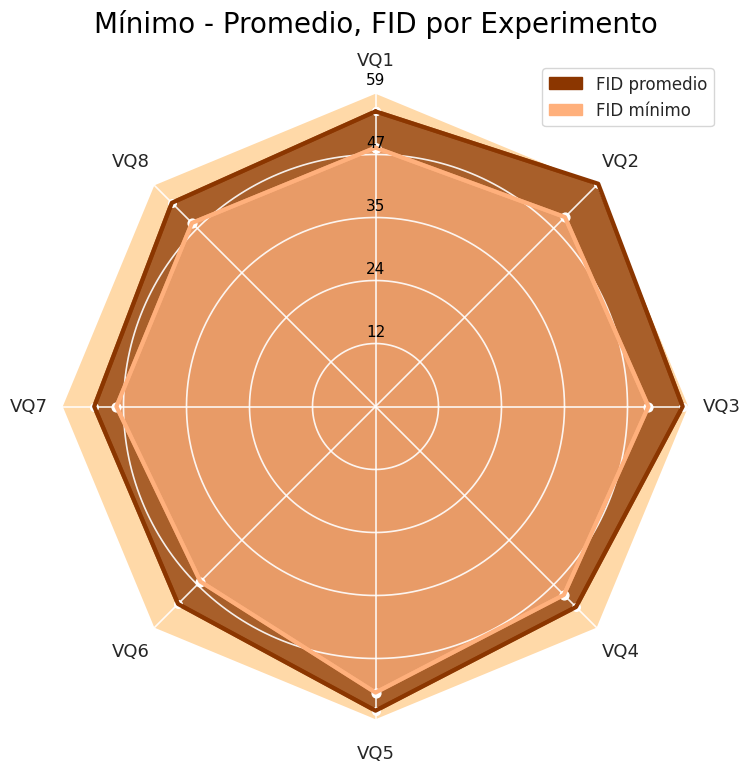

Radar guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Radar/fid_Radar_vqgan.png


In [ ]:
# === CONFIGURACIÓN ===
output_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Radar/fid_Radar_vqgan.png"

# === Obtener fid mínimo y promedio de cada CSV (dividido entre 3) ===
labels = []
fid_min = []
fid_mean = []

for name, path in csv_vqgan_files.items():
    df = pd.read_csv(path)

    # === Dividir todos los valores FID entre 3 ===
    df["fid"] = df["fid"] / 3

    labels.append(name.replace("vqgan", ""))

    fid_min.append(df["fid"].min())
    fid_mean.append(df["fid"].mean())

fid_min = np.array(fid_min)
fid_mean = np.array(fid_mean)

# Número de variables (8)
N = len(labels)

# === Ángulos en sentido horario iniciando en la parte superior ===
angles = np.linspace(np.pi/2, np.pi/2 - 2*np.pi, N, endpoint=False)

# === Rango automático para FID ya ajustado ===
metric_type = "fid"
min_val = 0.0
max_val = max(fid_min.max(), fid_mean.max())

# Normalizar radios
r_min = fid_min / max_val
r_mean = fid_mean / max_val

# Cerrar polígonos
r_min = np.append(r_min, r_min[0])
r_mean = np.append(r_mean, r_mean[0])
angles_closed = np.append(angles, angles[0])

# Conversión a XY
def to_xy(r):
    return np.column_stack([r * np.cos(angles_closed), r * np.sin(angles_closed)])

xy_min = to_xy(r_min)
xy_mean = to_xy(r_mean)

# === Crear figura ===
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_aspect("equal")

# === Fondo recortado en el octágono ===
theta = angles
octagon = np.column_stack([np.cos(theta), np.sin(theta)])

bg_polygon = Polygon(octagon, closed=True, alpha=0.5,
                     facecolor="#FFB552", edgecolor="none", zorder=0)
ax.add_patch(bg_polygon)

ax.set_facecolor("none")

# === GRILLA INTERNA ===
levels = 5
for k in range(1, levels+1):
    rr = k / levels
    theta_fine = np.linspace(0, 2*np.pi, 500)
    ax.plot(rr*np.cos(theta_fine), rr*np.sin(theta_fine),
            color="white", linewidth=1.2, alpha=0.9)

# === ETIQUETAS DE CADA NIVEL ===
angle_top = angles[0]
offset = 0.015

for k in range(1, levels+1):
    rr = k / levels
    fid_value = rr * max_val
    label_text = f"{fid_value:.3f}" if fid_value < 1 else f"{fid_value:.0f}"

    x_label = rr * np.cos(angle_top)
    y_label = rr * np.sin(angle_top) + offset

    ax.text(x_label, y_label, label_text,
            ha="center", va="bottom", fontsize=11, color="black")

# === Líneas radiales ===
for ang in angles:
    ax.plot([0, np.cos(ang)], [0, np.sin(ang)],
            color="white", linewidth=1.2, alpha=0.9)

# === Borde exterior ===
outer = to_xy(np.ones(N+1))
ax.plot(outer[:,0], outer[:,1], color="white", linewidth=3)

# === FID PROMEDIO ===
ax.add_patch(Polygon(xy_mean, closed=True,
                     facecolor="#8B3600", alpha=0.75, edgecolor="#8B3600", linewidth=3))
ax.plot(xy_mean[:,0], xy_mean[:,1], color="#8B3600", linewidth=3)
ax.scatter(xy_mean[:,0], xy_mean[:,1], color="white", s=30)

# === FID MÍNIMO ===
ax.add_patch(Polygon(xy_min, closed=True,
                     facecolor="#FFB07C", alpha=0.75, edgecolor="#FFB07C", linewidth=3))
ax.plot(xy_min[:,0], xy_min[:,1], color="#FFB07C", linewidth=3)
ax.scatter(xy_min[:,0], xy_min[:,1], color="white", s=40)

# === Etiquetas externas ===
label_radius = 1.10
for ang, lab in zip(angles, labels):
    ax.text(label_radius*np.cos(ang), label_radius*np.sin(ang),
            lab, ha="center", va="center", fontsize=13)

# === Título ===
plt.title("Mínimo - Promedio, FID por Experimento",
          fontsize=20, pad=20, color="black")

# === LEYENDA ===
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#8B3600", edgecolor="#8B3600", label="FID promedio"),
    Patch(facecolor="#FFB07C", edgecolor="#FFB07C", label="FID mínimo"),
]

ax.legend(handles=legend_elements, loc="upper right", fontsize=12)

ax.axis("off")

plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Radar guardado en:", output_path)


## Heatmap


/tmp/ipython-input-2901413911.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 1])


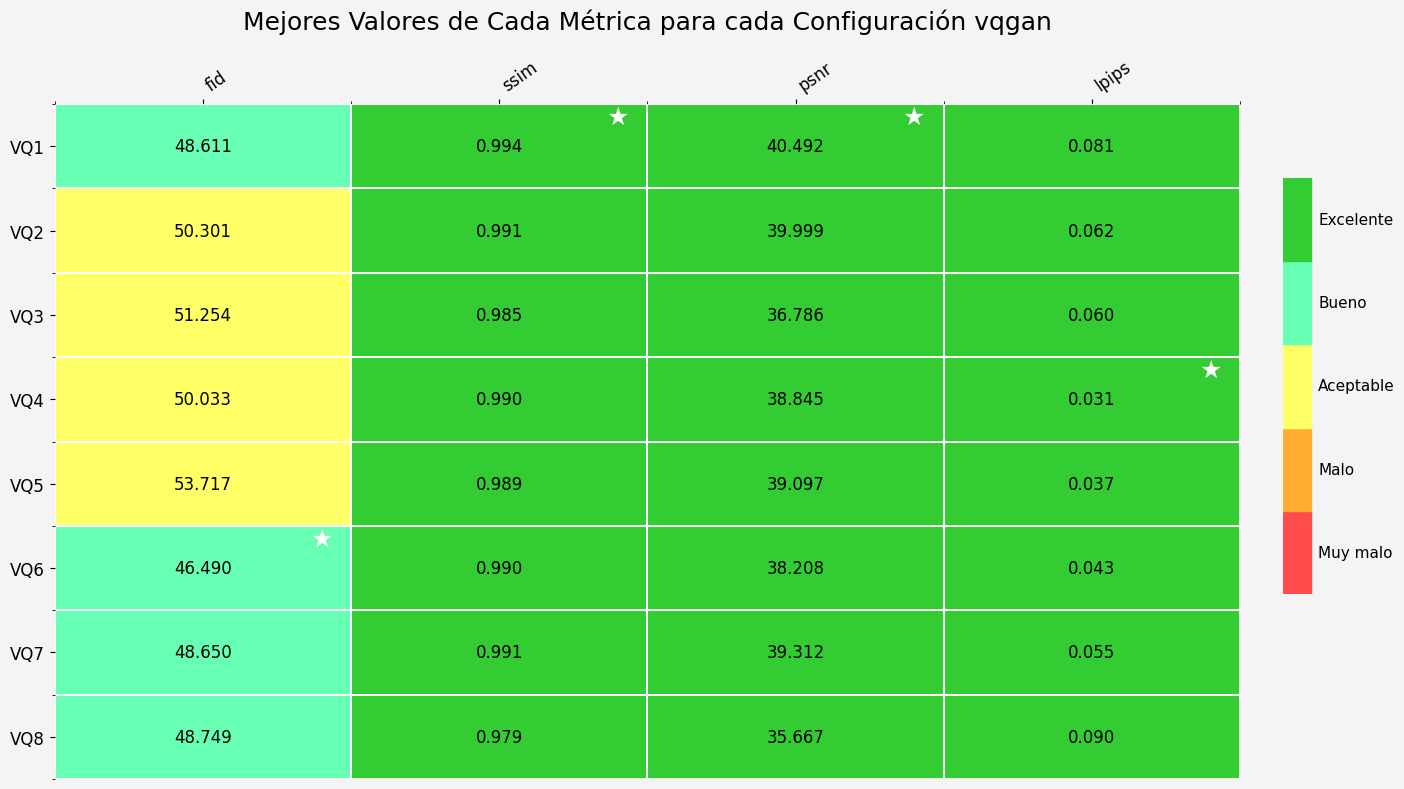

✔ Heatmap guardado en: /content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Heatmap/heatmap_vqgan.png


In [ ]:
# === MÉTRICAS ===
metrics = ["fid", "ssim", "psnr", "lpips"]

# === COLORES (verde = peor, rojo = mejor) ===
colors = {"lvl1": "#ff4d4d", "lvl2": "#ffad33", "lvl3": "#ffff66", "lvl4": "#66ffb3", "lvl5": "#33cc33"}

# === RANGOS PERSONALIZADOS POR MÉTRICA ===
ranges = {
    "fid":   [(600,200,"lvl1"), (200,150,"lvl2"), (150,50,"lvl3"), (50,25,"lvl4"), (25,0,"lvl5")],
    "ssim":  [(1.0,0.9,"lvl5"), (0.9,0.75,"lvl4"), (0.75,0.6,"lvl3"), (0.6,0.4,"lvl2"), (0.4,0,"lvl1")],
    "psnr":  [(60,30,"lvl5"), (30,20,"lvl4"), (20,15,"lvl3"), (15,10,"lvl2"), (10,0,"lvl1")],
    "lpips": [(1.0,0.6,"lvl1"), (0.6,0.4,"lvl2"), (0.4,0.25,"lvl3"), (0.25,0.10,"lvl4"), (0.10,0,"lvl5")]
}

# === FUNCIÓN PARA ASIGNAR COLOR ===
def get_color(metric, value):
    for low, high, level in ranges[metric]:
        if low >= value >= high:
            return colors[level]
    return "#000000"

# === EXTRAER MÍNIMOS ===
rows, labels, color_matrix = [], [], []

# === EXTRAER MÍNIMOS ===
rows, labels, color_matrix = [], [], []

for name, path in csv_vqgan_files.items():
    df = pd.read_csv(path)
    labels.append(name.replace("vqgan", ""))

    row, crow = [], []
    for m in metrics:
        # --- elegir mínimo o máximo según métrica ---
        if m == "fid":
            v = df[m].min() / 3.0
        else:  # SSIM y PSNR
            v = df[m].max()      # mayor es mejor
        row.append(v)
        crow.append(get_color(m, v))

    rows.append(row)
    color_matrix.append(crow)
data = np.array(rows)
colors_array = np.array(color_matrix)

# === FIGURA ===
plt.style.use("default")
fig, ax = plt.subplots(figsize=(14, 8))

fig.patch.set_facecolor("#f4f4f4")
ax.set_facecolor("#f0f0f0")

# === IDENTIFICAR GANADORES ===
best_positions = {}

for j, m in enumerate(metrics):
    col_values = data[:, j]
    if m in ["fid", "KID", "JSD", "lpips"]:
        best_positions[j] = np.argmin(col_values)
    else:
        best_positions[j] = np.argmax(col_values)

# === HEATMAP ===
for i in range(data.shape[0]):
    for j in range(data.shape[1]):

        ax.add_patch(Rectangle(
            (j, i), 1, 1,
            facecolor=colors_array[i, j],
            edgecolor="white",
            linewidth=1.3
        ))

        ax.text(
            j + 0.50, i + 0.50,
            f"{data[i, j]:.3f}",
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

        # ★ estrella
        if best_positions[j] == i:
            cell_color = colors_array[i, j]
            star_color = "black" if cell_color == "#ffff66" else "white"

            ax.text(
                j + 0.90,
                i + 0.15,
                "★",
                ha="center", va="center",
                fontsize=18,
                fontweight="bold",
                color=star_color
            )

# === EJES ===
ax.set_xlim(0, len(metrics))
ax.set_ylim(0, len(labels))

ax.set_xticks(np.arange(len(metrics)) + 0.5)
ax.set_yticks(np.arange(len(labels)) + 0.5)

ax.xaxis.tick_top()

ax.set_xticklabels(metrics, rotation=35, ha="left", fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

ax.invert_yaxis()

ax.set_xticks(np.arange(len(metrics)+1), minor=True)
ax.set_yticks(np.arange(len(labels)+1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.8, alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(False)

# === TÍTULO ===
plt.title("Mejores Valores de Cada Métrica para cada Configuración vqgan", fontsize=18, pad=20)

# === LEYENDA ===
legend_ax = fig.add_axes([0.92, 0.25, 0.04, 0.52])
legend_ax.set_facecolor("#f4f4f4")

legend_labels = ["Muy malo", "Malo", "Aceptable", "Bueno", "Excelente"]

for i, lvl in enumerate(["lvl1","lvl2","lvl3","lvl4","lvl5"]):
    legend_ax.add_patch(Rectangle((0, i), 1, 1, color=colors[lvl]))
    legend_ax.text(1.25, i + 0.5, legend_labels[i], va="center", fontsize=11)

legend_ax.set_xlim(0, 2)
legend_ax.set_ylim(0, 5)
legend_ax.axis("off")

plt.tight_layout(rect=[0, 0, 0.90, 1])
plt.show()

# === GUARDAR ===
save_path = "/content/drive/MyDrive/Proyecto_Grado/Data/Resultados/IMAGES/vqgan/Heatmap/heatmap_vqgan.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")

print(f"✔ Heatmap guardado en: {save_path}")
